<a href="https://colab.research.google.com/github/varunjoshua/ScalerDSML-ProductSalesForecast/blob/main/Scaler_DSML_Product_Sales_Forecasting_Analysis_%26_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Product Sales Forecasting for Retail**

**Objective:**

* Build a predictive model to estimate future sales, based on historical sales data from different stores and various factors such store type, location, regional characteristics, promotional activities, and temporal variations such as holidays and seasons.

* Use the given data to derive insights that will guide strategic planning , inventory management and marketing & promotions.  



#**Importing Data & Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
!gdown 1sLIwsVlV4Jwpl7D0gJOlILF8iUJaD1xl

Downloading...
From: https://drive.google.com/uc?id=1sLIwsVlV4Jwpl7D0gJOlILF8iUJaD1xl
To: /content/TRAIN.csv
100% 9.33M/9.33M [00:00<00:00, 52.9MB/s]


In [4]:
!gdown 1i1n0NUwk7LccNj33ndqLbrHgzqJy5XDf

Downloading...
From: https://drive.google.com/uc?id=1i1n0NUwk7LccNj33ndqLbrHgzqJy5XDf
To: /content/TEST_FINAL.csv
100% 849k/849k [00:00<00:00, 126MB/s]


In [5]:
df = pd.read_csv('TRAIN.csv')

In [6]:
df_test = pd.read_csv('TEST_FINAL.csv')

In [7]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0  T1000001         1         S1            L3          R1  2018-01-01   
1  T1000002       253         S4            L2          R1  2018-01-01   
2  T1000003       252         S3            L2          R1  2018-01-01   
3  T1000004       251         S2            L3          R1  2018-01-01   
4  T1000005       250         S2            L3          R4  2018-01-01   

   Holiday Discount  #Order     Sales  
0        1      Yes       9  7,011.84  
1        1      Yes      60 51,789.12  
2        1      Yes      42 36,868.20  
3        1      Yes      23 19,715.16  
4        1      Yes      62 45,614.52

## **Data description**
* ID: Unique identifier for each record in the dataset.
* Store_id: Unique identifier for each store.
* Store_Type: Categorization of the store based on its type.
* Location_Type: Classification of the store's location (e.g., urban, suburban).
* Region_Code: Code representing the geographical region where the store is located.
* Date: The specific date on which the data was recorded.
* Holiday: Indicator of whether the date was a holiday (1: Yes, 0: No).
* Discount: Indicates whether a discount was offered on the given date (Yes/No).
* #Order: The number of orders received by the store on the specified day.
Sales: Total sales amount for the store on the given day.


# **Exploratory Data Analysis**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [9]:
df.isna().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [10]:
print(f"Number of duplicate entries: {df.duplicated().sum()}")

Number of duplicate entries: 0


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.rename(columns = {'#Order':'Orders'}, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   Orders         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [14]:
df.describe(include = "all")

ID   Store_id Store_Type Location_Type Region_Code  \
count     188340 188,340.00     188340        188340      188340   
unique    188340        NaN          4             5           4   
top     T1188340        NaN         S1            L1          R1   
freq           1        NaN      88752         85140       63984   
mean         NaN     183.00        NaN           NaN         NaN   
min          NaN       1.00        NaN           NaN         NaN   
25%          NaN      92.00        NaN           NaN         NaN   
50%          NaN     183.00        NaN           NaN         NaN   
75%          NaN     274.00        NaN           NaN         NaN   
max          NaN     365.00        NaN           NaN         NaN   
std          NaN     105.37        NaN           NaN         NaN   

                                 Date    Holiday Discount     Orders  \
count                          188340 188,340.00   188340 188,340.00   
unique                            NaN        NaN        2        NaN   
top                               NaN        NaN       No        NaN   
freq                              NaN        NaN   104051        NaN   
mean    2018-09-15 12:00:00.000000256       0.13      NaN      68.21   
min               2018-01-01 00:00:00       0.00      NaN       0.00   
25%               2018-05-09 18:00:00       0.00      NaN      48.00   
50%               2018-09-15 12:00:00       0.00      NaN      63.00   
75%               2019-01-22 06:00:00       0.00      NaN      82.00   
max               2019-05-31 00:00:00       1.00      NaN     371.00   
std                               NaN       0.34      NaN      30.47   

            Sales  
count  188,340.00  
unique        NaN  
top           NaN  
freq          NaN  
mean    42,784.33  
min          0.00  
25%     30,426.00  
50%     39,678.00  
75%     51,909.00  
max    247,215.00  
std     18,456.71

In [15]:
print('No of stores with 0 sales:', df[df['Sales'] < 1].shape[0])

No of stores with 0 sales: 19


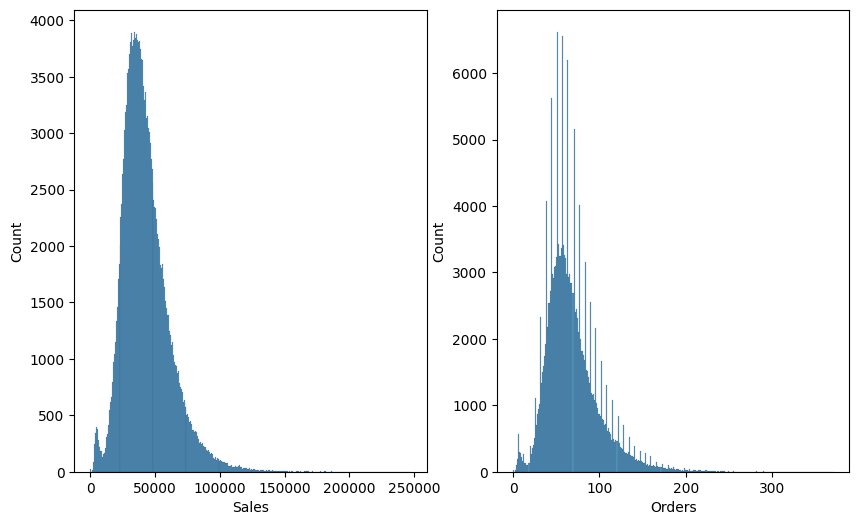

In [16]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.histplot(df['Sales'])
plt.subplot(1,2,2)
sns.histplot(df['Orders'])
plt.show()

In [17]:
df['Region_Code'].value_counts()

Region_Code
R1    63984
R2    54180
R3    44376
R4    25800
Name: count, dtype: int64

In [18]:
df['Location_Type'].value_counts()

Location_Type
L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: count, dtype: int64

In [19]:
df['Store_Type'].value_counts()

Store_Type
S1    88752
S4    45924
S2    28896
S3    24768
Name: count, dtype: int64

In [20]:
df['Store_id'].nunique()

365

In [21]:
discount_days = df[['Date','Discount']].copy(deep = True)
discount_days['Yes'] = discount_days['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)
discount_days['No'] = discount_days['Discount'].apply(lambda x: 1 if x == 'No' else 0)
discount_days = discount_days.groupby('Date').agg({'Yes':'sum', 'No':'sum'})
discount_days.sample(5)

Yes   No
Date                
2018-07-27  108  257
2018-05-05  360    5
2018-11-16   34  331
2018-08-01   42  323
2018-03-30  363    2

## Observation & Handling
* The dataset contains 188340 records with no null values and duplicates
* The Date column was in object type and was converted to DateTime for better processing
* The data is for the period from 2018-01-01 to 2019-05-31 i.e. 516 days
* The data is collected from 365 stores from 4 different regions (R1, R2, R3, R4) categorized into 4 types (S1, S2, S3, S4) and 5 different location types (L1, L2, L3, L4 L5).
* Not all stores have discounts on the same days.
* There are 19 records on the dataset with 0 orders and sales. The are potential anomalies that need to be analzed and removed if necessary.  

In [22]:
df.sort_values(by = ['Store_id', 'Date']).tail()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
186722  T1186723       365         S2            L1          R2 2019-05-27   
186986  T1186987       365         S2            L1          R2 2019-05-28   
187479  T1187480       365         S2            L1          R2 2019-05-29   
187617  T1187618       365         S2            L1          R2 2019-05-30   
187983  T1187984       365         S2            L1          R2 2019-05-31   

        Holiday Discount  Orders     Sales  
186722        0      Yes      55 39,993.00  
186986        0      Yes      70 54,132.00  
187479        0       No      31 22,692.00  
187617        0       No      45 31,671.00  
187983        1       No      44 30,720.87

In [23]:
df_copy = df.copy(deep = True)

# **Preparing Datasets for Time Series Analysis**

Using the given data we can forecast sales at the company, regional, location type, store type and store level. Creating and handling multiple datasets and forecasting sales for all cases would be cumbersome.

Since the brief does not mention whether the forecasting is required to be done at the company, regional, location type, or store level, we are assuming that the company and decision makers will be most informed by analysis and sales forecast at the overall company and regional levels.

Using functions for training, and evaluation we will bult a reusable pipeline that can later be adapted and applied to location type, store type or individual store level data if needed, saving significant effort.

**Dataset to be created:**

* Company Level Dataset: ts_co
* Regional Datasets: ts_r1, ts_r2, ts_r3, ts_r4

  

**Handling Discount while Grouping & Aggregating:**
* Discounts are not applied uninformly across stores i.e. on a certain day not all 365 stores have or don't have discounts.
* Discount is applicable to a single store on a single day, so when grouping and aggregating the dataset for Company level or Regional level time series we will represent Discount as proportion of stores on Discount on that day for Company level data and proportion of stores on Discount on that day in that region for Region Level Data.
* The approach was chosen since Proportion of Sales, which a better indicator of discount impact, would not be available for test and real world data.






### **Company Level Data**

In [24]:
df['Discounted_Flag'] = df['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  Orders     Sales  Discounted_Flag  
0        1      Yes       9  7,011.84                1  
1        1      Yes      60 51,789.12                1  
2        1      Yes      42 36,868.20                1  
3        1      Yes      23 19,715.16                1  
4        1      Yes      62 45,614.52                1

In [25]:
ts_co = df.groupby('Date').agg({'Holiday':'last', 'Discounted_Flag': lambda x: x.sum() / x.count(),'Orders':'sum', 'Sales':'sum'}).reset_index()
ts_co.set_index('Date', inplace = True)
ts_co.head()

Holiday  Discounted_Flag  Orders         Sales
Date                                                      
2018-01-01        1             1.00   19666 15,345,484.50
2018-01-02        0             1.00   25326 19,592,415.00
2018-01-03        0             1.00   24047 18,652,527.00
2018-01-04        0             1.00   25584 19,956,267.00
2018-01-05        0             1.00   28436 22,902,651.00

In [26]:
ts_co.rename(columns = {"Discounted_Flag":"Discounted Stores"}, inplace = True)


In [27]:
ts_co.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 516 entries, 2018-01-01 to 2019-05-31
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holiday            516 non-null    int64  
 1   Discounted Stores  516 non-null    float64
 2   Orders             516 non-null    int64  
 3   Sales              516 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 20.2 KB


In [28]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  Orders     Sales  Discounted_Flag  
0        1      Yes       9  7,011.84                1  
1        1      Yes      60 51,789.12                1  
2        1      Yes      42 36,868.20                1  
3        1      Yes      23 19,715.16                1  
4        1      Yes      62 45,614.52                1

### **Regional Datasets**

In [29]:
ts_r1 = df[df['Region_Code'] == 'R1']
ts_r2 = df[df['Region_Code'] == 'R2']
ts_r3 = df[df['Region_Code'] == 'R3']
ts_r4 = df[df['Region_Code'] == 'R4']

In [30]:
ts_r1 = ts_r1.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})
ts_r2 = ts_r2.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})
ts_r3 = ts_r3.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})
ts_r4 = ts_r4.groupby('Date').agg({'Holiday': 'last', 'Discount': 'last','Discounted_Flag': lambda x: x.sum() / x.count(), 'Orders': 'sum','Sales': 'sum'})

In [31]:
ts_r1.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)
ts_r2.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)
ts_r3.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)
ts_r4.rename(columns = {'Discounted_Flag':'Discounted Stores'}, inplace = True)

In [32]:
ts_r1.sample(5)

Holiday Discount  Discounted Stores  Orders        Sales
Date                                                                
2019-01-27        0      Yes               0.43   12106 6,993,420.00
2018-04-16        0       No               0.01    8303 4,482,027.00
2019-04-21        1       No               0.19   11500 6,520,258.77
2018-03-08        0       No               0.00    8944 4,823,013.00
2019-05-31        1       No               0.15    9433 5,900,798.10

In [33]:
ts_co.to_csv('ts_co.csv')
ts_r1.to_csv('ts_r1.csv')
ts_r2.to_csv('ts_r2.csv')
ts_r3.to_csv('ts_r3.csv')
ts_r4.to_csv('ts_r4.csv')

## **Outlier/Anamoly Detection**

In [34]:
import statsmodels.api as sm

In [35]:
datasets = {'Company': ts_co, 'Region 1': ts_r1, 'Region 2': ts_r2, 'Region 3': ts_r3, 'Region 4':ts_r4}

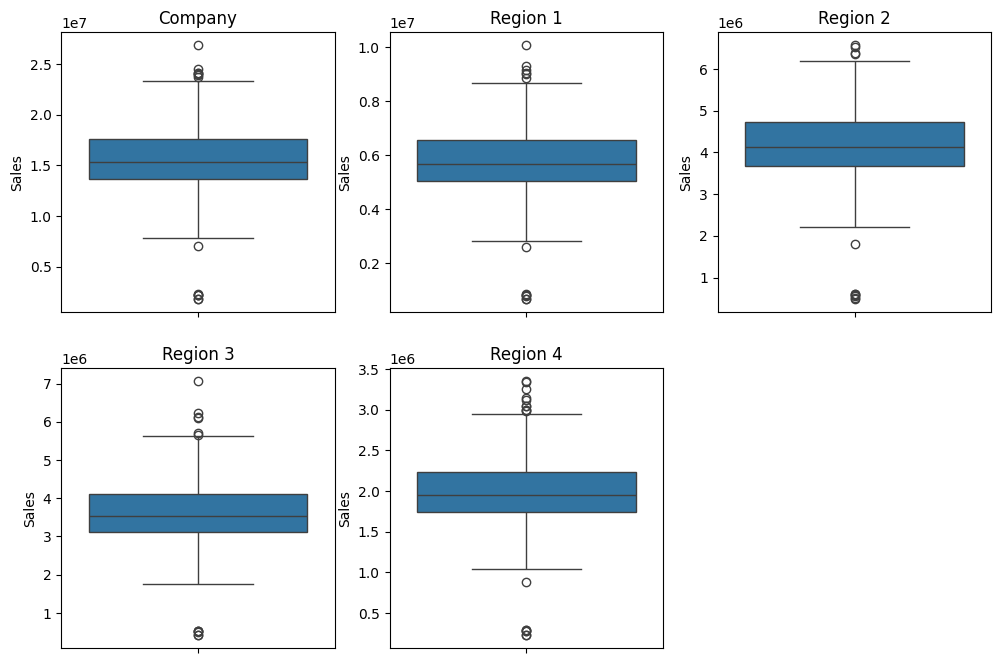

In [36]:
plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(datasets.items()):
  plt.subplot(2, 3, i+1)
  sns.boxplot(data['Sales'])
  plt.title(f'{name}')

plt.show()

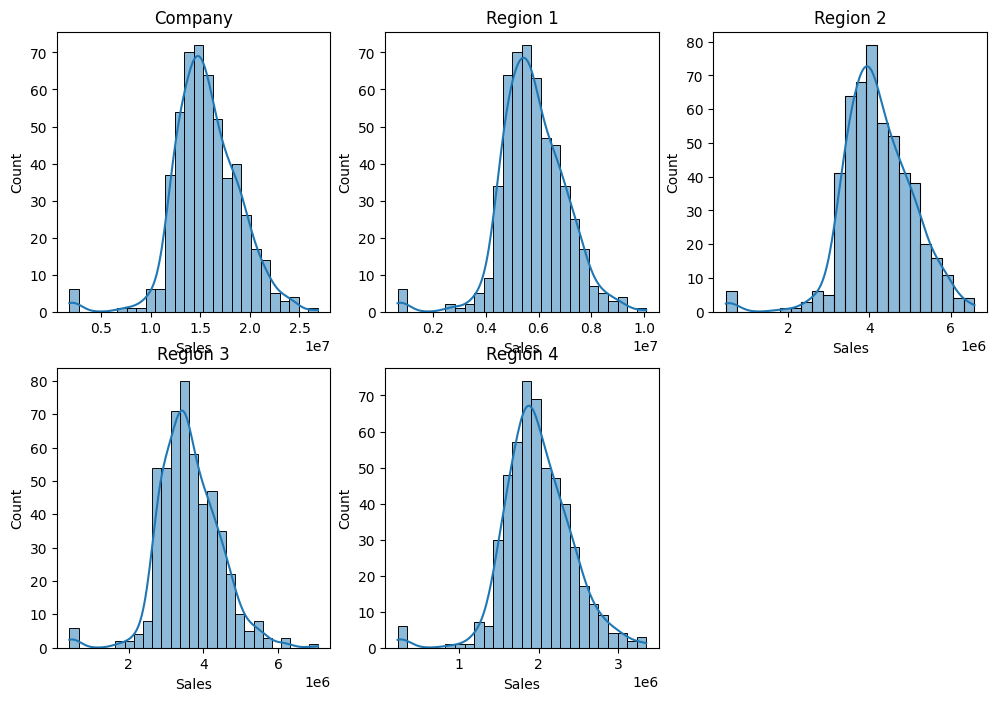

In [37]:
# Checking distribution of datasets

plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(datasets.items()):
  plt.subplot(2, 3, i+1)
  sns.histplot(data['Sales'], kde = True)
  plt.title(f'{name}')

plt.show()

In [38]:
# Checking Minimum Sales

for name, data in datasets.items():
  print(f'Min Sales in {name}:{data["Sales"].min()}.')

Min Sales in Company:1762137.57.
Min Sales in Region 1:654808.47.
Min Sales in Region 2:474569.37.
Min Sales in Region 3:409091.13.
Min Sales in Region 4:222144.24.


In [39]:
for name, data in datasets.items():
  print(f'No of days in {name} with Sales < 1000000:{data[data["Sales"] < 1000000].shape[0]}.')

No of days in Company with Sales < 1000000:0.
No of days in Region 1 with Sales < 1000000:6.
No of days in Region 2 with Sales < 1000000:6.
No of days in Region 3 with Sales < 1000000:6.
No of days in Region 4 with Sales < 1000000:7.


Residual mean of Company:5749.545895886796

Residual mean of Region 1:1970.4179788700174

Residual mean of Region 2:1185.6895776258227

Residual mean of Region 3:1952.932193528335

Residual mean of Region 4:640.5061458625806



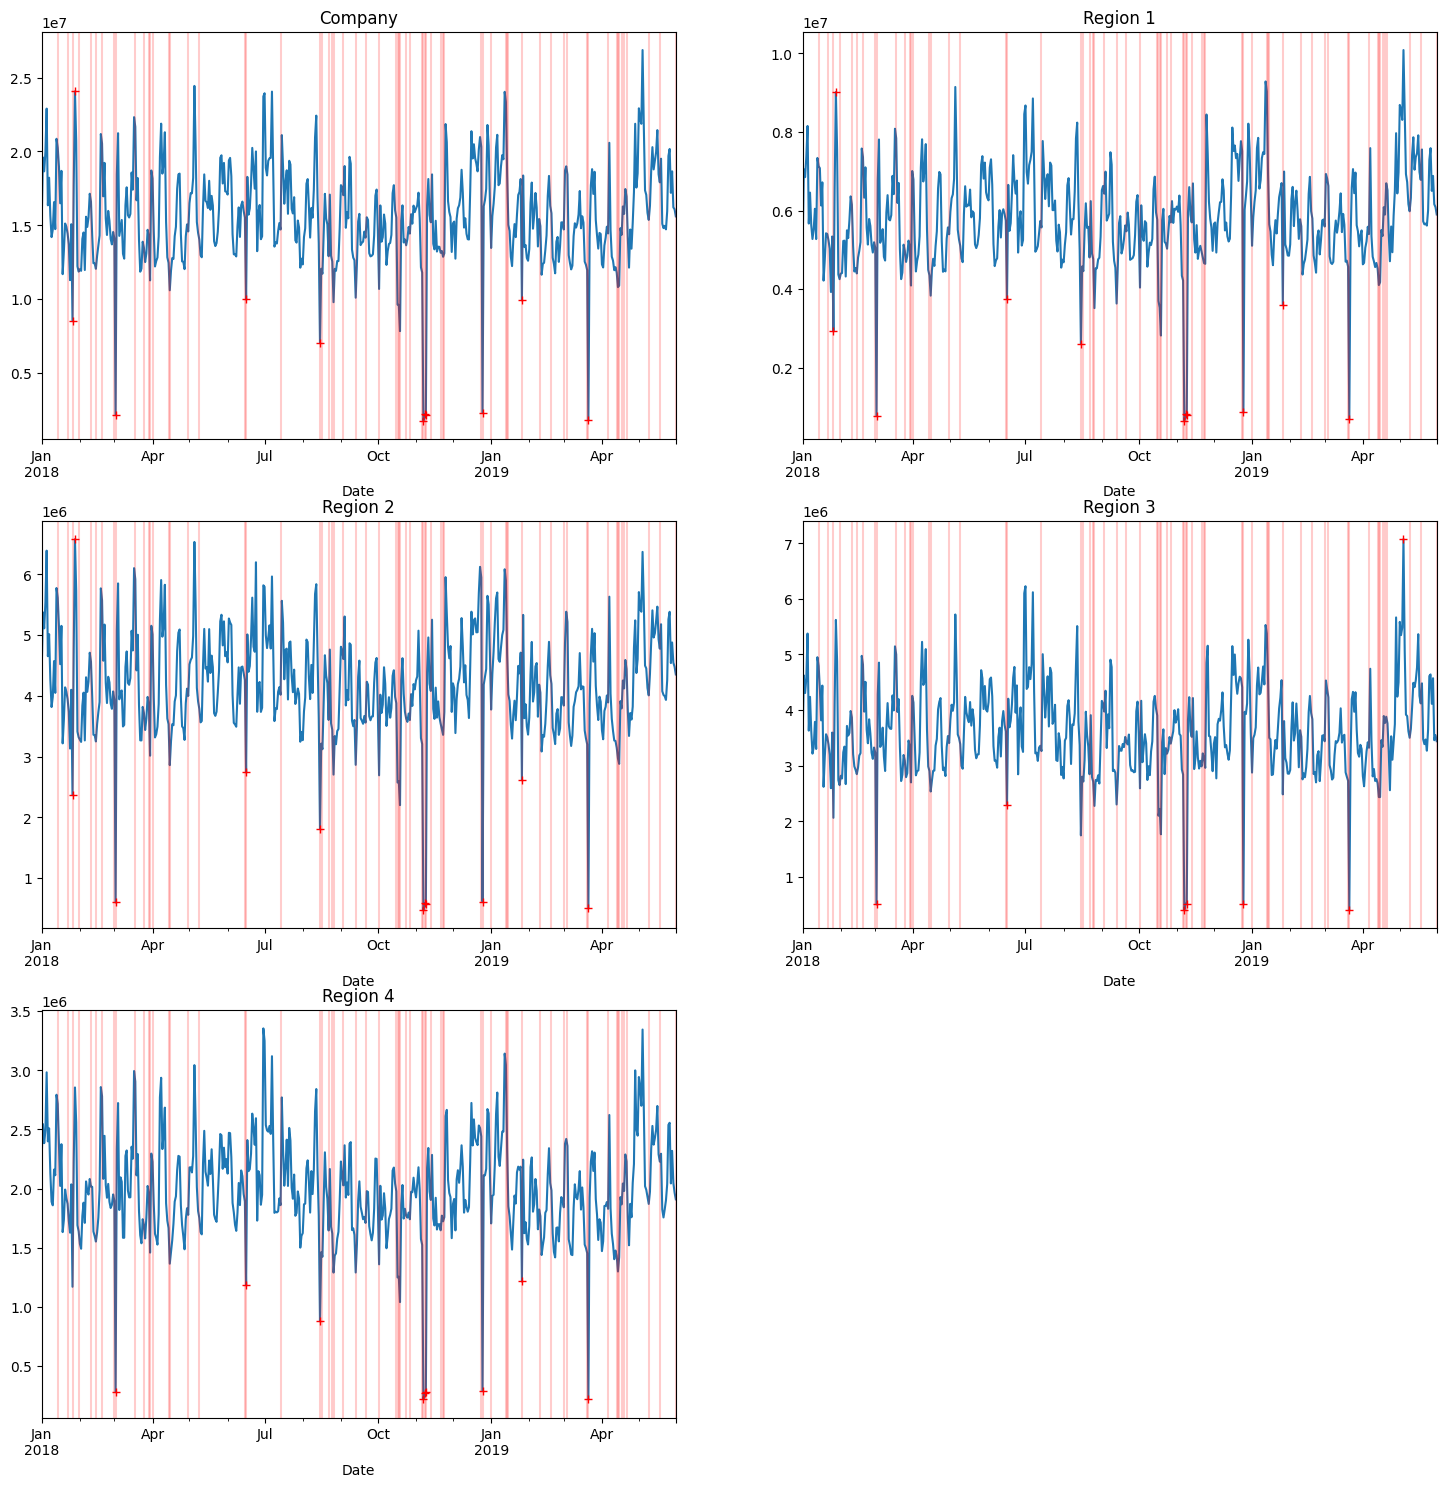

In [40]:
# Checking residuals for Anamolies against Holidays
# Where anamolies are residual values > 3x std deviation

import statsmodels.api as sm

plt.figure(figsize=(18, 18))
for i, (name, data) in enumerate(datasets.items()):
  model = sm.tsa.seasonal_decompose(data['Sales'], model='additive', period = 7)
  anomalies = data['Sales'][model.resid.abs() > 3 * model.resid.std()]
  data['Anomaly'] = model.resid.apply(lambda x: 1 if abs(x) > 3 * model.resid.std() else 0)

  print(f'Residual mean of {name}:{model.resid.mean()}')
  print()
  plt.subplot(3,2,i+1)
  data['Sales'].plot()
  anomalies.plot(style='+', color='red')
  holiday_dates = data[data['Holiday'] == 1].index
  for dates in holiday_dates:
    plt.axvline(x=dates, color='red', alpha=0.2, label='Holiday')
  plt.title(name)
plt.show()

In [41]:
# Hypothesis Test - Chi Square: Is there a significant Association between Holidays and Anomalies in Sales.
# H0: There is no significant association. H1: There is significant association

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(ts_co['Holiday'], ts_co['Anomaly'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)

if p < 0.05:
    print("There is a significant association between 'Holiday' and 'Anomaly'.")
else:
    print("There is no significant association between 'Holiday' and 'Anomaly'.")

Chi-squared statistic: 52.615256998388915
p-value: 4.0572508834972095e-13
There is a significant association between 'Holiday' and 'Anomaly'.


In [42]:
ts_co.Anomaly.value_counts()

Anomaly
0    505
1     11
Name: count, dtype: int64

### **Anomaly/Outlier Handling**

* The boxplots show presence of outliers in the data. However, this could be attributed to seasonality and exogenous factors i.e. possible real world scenarios which the model might be able to use to make more accurate forecasts, hence futher check are required before they are treated/ imputed.  
* 'Sales' Distributions for all 5 data sets are bell shaped with few extreme values (6 or 7) on the lower side skewing the distribution left.
* To elimate the outliers occuring due to seasonality we can check if they're also present in the residue. Residual values > 3x std deviation are considered as anomalies.
* The time series plots shows that anomalies, which are mostly in lower values seen as sharp dips, coinciding with holidays. There are 11 points identified as anamolies.
* The Chi-square tests shows a strong relation between holidays and anomalies suggesting that the low sales figures might be a result of certain factors related to holidays. This however is not observed on all holiday.
* The Anomalies will be interpolated to reduce their impact.

In [43]:
# Replacing Anamolies with interpolation

for i, (name, data) in enumerate(datasets.items()):
  data['Sales'] = data.apply(lambda row: row['Sales'] if row['Anomaly'] == 0 else None, axis = 1)
  data['Sales'] = data['Sales'].interpolate(method = 'linear', axis = 0)

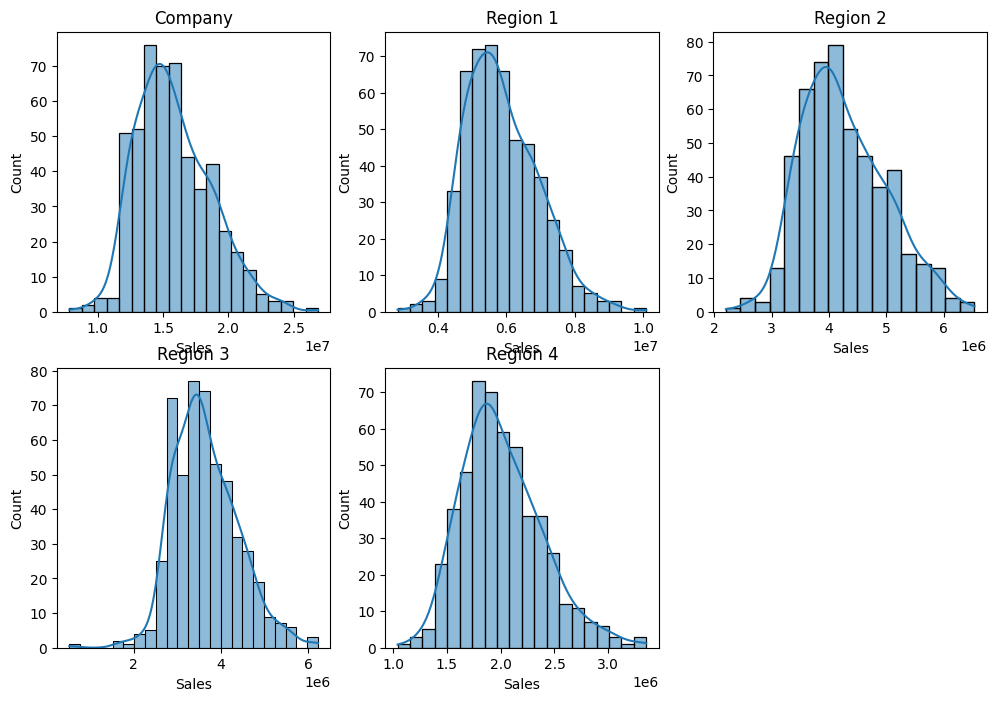

In [44]:
# Checking distribution of datasets

plt.figure(figsize=(12, 8))

for i, (name, data) in enumerate(datasets.items()):
  plt.subplot(2, 3, i+1)
  sns.histplot(data['Sales'], kde = True)
  plt.title(f'{name}')

plt.show()

# **Hypothesis Testing**

In [45]:
all = { 'All': df,'Company': ts_co, 'Region 1': ts_r1, 'Region 2': ts_r2, 'Region 3': ts_r3, 'Region 4':ts_r4}

### **1. Impact of Discount:** Do discounts significantly impact Sales?
.

**H0**: Sales are equal for discounted days and non-discounted days.

**H1**: Sales on discounted days are greater than non discounted days

.

**Test**: 2 sample independent t-Test

In [46]:
df.head()

ID  Store_id Store_Type Location_Type Region_Code       Date  \
0  T1000001         1         S1            L3          R1 2018-01-01   
1  T1000002       253         S4            L2          R1 2018-01-01   
2  T1000003       252         S3            L2          R1 2018-01-01   
3  T1000004       251         S2            L3          R1 2018-01-01   
4  T1000005       250         S2            L3          R4 2018-01-01   

   Holiday Discount  Orders     Sales  Discounted_Flag  
0        1      Yes       9  7,011.84                1  
1        1      Yes      60 51,789.12                1  
2        1      Yes      42 36,868.20                1  
3        1      Yes      23 19,715.16                1  
4        1      Yes      62 45,614.52                1

In [47]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind( df[df["Discount"] == "Yes"]['Sales'] , df[df["Discount"] == "No"]['Sales'], alternative = "greater")

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. Sales on discounted days are higher")
else:
  print("Fail to reject the null hypothesis. Sales are equal on discounted and non-discounted days")


P-value: 0.0
Reject the null hypothesis. Sales on discounted days are higher


### **2. Effect of Holidays on Sales:** Are Sales lesser on holidays?
.

**H0**: Sales on holidays and non-holidays are the same.

**H1**: Sales on holidays are **lower** compared to non-holidays.

.

**Test**: 2 sample independent t-Test

In [48]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind( df[df["Holiday"] == 1]['Sales'] , df[df["Holiday"] == 0]['Sales'], alternative = "less")

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. Sales on holidays are LOWER compared to non-holidays")
else:
  print("Fail to reject the null hypothesis. Sales on holidays and non-holidays are the same.")

P-value: 0.0
Reject the null hypothesis. Sales on holidays are LOWER compared to non-holidays


### **3. Sales Differences Across Store Types:** Is there a difference in Sales across Store Types
.

**H0**: Sales are equal for all store types.

**H1**: There's a significant difference in Sales across Store Types.

.

**Test**: ANOVA OR Kruskal Wallis Test

In [49]:
s1 = df[df['Store_Type'] == "S1"]['Sales']
s2 = df[df['Store_Type'] == "S2"]['Sales']
s3 = df[df['Store_Type'] == "S3"]['Sales']
s4 = df[df['Store_Type'] == "S4"]['Sales']
store_types = [ s1, s2, s3, s4]

In [50]:
# Checking data for normal distribution and equal variance using Shapiro Wilk Test & Levene Test
from scipy.stats import shapiro
from scipy.stats import levene

# Shapiro - Wilk Test
for st in store_types:

  test_stat, p_shapiro = shapiro(st)
  print("Shapiro Wilk P-value:", p_shapiro)

  if p_shapiro < 0.05:
    print("Data is not normally distributed\n ")
  else:
    print("Data is normally distributed\n ")


# Levene Test for Equal Variance
test_stat, p_levene = levene(s1, s2, s3, s4)

print("Levene P-value:", p_levene)

if p_levene < 0.05:
    print("Store_Type Sales variances are not equal.")
else:
    print("Store_Type Sales variances are equal.")


Shapiro Wilk P-value: 6.244850959544344e-79
Data is not normally distributed
 
Shapiro Wilk P-value: 2.313188234690706e-51
Data is not normally distributed
 
Shapiro Wilk P-value: 2.4892304934955129e-57
Data is not normally distributed
 
Shapiro Wilk P-value: 7.54256999559744e-79
Data is not normally distributed
 
Levene P-value: 0.0
Store_Type Sales variances are not equal.


###**Note:**
* The data is not normally distributes and the groups do not show equal variance.
* We can check if there's a difference in sales across Store_Types using the Kruskal Wallis Test, which is non-parametric and does not require normal distribution of data of equal variance

In [51]:
from scipy.stats import kruskal

f_stat, p_value = kruskal(s1, s2, s3, s4)

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. There's a significant difference in Sales across Store Types")
else:
  print("Fail to reject the null hypothesis. Sales are equal across Store Types")



P-value: 0.0
Reject the null hypothesis. There's a significant difference in Sales across Store Types


### **4. Sales Differences Across Regions:** Is there a difference in Sales across Region Codes
.

**H0**: Sales are equal for all Regions.

**H1**: There's a significant difference in Sales across Regions.

.

**Test**: ANOVA OR Kruskal Wallis Test

In [52]:
r1 = df[df['Region_Code']== "R1"]['Sales']
r2 = df[df['Region_Code']== "R2"]['Sales']
r3 = df[df['Region_Code']== "R3"]['Sales']
r4 = df[df['Region_Code']== "R4"]['Sales']
regions = [r1, r2, r3, r4]

In [53]:
# Checking regional data for normal distribution and equal variance using Shapiro Wilk Test & Levene Test


# Shapiro Wilk Test

for r in regions:

  test_stat, p_shapiro = shapiro(r)
  print("Shapiro Wilk P-value:", p_shapiro)
  if p_shapiro < 0.05:
    print("Data is not normally distributed\n ")
  else:
    print("Data is normally distributed\n ")

# Levene Test for Equal Variance

test_stat, p_levene = levene(r1, r2, r3, r4)

print("Levene P-value:", p_levene)

if p_levene < 0.05:
    print("Region Sales variances are not equal.")
else:
    print("Region Sales variances are equal.")




Shapiro Wilk P-value: 5.568579127456188e-90
Data is not normally distributed
 
Shapiro Wilk P-value: 6.326690054699451e-85
Data is not normally distributed
 
Shapiro Wilk P-value: 1.174723480209048e-78
Data is not normally distributed
 
Shapiro Wilk P-value: 2.5918854183877692e-68
Data is not normally distributed
 
Levene P-value: 0.0
Region Sales variances are not equal.


###**Note:**
* The regiona sales data is not normally distributes and the groups do not show equal variance.
* We can check if there's a difference in sales across Regions using the Kruskal Wallis Test, which is non-parametric and does not require normal distribution of data of equal variance

In [54]:
from scipy.stats import kruskal

f_stat, p_value = kruskal(r1, r2, r3, r4)

print("P-value:", p_value)

if p_value < 0.05:
  print("Reject the null hypothesis. There's a significant difference in Sales across Regions")
else:
  print("Fail to reject the null hypothesis. Sales are equal across Regions")

P-value: 0.0
Reject the null hypothesis. There's a significant difference in Sales across Regions


### **5. Correlation between # of Orders and Sales**

**Test**: Pearson Correlation, Spearman Correlation

In [55]:
from scipy.stats import pearsonr, spearmanr

print('Pearson Correlation between #Orders & Sales:', pearsonr(df['Orders'] , df['Sales'])[0])

print('Spearman Correlation between #Orders & Sales:', spearmanr(df['Orders'] , df['Sales'])[0])

Pearson Correlation between #Orders & Sales: 0.9416005646125761
Spearman Correlation between #Orders & Sales: 0.9377462542885381


## Results of Hypothesis Tests:

* Sales on discounted days are higher than sales on days without discounts
* Sales on holidays are LOWER compared to non-holidays
* There's a significant difference in Sales across Store Types
* There's a significant difference in Sales across Regions
* There's a very high positive correlation (~0.94) between No. of Orders and Sales.

# **Regression Methods**

## **Feature Engineering & Data Pre-processing**

In [56]:
lr_co = ts_co.copy(deep = True)
lr_r1 = ts_r1.copy(deep = True)
lr_r2 = ts_r2.copy(deep = True)
lr_r3 = ts_r3.copy(deep = True)
lr_r4 = ts_r4.copy(deep = True)

In [57]:
lr_co.drop(columns = "Anomaly", inplace = True)

In [58]:
lr_r1.drop(columns = "Anomaly", inplace = True)
lr_r2.drop(columns = "Anomaly", inplace = True)
lr_r3.drop(columns = "Anomaly", inplace = True)
lr_r4.drop(columns = "Anomaly", inplace = True)

In [59]:
lr_data = {'Company': lr_co, 'Region 1': lr_r1, 'Region 2': lr_r2, 'Region 3': lr_r3, 'Region 4':lr_r4}

In [60]:
# Creating Features from Date

for name, data in lr_data.items():
  #data['Day'] = data.index.day
  data['Month'] = data.index.month
  #data['Year'] = data.index.year
  data['Day of Week'] = data.index.day_name()
  #data['Quarter'] = data.index.quarter
  data['Day Count'] = (data.index - data.index[0]).days
  data['Weekend'] = data['Day of Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
  data['Day of Week'] = data.index.dayofweek

  if 'Discount' in data.columns:
       data.drop(columns=['Discount'], inplace=True)


In [61]:
# Encoding Month & Day of the Week to maintain cyclic nature of features

for name, data in lr_data.items():
    data['Month_sine'] = np.sin(2 * np.pi * data['Month'] / 12)
    data['Month_cosine'] = np.cos(2 * np.pi * data['Month'] / 12)
    data['Day of Week_sine'] = np.sin(2 * np.pi * data['Day of Week'] / 7)
    data['Day of Week_cosine'] = np.cos(2 * np.pi * data['Day of Week'] / 7)

    data.drop(columns = ['Month', 'Day of Week', 'Orders'], inplace = True)


    lr_data[name] = data



In [62]:
# Creating Sales Lag Features


for name, data in lr_data.items():
  #Lag 1
  data['Sales_Lag1'] = data['Sales'].shift(1)
  #Lag 2
  data['Sales_Lag2'] = data['Sales'].shift(2)
  #Lag 3
  data['Sales_Lag3'] = data['Sales'].shift(3)

  #Sales on the same weekday last week
  data['Sales_Lag7'] = data['Sales'].shift(7)

  #Sales on the same day last month
  data['Sales_Lag31'] = data['Sales'].shift(31)

  #Last week's average Sales
  data['Avg_Sales_Last7'] = data['Sales'].shift(1).rolling(window = 7).mean()

  # Average Sales for last 14 days
  data['Avg_Sales_Last14'] = data['Sales'].shift(1).rolling(window = 14).mean()

  # Average Sales for last 31 days
  data['Avg_Sales_Last31'] = data['Sales'].shift(1).rolling(window = 31).mean()

  # Dropping Nan rows
  data.dropna(inplace = True)



In [63]:
lr_data = {'Company': lr_co, 'Region 1': lr_r1, 'Region 2': lr_r2, 'Region 3': lr_r3, 'Region 4':lr_r4}

In [64]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for name, data in lr_data.items():
  data_copy = data.copy()
  cols = ['Sales_Lag1','Sales_Lag2', 'Sales_Lag3', 'Sales_Lag7', 'Sales_Lag31','Avg_Sales_Last7', 'Avg_Sales_Last14', 'Avg_Sales_Last31']
  data[cols] = scaler.fit_transform(data[cols])


In [65]:
cols = [col for col in lr_co.columns if col != 'Sales'] + ['Sales']
lr_co = lr_co[cols]
lr_r1 = lr_r1[cols]
lr_r2 = lr_r2[cols]
lr_r3 = lr_r3[cols]
lr_r4 = lr_r4[cols]

In [66]:
lr_r1.head()

Holiday  Discounted Stores  Day Count  Weekend  Month_sine  \
Date                                                                     
2018-02-01        0               0.01         31        0        0.87   
2018-02-02        0               0.01         32        0        0.87   
2018-02-03        0               0.00         33        1        0.87   
2018-02-04        0               0.00         34        1        0.87   
2018-02-05        0               0.00         35        0        0.87   

            Month_cosine  Day of Week_sine  Day of Week_cosine  Sales_Lag1  \
Date                                                                         
2018-02-01          0.50              0.43               -0.90       -1.51   
2018-02-02          0.50             -0.43               -0.90       -1.38   
2018-02-03          0.50             -0.97               -0.22       -1.36   
2018-02-04          0.50             -0.78                0.62       -0.60   
2018-02-05          0.50              0.00                1.00       -0.59   

            Sales_Lag2  Sales_Lag3  Sales_Lag7  Sales_Lag31  Avg_Sales_Last7  \
Date                                                                           
2018-02-01       -1.39        1.58       -0.48        -0.69             0.02   
2018-02-02       -1.50       -1.39        0.09         1.23            -0.17   
2018-02-03       -1.37       -1.50        0.66         1.03            -0.49   
2018-02-04       -1.36       -1.37        1.13         1.53            -0.75   
2018-02-05       -0.59       -1.36        1.60         2.31            -1.12   

            Avg_Sales_Last14  Avg_Sales_Last31        Sales  
Date                                                         
2018-02-01             -0.87              0.21 4,396,632.00  
2018-02-02             -0.84              0.16 4,410,351.00  
2018-02-03             -0.89             -0.03 5,227,101.00  
2018-02-04             -0.91             -0.14 5,235,183.00  
2018-02-05             -0.93             -0.29 4,322,556.00

##**Linear Regression & XGB Model Building & Testing**

In [67]:
# Function to evaluate performance

from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3))
    print('MAPE:', round(mape(actual, predicted), 3))


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor


In [69]:
# Function to...
# Split Data
# Train Linear Regression & XGB Model
# Predict Sales for n days. Plot & Compare.
# Measure MAE, RMSE, MAPE
# Check Model parameters
# Plot and Compare Model parameters
# Plot residuals over time, plot residual histogram and scatter plot


def regression_forecast(df, n):

    # Splitting the data into training and test sets
    x_train = df.iloc[:-n, :-1]
    x_test = df.iloc[-n:, :-1]
    y_train = df.iloc[:-n, -1]
    y_test = df.iloc[-n:, -1]

    # Linear Regression Training
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Ridge Regression Training
    #model_r = Ridge(alpha=0.001)
    #model_r.fit(x_train, y_train)

    # XGBoost Regression Training
    model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model_xgb.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    #y_pred_r = model_r.predict(x_test)
    y_pred_xgb = model_xgb.predict(x_test)

    # Performance Evaluation
    print("Linear Regression:")
    performance(y_test, y_pred)
    print()
    #print("Ridge Regression:")
    #performance(y_test, y_pred_r)
    #print()
    print("XGBoost Regression:")
    performance(y_test, y_pred_xgb)
    print()

    # Plotting test & prediction
    plt.figure(figsize=(14, 5))
    plt.plot(x_test.index, y_test, label="Original")
    plt.plot(x_test.index, y_pred, linestyle="dotted", label="Linear Prediction")
    #plt.plot(x_test.index, y_pred_r, linestyle="dashed", label="Ridge Prediction")
    plt.plot(x_test.index, y_pred_xgb, linestyle="dashdot", label="XGB Prediction")
    plt.title("Sales Forecast")
    plt.ylabel("Sales")
    plt.xlabel("Dates")
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.show()

    # Model Parameters
    print("\n Model Parameters:")
    for feature, coef_lr, coef_xgb in zip(x_train.columns, model.coef_, model_xgb.feature_importances_):
      print(f"{feature}:")
      print(f"  Linear Regression co-ef:  {coef_lr:.4f}")
      print(f"  XGBoost Importance: {coef_xgb:.4f}")
      print()


    plt.figure(figsize=(15, 5))

    # Linear Regression Coefficients
    plt.subplot(1, 2, 1)
    plt.bar(x_train.columns, model.coef_)
    plt.xticks(rotation=45, ha='right')
    plt.title("Linear Regression Coefficients")
    plt.ylabel("Coefficient Value")
    plt.tight_layout()

    # XGBoost Regression Coefficients
    plt.subplot(1, 2, 2)
    plt.bar(x_train.columns, model_xgb.feature_importances_)
    plt.xticks(rotation=45, ha='right')
    plt.title("XGBoost Regression Feature Importances")
    plt.ylabel("Coefficient Value")
    plt.tight_layout()

    plt.show()




    residuals = y_test.values.flatten() - y_pred.flatten()
    residuals_xbg = y_test.values.flatten() - y_pred_xgb.flatten()

    # Plot residuals over time
    plt.figure(figsize=(10, 5))
    plt.plot(x_test.index, residuals, marker='.', linestyle='-', color='blue', label='LR Residuals', alpha = 0.6)
    plt.plot(x_test.index, residuals_xbg, marker='.', linestyle='-', color = "green", label='XGB Residuals', alpha = 0.6)
    plt.axhline(y=residuals.mean(), color='green', linestyle='--')
    plt.axhline(y=0, color='red', linestyle='-.')
    plt.text(x=x_test.index[0], y=residuals.mean(), s=f'Res. Mean (LR): {residuals.mean():.2f}', color='blue', va='top')
    plt.text(x=x_test.index[0], y=residuals_xbg.mean(), s=f'Res. Mean (XGB): {residuals_xbg.mean():.2f}', color='green', va='bottom')
    plt.title('Residuals over Time')
    plt.xlabel('Date')
    plt.ylabel('Residual (Actual - Predicted)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    plt.show()


    #Histograms
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    # Histogram of LR residuals
    sns.histplot(residuals, kde=True)
    plt.title('Distribution of Residuals from Linear Regression Model')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.tight_layout()

    plt.subplot(1, 2, 2)
    # Histogram of XGB residuals
    sns.histplot(residuals_xbg, kde=True)
    plt.title('Distribution of Residuals from XGBoost')
    plt.xlabel('Residual')
    plt.ylabel('Frequency')
    plt.tight_layout()

    plt.show()

    #Scatter plots
    plt.figure(figsize=(15, 5))

    # Scatter plot of predictions & residuals
    plt.subplot(1, 2, 1)
    plt.scatter(y_pred, residuals)
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals")
    plt.title("Linear Regression Residuals vs Predictions")
    plt.tight_layout()

    # Scatter plot of predictions & residuals
    plt.subplot(1, 2, 2)
    plt.scatter(y_pred_xgb, residuals_xbg)
    plt.xlabel("Predicted Sales")
    plt.ylabel("Residuals")
    plt.title("XGB Residuals vs Predictions")
    plt.tight_layout()

    plt.show()

    print()
    print()




Linear Regression:
MAE : 1172347.682
RMSE : 1673382.784
MAPE: 0.067

XGBoost Regression:
MAE : 1168665.341
RMSE : 1752816.872
MAPE: 0.07



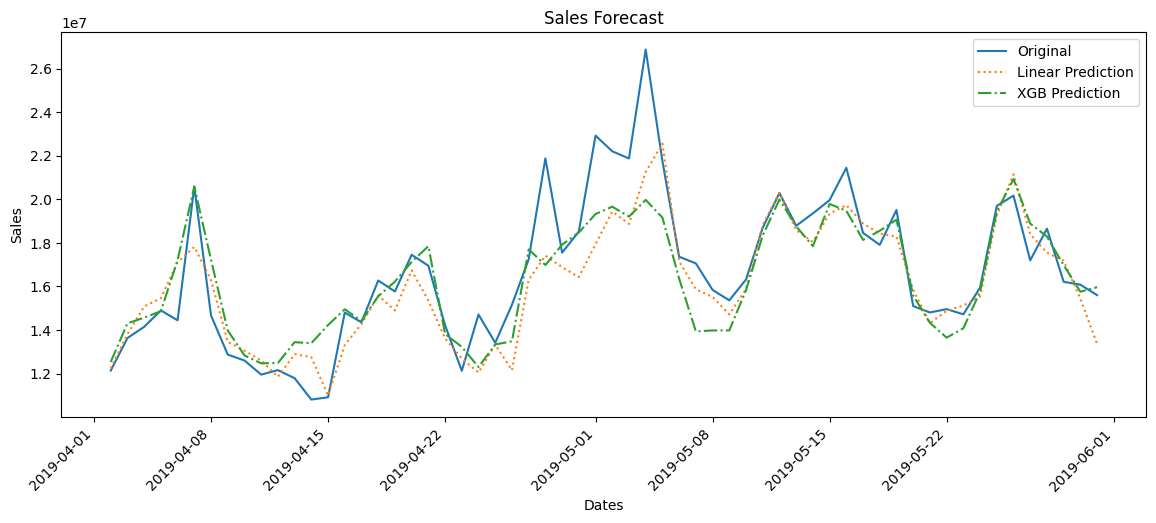


 Model Parameters:
Holiday:
  Linear Regression co-ef:  -1291550.3346
  XGBoost Importance: 0.0351

Discounted Stores:
  Linear Regression co-ef:  3050378.6934
  XGBoost Importance: 0.0748

Day Count:
  Linear Regression co-ef:  -292.8688
  XGBoost Importance: 0.0158

Weekend:
  Linear Regression co-ef:  2829124.5298
  XGBoost Importance: 0.3933

Month_sine:
  Linear Regression co-ef:  69829.2154
  XGBoost Importance: 0.0123

Month_cosine:
  Linear Regression co-ef:  118590.6553
  XGBoost Importance: 0.0286

Day of Week_sine:
  Linear Regression co-ef:  449137.6988
  XGBoost Importance: 0.0412

Day of Week_cosine:
  Linear Regression co-ef:  -396599.8429
  XGBoost Importance: 0.0151

Sales_Lag1:
  Linear Regression co-ef:  1203194.1560
  XGBoost Importance: 0.2859

Sales_Lag2:
  Linear Regression co-ef:  13651.7655
  XGBoost Importance: 0.0148

Sales_Lag3:
  Linear Regression co-ef:  71775.9046
  XGBoost Importance: 0.0121

Sales_Lag7:
  Linear Regression co-ef:  142041.7989
  XGBoost

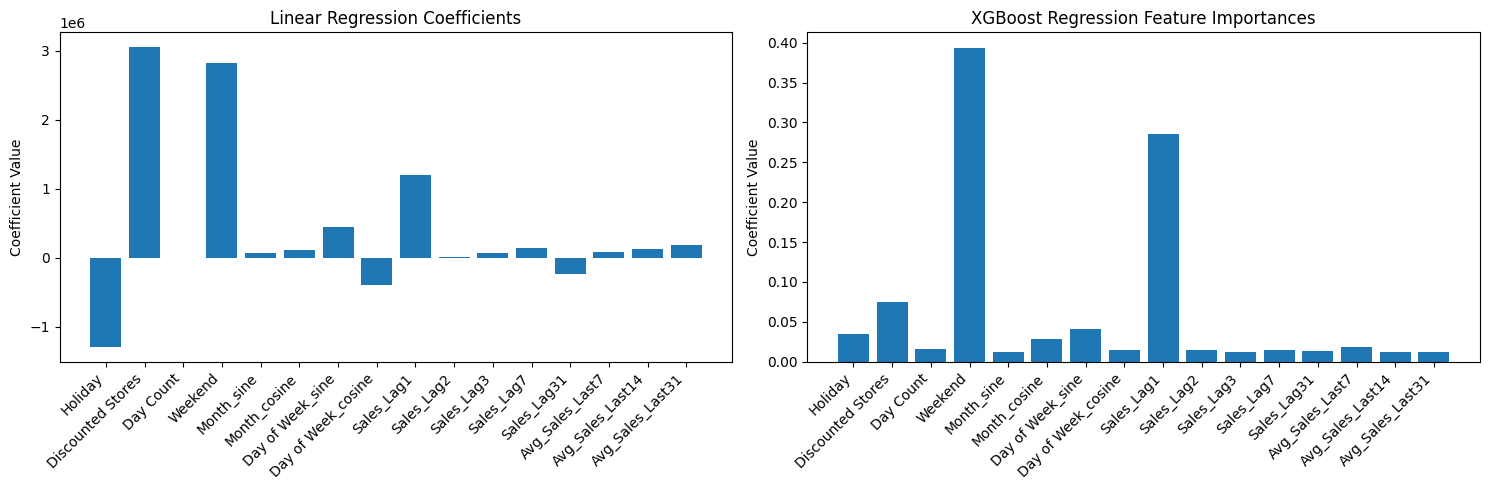

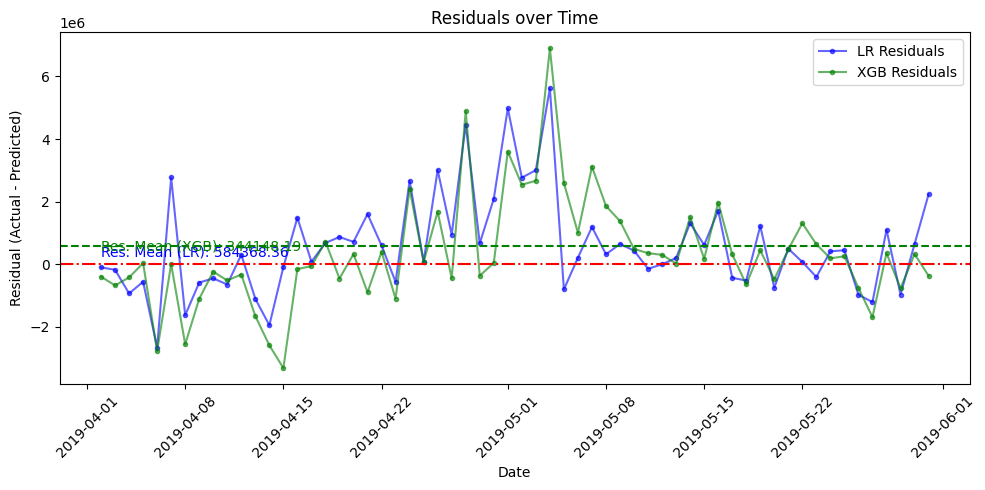

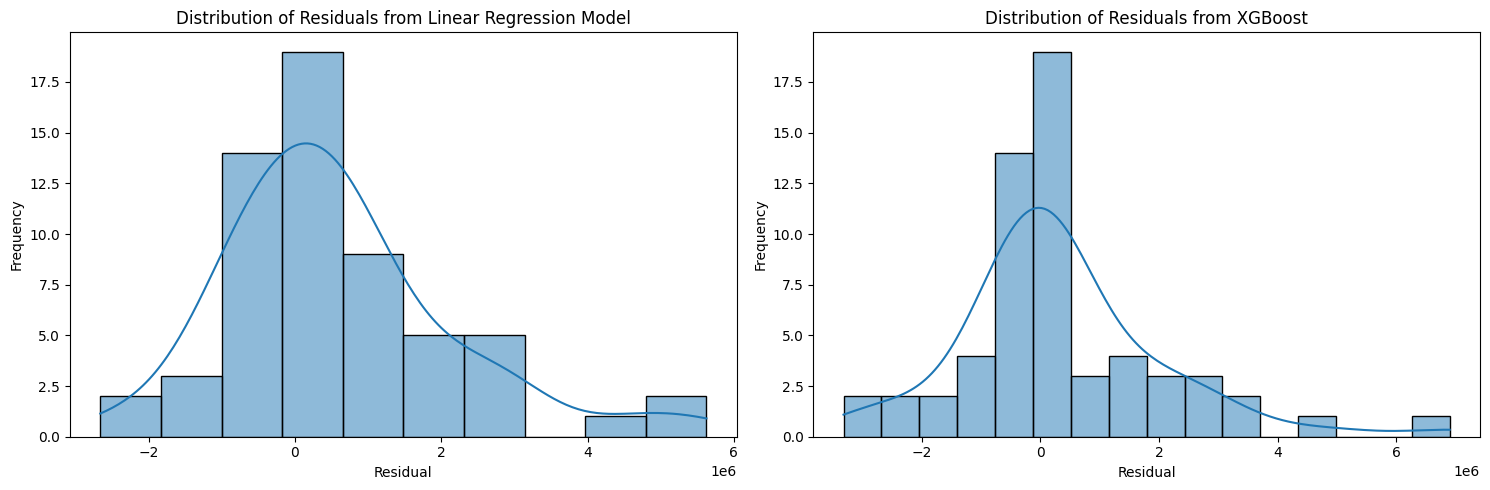

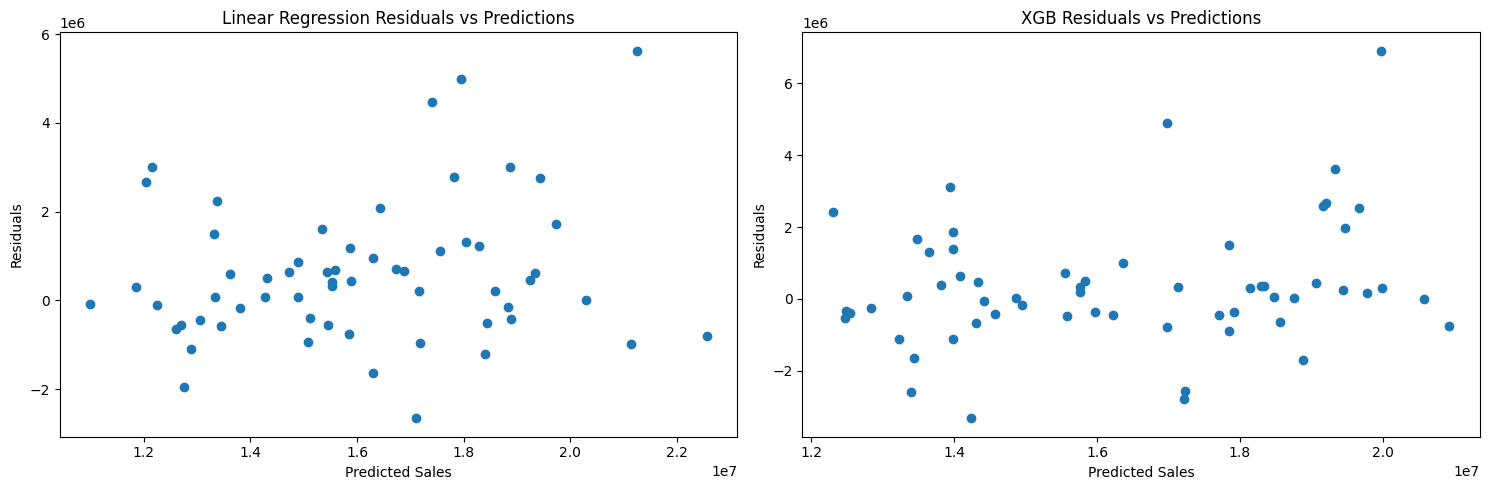

In [70]:
regression_forecast(lr_co, 60)

In [71]:
# A shorter Function to
# Split Data
# Train Linear Regression & XGB Model
# Predict Sales for n days.
# Measure MAE, RMSE, MAPE

def regression_forecast_lite(df, n):

    # Splitting the data into training and test sets
    x_train = df.iloc[:-n, :-1]
    x_test = df.iloc[-n:, :-1]
    y_train = df.iloc[:-n, -1]
    y_test = df.iloc[-n:, -1]

    # Linear Regression Training
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Ridge Regression Training
    #model_r = Ridge(alpha=0.001)
    #model_r.fit(x_train, y_train)

    # XGBoost Regression Training
    model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model_xgb.fit(x_train, y_train)

    # Predictions
    y_pred = model.predict(x_test)
    #y_pred_r = model_r.predict(x_test)
    y_pred_xgb = model_xgb.predict(x_test)

    # Performance Evaluation
    print("Linear Regression:")
    performance(y_test, y_pred)
    print()
    #print("Ridge Regression:")
    #performance(y_test, y_pred_r)
    #print()
    print("XGBoost Regression:")
    performance(y_test, y_pred_xgb)
    print()


In [72]:
lr_data = {'Company': lr_co, 'Region 1': lr_r1, 'Region 2': lr_r2, 'Region 3': lr_r3, 'Region 4':lr_r4}

In [73]:
for name, data in lr_data.items():
  print(name)
  regression_forecast_lite(data, 60)
  print()

Company
Linear Regression:
MAE : 1172347.682
RMSE : 1673382.784
MAPE: 0.067

XGBoost Regression:
MAE : 1168665.341
RMSE : 1752816.872
MAPE: 0.07


Region 1
Linear Regression:
MAE : 446130.734
RMSE : 634474.432
MAPE: 0.068

XGBoost Regression:
MAE : 522751.219
RMSE : 705403.953
MAPE: 0.079


Region 2
Linear Regression:
MAE : 274037.077
RMSE : 369449.433
MAPE: 0.061

XGBoost Regression:
MAE : 319793.596
RMSE : 409310.123
MAPE: 0.073


Region 3
Linear Regression:
MAE : 310973.314
RMSE : 447682.771
MAPE: 0.077

XGBoost Regression:
MAE : 326764.739
RMSE : 445791.957
MAPE: 0.085


Region 4
Linear Regression:
MAE : 161370.453
RMSE : 226893.031
MAPE: 0.074

XGBoost Regression:
MAE : 179927.004
RMSE : 240643.125
MAPE: 0.084




### **Linear & XGBoost Regression Report:**

* Linear Regression ourperforms XGB: Linear Regression marginally (0.3 to 1.2%) outperforms XGBoost Regression across all levels (Company and Regions 1-4), showing lower MAE, RMSE, and MAPE in every case.

* MAPE: The Linear Regression models achieved a good MAPE in the range of 6.1% to 7.7% whereas the XGBoost Model achieved a MAPE in the range of 7% to 8.5%

* The Linear Regression model assigns higher weightage (co-efficients) to Proportion of stores with Discounts, Holiday, Weekend and the previous day's Sales (Lag 1)

* The XGBoost model assigns highest importance to Weekends, previous days Sales, Holiday and Proportion of Discounted stores.

* **However, it should be noted that the model uses lag_values as features and the test data contained lag values which would otherwise not be available when forecasting for future dates. This contributed to the model performing better than expected. For future dates, the model prediction can be applied recursively i.e. 1 day at a time such that the predicted values can be used to create lag values for future dates. The performance is expected to decay in such a situation as the predicted values generated will have errors which will add up over time.**

## **Recursive Regression Forecasting**
Using ForecasterRecursive from skforecast.recursive

In [74]:
lr_co.columns

Index(['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine',
       'Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales_Lag1',
       'Sales_Lag2', 'Sales_Lag3', 'Sales_Lag7', 'Sales_Lag31',
       'Avg_Sales_Last7', 'Avg_Sales_Last14', 'Avg_Sales_Last31', 'Sales'],
      dtype='object')

In [75]:
#Preparing datsets
# Dropping lag features which will be generated by ForecasterRecursive()

lr_co_rec = lr_co[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r1_rec = lr_r1[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r2_rec = lr_r2[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r3_rec = lr_r3[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]
lr_r4_rec = lr_r4[['Holiday', 'Discounted Stores', 'Day Count', 'Weekend', 'Month_sine','Month_cosine', 'Day of Week_sine', 'Day of Week_cosine', 'Sales']]


In [76]:
!pip install skforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.0/815.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.8 MB/s eta 0:00:00


In [77]:
from skforecast.recursive import ForecasterRecursive
from skforecast.preprocessing import RollingFeatures

In [78]:
def recursive_forecast_test(name, df, target_col='Sales', forecast_horizon=60):

    df = df.copy()
    df = df.dropna().reset_index(drop=True)
    y = df[target_col]
    X = df.drop(columns=[target_col])
    dates = df.index

    # Split train-test
    y_train = y[:-forecast_horizon]
    y_test = y[-forecast_horizon:]
    X_train = X[:-forecast_horizon]
    X_test = X[-forecast_horizon:]
    test_index = y_test.index

    # Lag and rolling features
    window_features = rolling_features = RollingFeatures(
        stats=['mean','mean','mean'],
        window_sizes=[7, 14, 31])

    # Initialize Forecaster
    forecaster_lr = ForecasterRecursive(
        regressor=LinearRegression(),
        lags=[1, 2, 3, 7, 31],
        window_features=window_features
    )

    forecaster_lr_exog = ForecasterRecursive(
        regressor=LinearRegression(),
        lags=[1, 2, 3, 7, 31],
        window_features=window_features
    )

    forecaster_xgb = ForecasterRecursive(
        regressor=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        lags=[1, 2, 3, 7, 31],
        #window_features=window_features
    )


    # Model fit without exogenous variables
    forecaster_lr.fit(y=y_train)

    # Models fit with exogenous variables
    forecaster_lr_exog.fit(y=y_train, exog=X_train)
    forecaster_xgb.fit(y=y_train, exog=X_train)

    # Predict using test set exogenous variables
    y_pred_lr = forecaster_lr.predict(steps=forecast_horizon)
    y_pred_lr_exog = forecaster_lr_exog.predict(steps=forecast_horizon, exog=X_test)
    y_pred_xgb = forecaster_xgb.predict(steps=forecast_horizon, exog=X_test)

    # Evaluation
    print(f"\n{name} Forecast Performance with Linear Regression:")
    performance(y_test, y_pred_lr)

    print(f"\n{name} Forecast Performance with Linear Regression & Exogenous Variables:")
    performance(y_test, y_pred_lr_exog)

    print(f"\n{name} Forecast Performance with XGBoost & Exogenous Variables::")
    performance(y_test, y_pred_xgb)

    # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(test_index, y_test, label="Actual")
    plt.plot(test_index, y_pred_lr, linestyle="dashed", label="LR Forecast", color="blue")
    plt.plot(test_index, y_pred_lr_exog, linestyle="dotted", label="LR Forecast with Exog", color="red")
    plt.plot(test_index, y_pred_xgb, linestyle="dashed", label="XGBoost Forecast", color="green")
    plt.title(f"{name} - Forecast vs Actual")
    plt.xlabel("Time")
    plt.ylabel("Sales")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [79]:
lr_data_rec = {'Company': lr_co_rec, 'Region 1': lr_r1_rec, 'Region 2': lr_r2_rec, 'Region 3': lr_r3_rec, 'Region 4':lr_r4_rec}

Company

Company Forecast Performance with Linear Regression:
MAE : 2409000.705
RMSE : 3227432.079
MAPE: 0.138

Company Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 2672553.742
RMSE : 3332336.464
MAPE: 0.151

Company Forecast Performance with XGBoost & Exogenous Variables::
MAE : 1911790.634
RMSE : 2598232.178
MAPE: 0.108


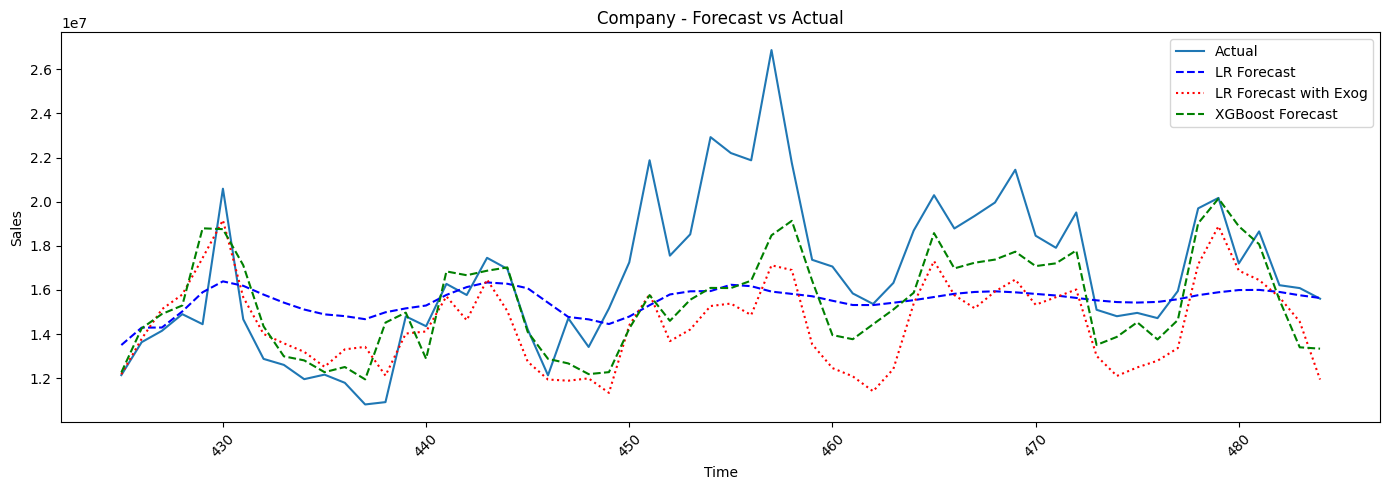

Region 1

Region 1 Forecast Performance with Linear Regression:
MAE : 967057.048
RMSE : 1271464.588
MAPE: 0.144

Region 1 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 1066596.634
RMSE : 1318389.507
MAPE: 0.158

Region 1 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 841206.737
RMSE : 1076831.276
MAPE: 0.122


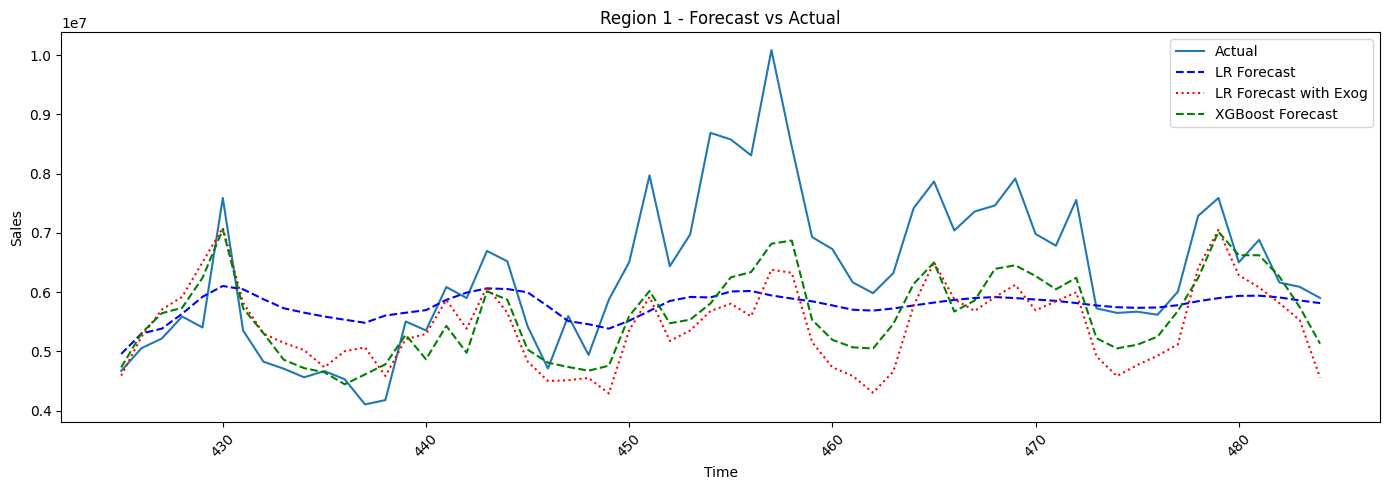

Region 2

Region 2 Forecast Performance with Linear Regression:
MAE : 553250.789
RMSE : 711869.337
MAPE: 0.124

Region 2 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 598941.601
RMSE : 730205.962
MAPE: 0.131

Region 2 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 464415.254
RMSE : 603738.198
MAPE: 0.101


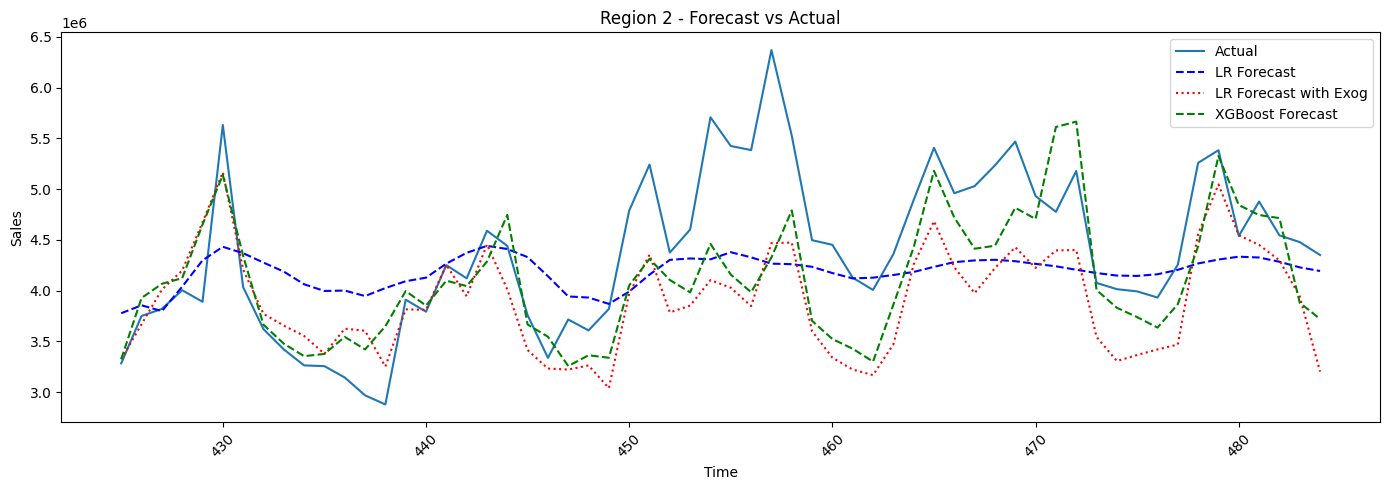

Region 3

Region 3 Forecast Performance with Linear Regression:
MAE : 604830.777
RMSE : 806155.061
MAPE: 0.151

Region 3 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 644942.079
RMSE : 802230.96
MAPE: 0.158

Region 3 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 462565.927
RMSE : 620177.128
MAPE: 0.115


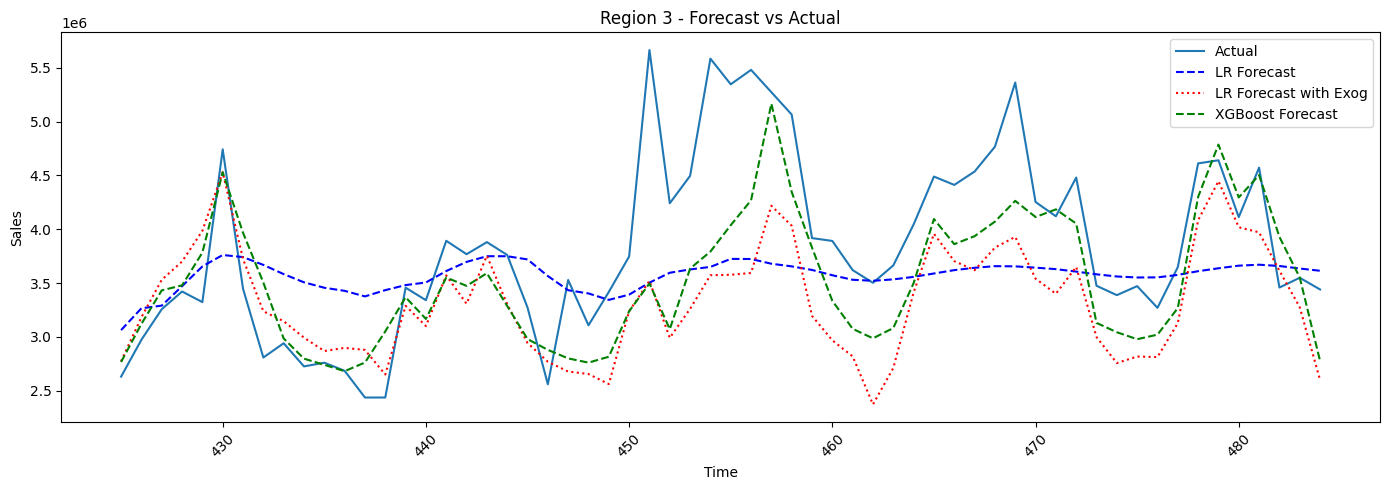

Region 4

Region 4 Forecast Performance with Linear Regression:
MAE : 303121.148
RMSE : 410950.775
MAPE: 0.138

Region 4 Forecast Performance with Linear Regression & Exogenous Variables:
MAE : 352951.477
RMSE : 437785.83
MAPE: 0.158

Region 4 Forecast Performance with XGBoost & Exogenous Variables::
MAE : 258010.147
RMSE : 347000.205
MAPE: 0.117


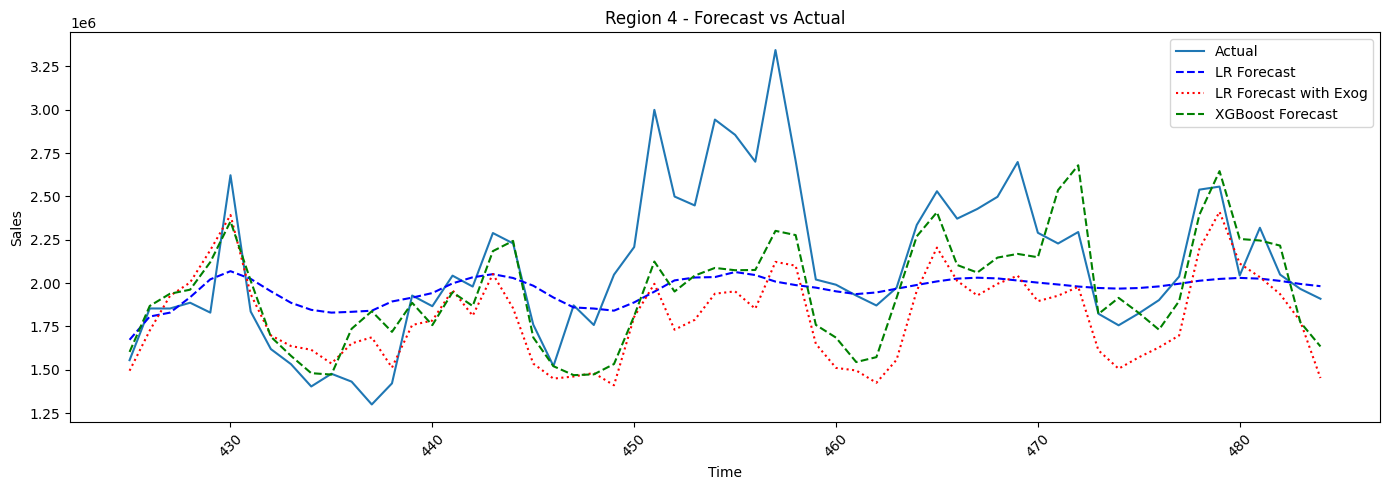

In [80]:
for name, data in lr_data_rec.items():
  print(name)
  recursive_forecast_test(name, data, target_col='Sales', forecast_horizon=60)

### **Recursive Forecasting Test Report**

* Linear Regression and XGBoost models were build and recursive forecasting was performed on test data using skforecast ForecasterRecursive.

* In this test the test data did not contain lag features from the original data but were created recursively i.e. sales was predicted one record (row) at a time and the predicted data was used as lag values for future dates. The predicted and actual sales values were then compared.  

* Interestingly the Linear Regression model performed better without exogenous variables (Date features like Weekend, Holiday, Day of the week, etc) while the XGBoost model performed much better with the exogenous variables and without the rolling 7,14,31 averages.

* Unlike the earlier scenario, here the XGBoost model outperformed the Linear Regression model in all datasets by a considerable margin.

* When applied recursively the Linear Regression model predicted sales for 60 days with a MAPE of between 12.4% (for Region 2) to 15.1% (for Region 3) with exogenous variable. Without exogenous variables, the Linear Regression Model had a higher MAPE between 13.1% to 15.8%.

* When applied recursively the XGBoost model with exogenous variables predicted sales for 60 days with a MAPE of between 10.1% (for Region 1) to 12.2% (for Region 4).

* The MAPE as expected is much higher but can be considered fairly good.  

* The LR model without exogenous variables resulted in a better MAPE than with exog variables. however, on visual inspection the LR predictions without exog variables shows a relatively smooth steadily line whereas the plot line for LR predictions with exog variables appears to follow the patterns of the actual predictions more closely like the XGBoost Model. A possible reason could be the presence of outliers in the Sales data being captured


.....

Readings:

* Company
  * Forecast Performance with Linear Regression: MAPE: 10.8%
  * Forecast Performance with Linear Regression & Exogenous Variables: 15.1%
  * Forecast Performance with XGBoost & Exogenous Variables:MAPE: 12.8%

* Region 1
  * Forecast Performance with Linear Regression: MAPE: 14.4%
  * Forecast Performance with Linear Regression & Exogenous Variables: 15.8%
  * Forecast Performance with XGBoost & Exogenous Variables:MAPE: 12.8%

* Region 2
  * Forecast Performance with Linear Regression: MAPE: 12.4%
  * Forecast Performance with Linear Regression & Exogenous Variables: 13.1%
  * Forecast Performance with XGBoost & Exogenous Variables:MAPE: 10.1%

* Region 3
  * Forecast Performance with Linear Regression: MAPE: 15.1%
  * Forecast Performance with Linear Regression & Exogenous Variables: 15.8%
  * Forecast Performance with XGBoost & Exogenous Variables:MAPE: 11.5%

* Region 4
  * Forecast Performance with Linear Regression: MAPE: 13.8.1%
  * Forecast Performance with Linear Regression & Exogenous Variables: 15.8%
  * Forecast Performance with XGBoost & Exogenous Variables:MAPE: 11.7%



## **Regression Forecast : Inference Data**

Data given in the file TEST_FINAL.csv was imported as dataframe df_test and will be used to predict sales for the period 2019-06-01 to 2019-07-31


###**Preparing Dataset for Inferencing**

In [81]:
# Inference (test) data provided as Test

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [82]:
# Function to tranform and process the inference data given
  # The test data provided is ungrouped with records of all stores for each day
  # The data needs to be grouped and transformed for the Recursive Forecasting function
  # The function will group and aggregate the data for Company and Regions : R1, R2, R3, R4

def inference_data_processor(data):
    import pandas as pd
    import numpy as np

    # Step 1: Convert 'Date' to datetime and add 'Discounted_Flag'
    data['Date'] = pd.to_datetime(data['Date'])
    data['Discounted_Flag'] = data['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Step 2: function to process each group
    def process_group(group_df):
        group_df = group_df.groupby('Date').agg({
            'Holiday': 'last',
            'Discounted_Flag': lambda x: x.sum() / x.count()
        }).rename(columns={'Discounted_Flag': 'Discounted Stores'})

        # Date features
        group_df['Day Count'] = (group_df.index - group_df.index.min()).days
        group_df['Weekend'] = group_df.index.dayofweek.isin([5, 6]).astype(int)
        day_of_week = group_df.index.dayofweek
        month = group_df.index.month

        # Cyclical features
        group_df['Month_sine'] = np.sin(2 * np.pi * month / 12)
        group_df['Month_cosine'] = np.cos(2 * np.pi * month / 12)
        group_df['Day of Week_sine'] = np.sin(2 * np.pi * day_of_week / 7)
        group_df['Day of Week_cosine'] = np.cos(2 * np.pi * day_of_week / 7)

        return group_df

    # Step 3: Create datasets
    inf_all = process_group(data)
    inf_r1 = process_group(data[data['Region_Code'] == 'R1'])
    inf_r2 = process_group(data[data['Region_Code'] == 'R2'])
    inf_r3 = process_group(data[data['Region_Code'] == 'R3'])
    inf_r4 = process_group(data[data['Region_Code'] == 'R4'])

    return inf_all, inf_r1, inf_r2, inf_r3, inf_r4



In [83]:
# Creating Inference Dataframes

inf_all, inf_r1, inf_r2, inf_r3, inf_r4 = inference_data_processor(df_test)

In [84]:
inf_all.head()

Holiday  Discounted Stores  Day Count  Weekend  Month_sine  \
Date                                                                     
2019-06-01        0               0.03          0        1        0.00   
2019-06-02        0               0.03          1        1        0.00   
2019-06-03        0               0.12          2        0        0.00   
2019-06-04        0               0.12          3        0        0.00   
2019-06-05        1               0.69          4        0        0.00   

            Month_cosine  Day of Week_sine  Day of Week_cosine  
Date                                                            
2019-06-01         -1.00             -0.97               -0.22  
2019-06-02         -1.00             -0.78                0.62  
2019-06-03         -1.00              0.00                1.00  
2019-06-04         -1.00              0.78                0.62  
2019-06-05         -1.00              0.97               -0.22

In [85]:
inf_sets = {'Company': inf_all, 'Region 1': inf_r1, 'Region 2': inf_r2, 'Region 3': inf_r3, 'Region 4':inf_r4}

In [86]:
inf_all.to_csv('inf_all.csv')
inf_r1.to_csv('inf_r1.csv')
inf_r2.to_csv('inf_r2.csv')
inf_r3.to_csv('inf_r3.csv')
inf_r4.to_csv('inf_r4.csv')

In [87]:
# Recursive Prediction Function for Inference Data...
# df_train : Training data
# df_inference: is the inference data for the period to be forecasted
# inf_label : Regional Level of the inference data e.g. Company, Region 1, Region 2, etc


def recursive_forecast(df_train, df_inference, inf_label, target_col='Sales'):

    # Copy input data
    df_train = df_train.copy()
    df_inference = df_inference.copy()

    #set date frequency (error fix)
    df_train.index.freq = 'D'
    df_inference.index.freq = 'D'

    # Extract target and exogenous variables
    y_train = df_train[target_col]
    X_train = df_train.drop(columns=[target_col])
    X_inference = df_inference.drop(columns=[target_col]) if target_col in df_inference.columns else df_inference

    # Forecast horizon
    forecast_horizon = len(df_inference)

    # Lag and rolling
    window_features = rolling_features = RollingFeatures(
        stats=['mean','mean','mean'],
        window_sizes=[7, 14, 31])

    max_lag = 31
    last_window = y_train[-max_lag:]  # or more if rolling windows are large

    # Initialize forecasters
    forecaster_lr = ForecasterRecursive(
        regressor=LinearRegression(),
        lags=[1, 2, 3, 7, 31],
        window_features=window_features)

    forecaster_xgb = ForecasterRecursive(
        regressor=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
        lags=[1, 2, 3, 7, 31])

    # Fit models with exogenous variables
    forecaster_lr.fit(y=y_train, exog=X_train)
    forecaster_xgb.fit(y=y_train, exog=X_train)

    # Predict with exogenous variables for inference period
    y_pred_lr = forecaster_lr.predict(steps=forecast_horizon, exog=X_inference, last_window=y_train[-max_lag:])
    y_pred_xgb = forecaster_xgb.predict(steps=forecast_horizon, exog=X_inference, last_window=y_train[-max_lag:])

    # Assign predictions to df_inference
    df_inference_lr = df_inference.copy()
    df_inference_lr['Sales'] = y_pred_lr.values

    df_inference_xgb = df_inference.copy()
    df_inference_xgb['Sales'] = y_pred_xgb.values

    # Plot results
    plt.figure(figsize=(14, 5))
    plt.plot(df_train.index[-100:], y_train[-100:], label="Historical Sales", color='black')
    plt.plot(df_inference_lr.index, df_inference_lr['Sales'], linestyle="dashed", label="Predicted Sales (LR)", color="blue")
    plt.plot(df_inference_xgb.index, df_inference_xgb['Sales'], linestyle="dashed", label="Predicted Sales (XGB)", color="green")
    plt.title(f"Forecasted Sales for {inf_label}")
    plt.xlabel("Date")
    plt.ylabel("Sales")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return df_inference_lr, df_inference_xgb


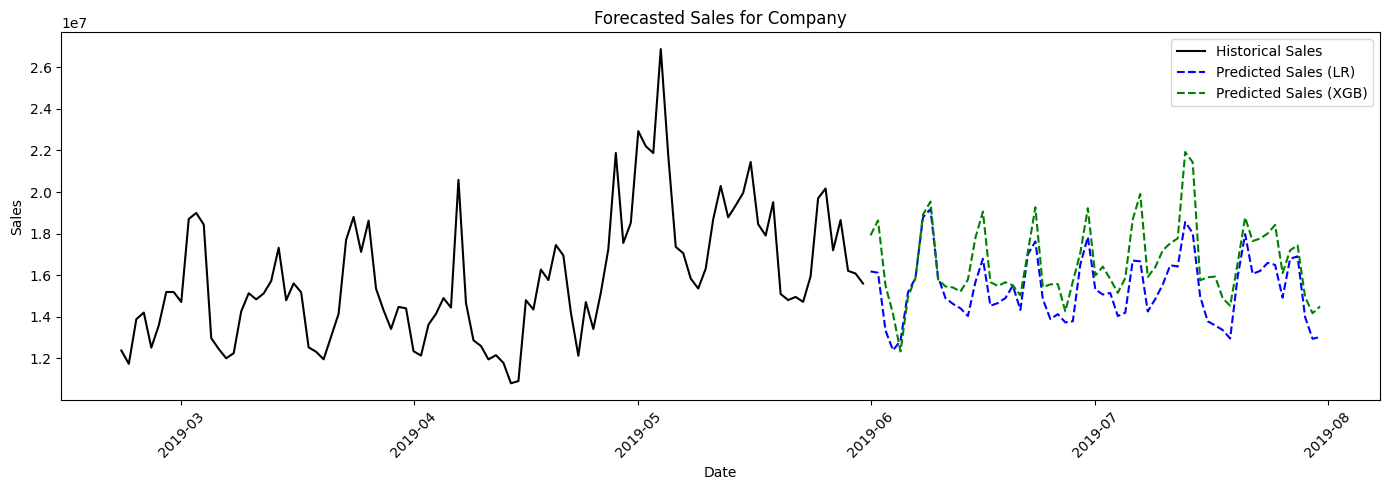

In [88]:
lr_predictions_co, xgb_predictions_co = recursive_forecast(lr_co_rec, inf_all, 'Company','Sales')

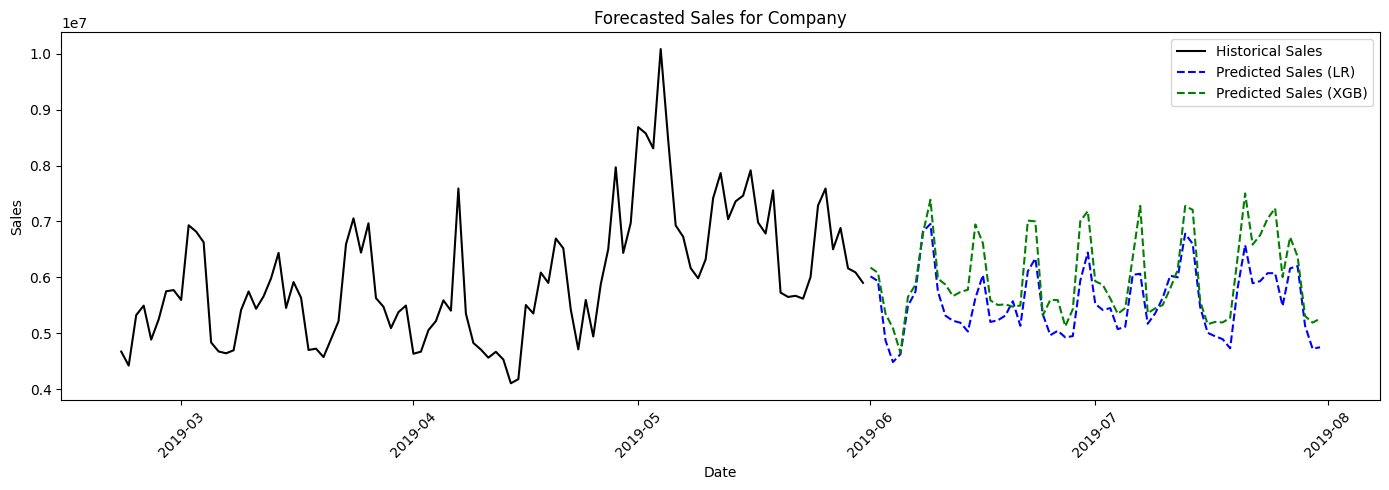

In [89]:
lr_predictions_r1, xgb_predictions_r1 = recursive_forecast(lr_r1_rec, inf_all, 'Company','Sales')

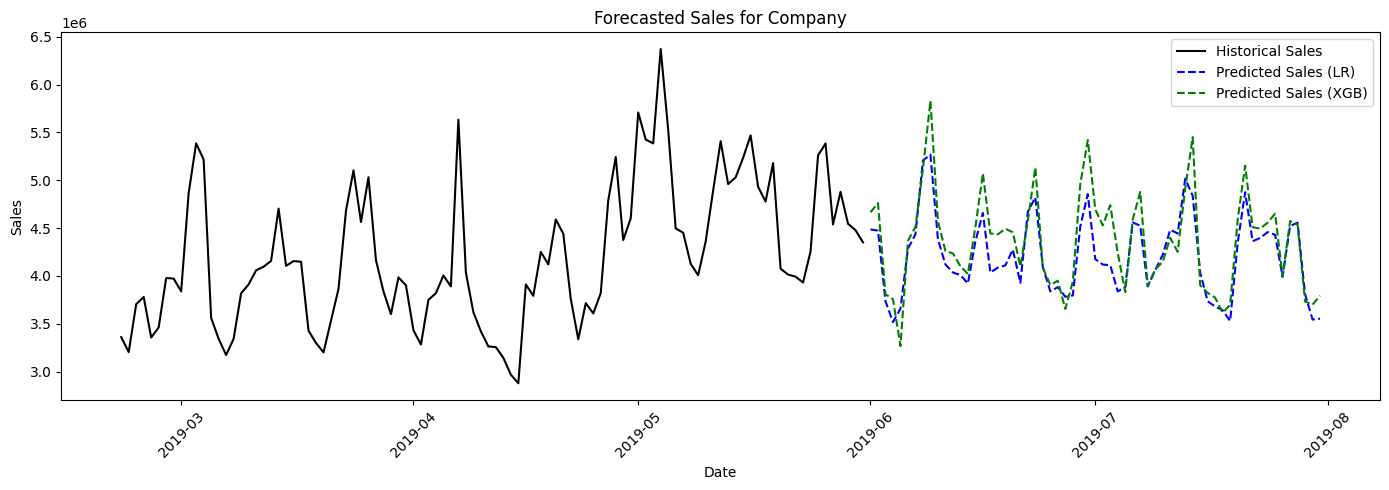

In [90]:
lr_predictions_r2, xgb_predictions_r2 = recursive_forecast(lr_r2_rec, inf_all, 'Company','Sales')

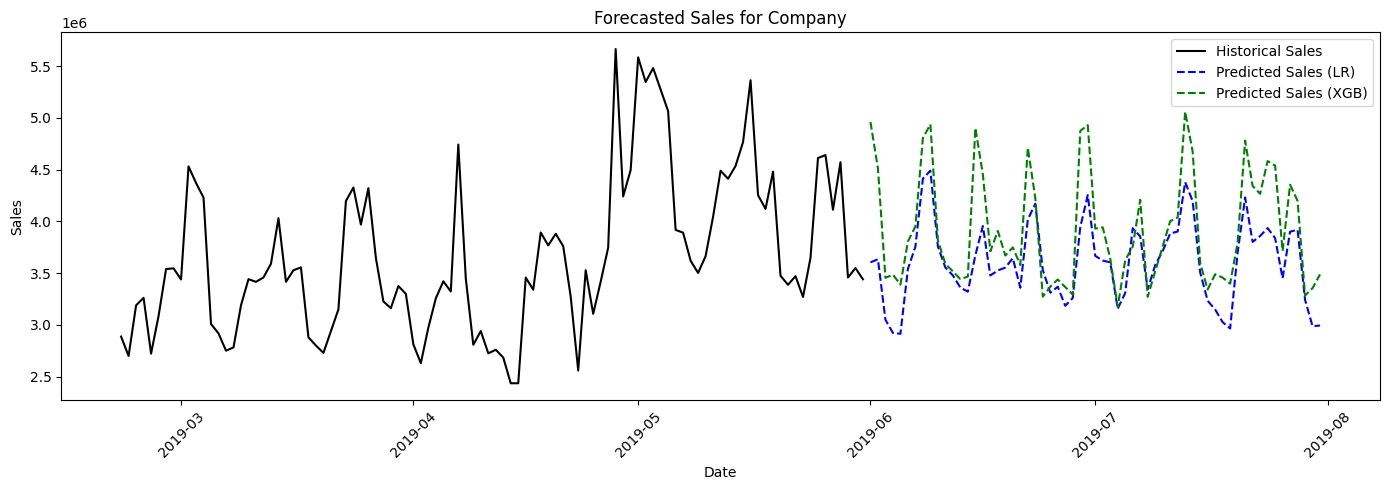

In [91]:
lr_predictions_r3, xgb_predictions_r3 = recursive_forecast(lr_r3_rec, inf_all, 'Company','Sales')

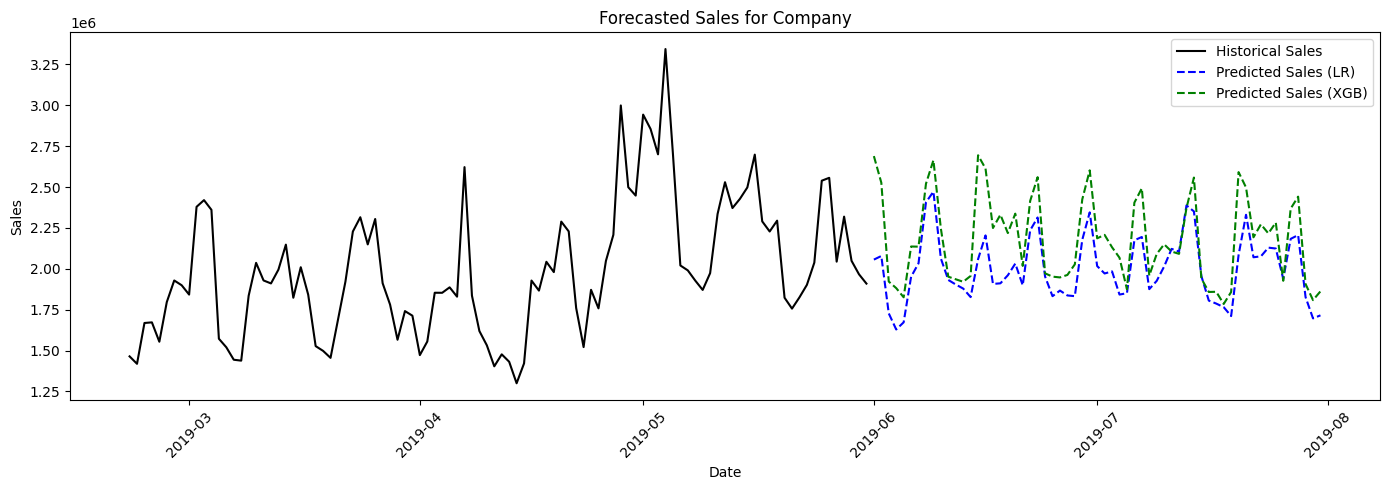

In [92]:
lr_predictions_r4, xgb_predictions_r4 = recursive_forecast(lr_r4_rec, inf_all, 'Company','Sales')

In [93]:
lr_predictions_r4.head()

Holiday  Discounted Stores  Day Count  Weekend  Month_sine  \
Date                                                                     
2019-06-01        0               0.03          0        1        0.00   
2019-06-02        0               0.03          1        1        0.00   
2019-06-03        0               0.12          2        0        0.00   
2019-06-04        0               0.12          3        0        0.00   
2019-06-05        1               0.69          4        0        0.00   

            Month_cosine  Day of Week_sine  Day of Week_cosine        Sales  
Date                                                                         
2019-06-01         -1.00             -0.97               -0.22 2,056,091.50  
2019-06-02         -1.00             -0.78                0.62 2,078,104.71  
2019-06-03         -1.00              0.00                1.00 1,727,110.98  
2019-06-04         -1.00              0.78                0.62 1,628,804.19  
2019-06-05         -1.00              0.97               -0.22 1,672,344.97



---



---



# **Time Series Methods**

In [94]:
#Importing Time Series Libraries/ Modules

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

### **Datasets**

We have grouped and aggregated time series data sets for the Company ts_co and the Region Codes: ts_r1, ts_r2, ts_r3, ts_r4

In [95]:
ts_co.head()

Holiday  Discounted Stores  Orders         Sales  Anomaly
Date                                                                 
2018-01-01        1               1.00   19666 15,345,484.50        0
2018-01-02        0               1.00   25326 19,592,415.00        0
2018-01-03        0               1.00   24047 18,652,527.00        0
2018-01-04        0               1.00   25584 19,956,267.00        0
2018-01-05        0               1.00   28436 22,902,651.00        0

In [96]:
ts_data = {'Company': ts_co, 'Region 1': ts_r1, 'Region 2': ts_r2, 'Region 3': ts_r3, 'Region 4':ts_r4}

In [97]:
# Replacing Anomalies using Linear Interpolation

for i, (name, data) in enumerate(ts_data.items()):
  data['Sales'] = data.apply(lambda row: row['Sales'] if row['Anomaly'] == 0 else None, axis = 1)
  data['Sales'] = data['Sales'].interpolate(method = 'linear', axis = 0)

In [98]:
ts_co.head()

Holiday  Discounted Stores  Orders         Sales  Anomaly
Date                                                                 
2018-01-01        1               1.00   19666 15,345,484.50        0
2018-01-02        0               1.00   25326 19,592,415.00        0
2018-01-03        0               1.00   24047 18,652,527.00        0
2018-01-04        0               1.00   25584 19,956,267.00        0
2018-01-05        0               1.00   28436 22,902,651.00        0

In [99]:
ts_co.drop(columns = ["Anomaly"], inplace = True)
ts_r1.drop(columns = ["Anomaly"], inplace = True)
ts_r2.drop(columns = ["Anomaly"], inplace = True)
ts_r3.drop(columns = ["Anomaly"], inplace = True)
ts_r4.drop(columns = ["Anomaly"], inplace = True)

## **Time Series Analysis**

### **Decomposition**

Company


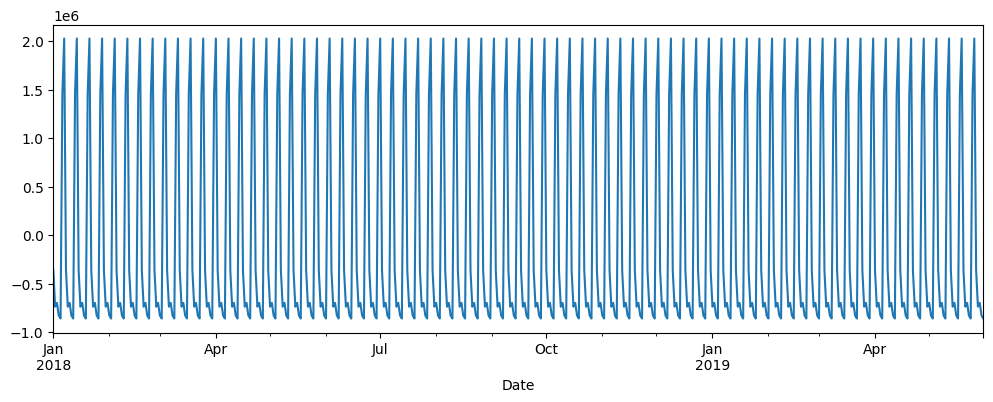


Region 1


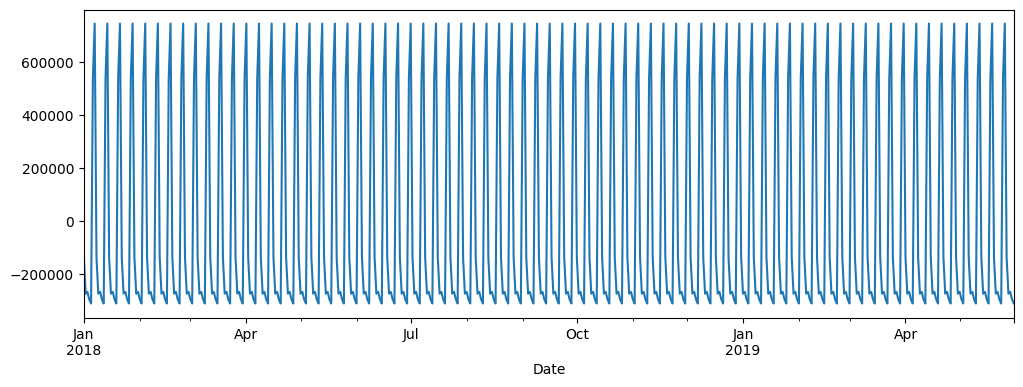


Region 2


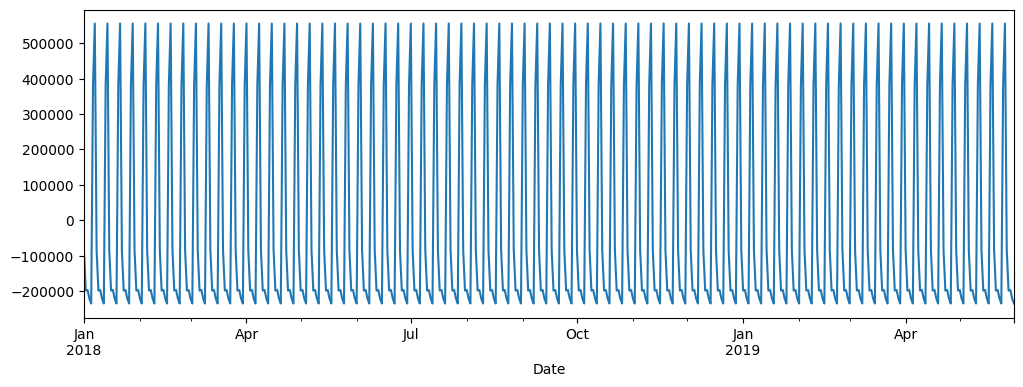


Region 3


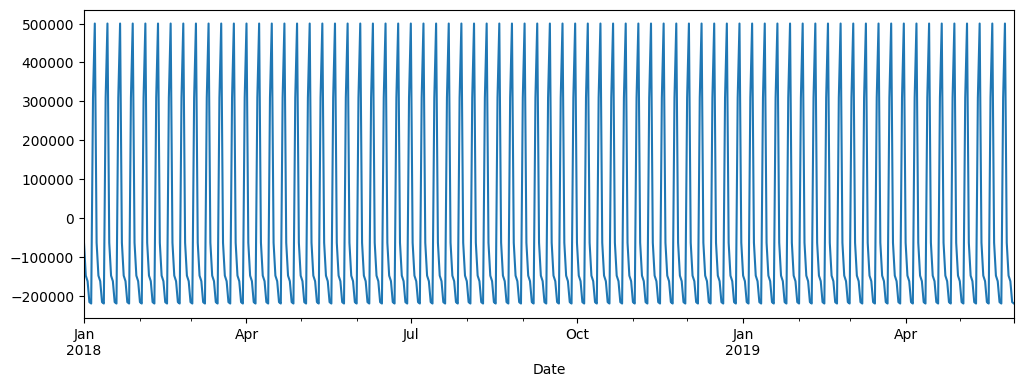


Region 4


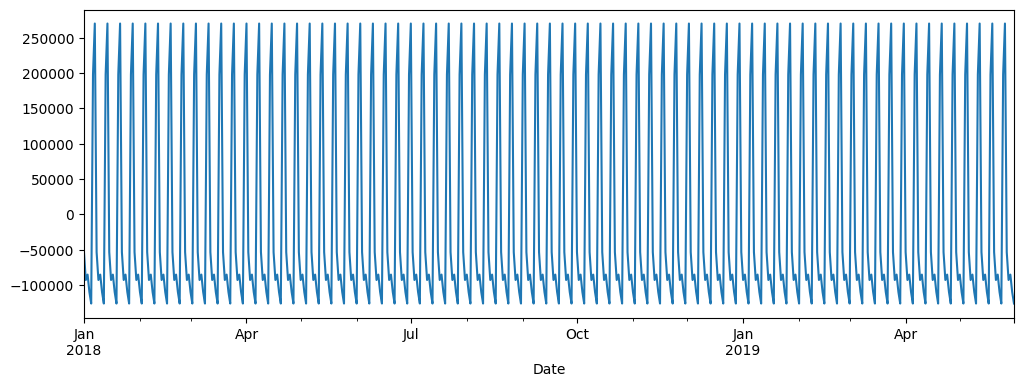

In [100]:
for name, data in ts_data.items():
  decompose = sm.tsa.seasonal_decompose(data['Sales'])
  print(name)
  plt.figure(figsize=(12, 4))

  decompose.seasonal.plot()

  plt.show()
  print()

Company


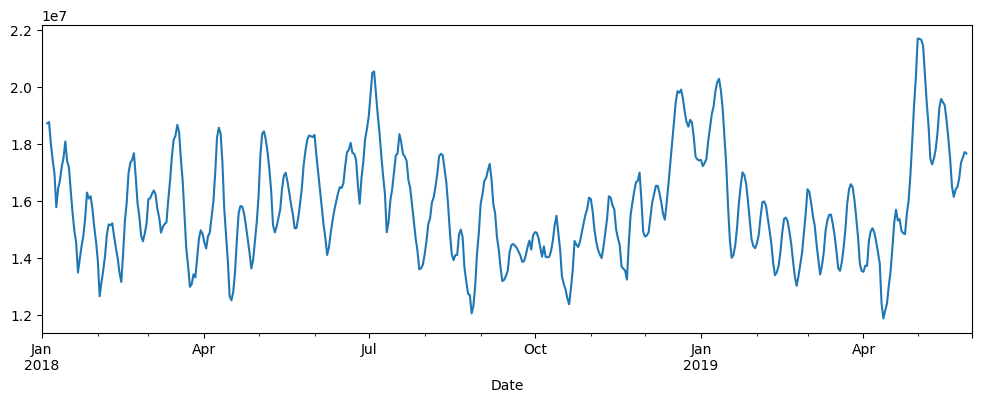


Region 1


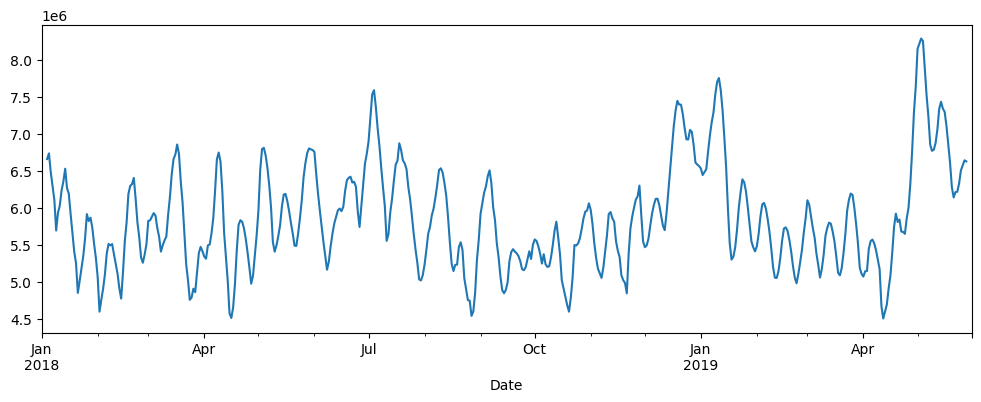


Region 2


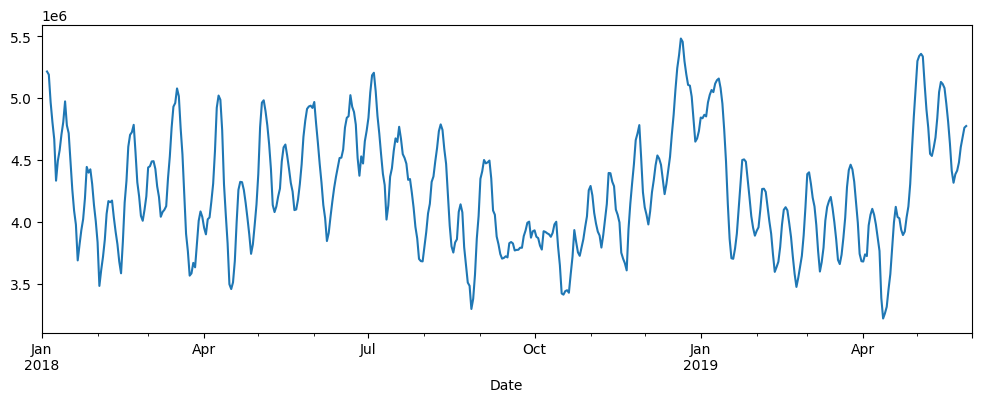


Region 3


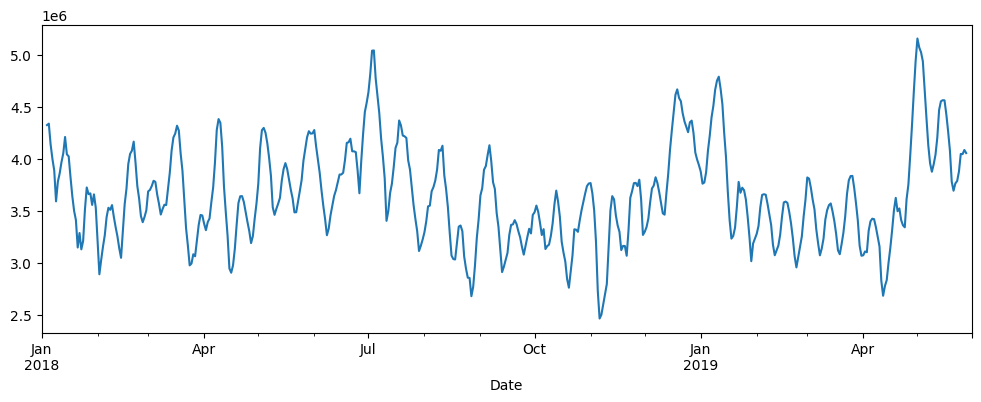


Region 4


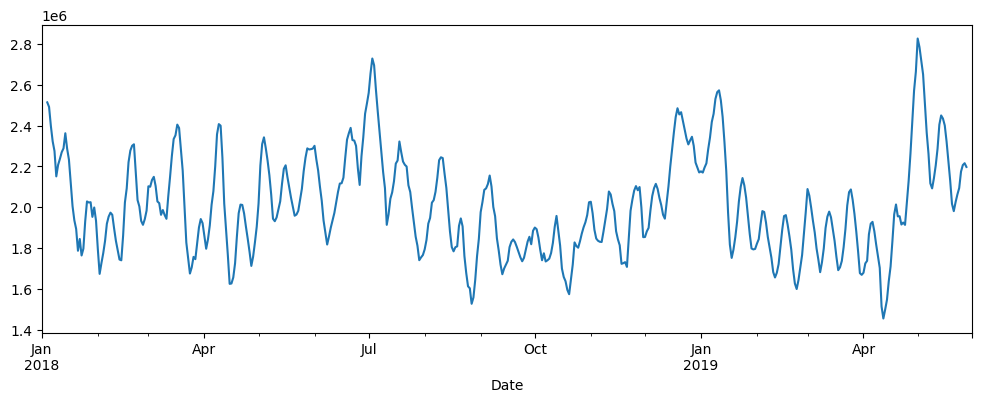

In [101]:
for name, data in ts_data.items():
  decompose = sm.tsa.seasonal_decompose(data['Sales'])
  print(name)
  plt.figure(figsize=(12, 4))

  decompose.trend.plot()

  plt.show()
  print()

Company
Kurtosis: 1.2402517809927995


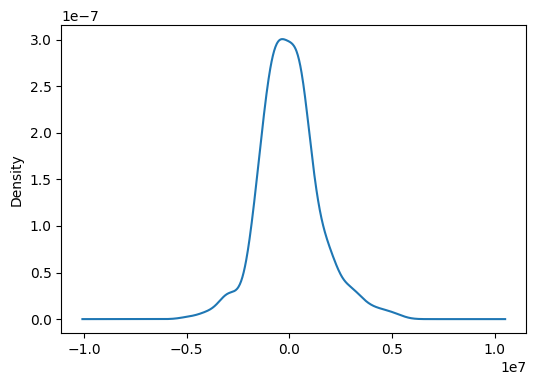


Region 1
Kurtosis: 1.3855173063097364


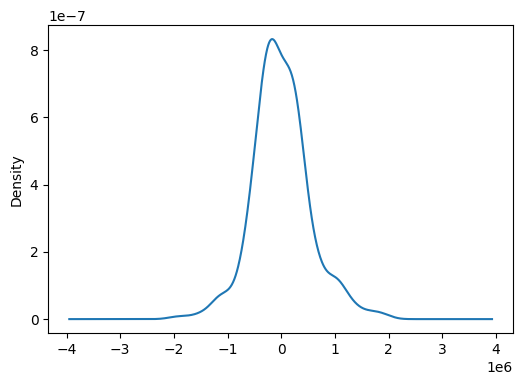


Region 2
Kurtosis: 1.4674534687252154


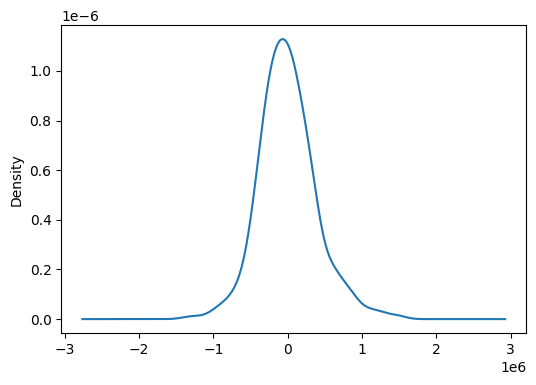


Region 3
Kurtosis: 1.3629391805409345


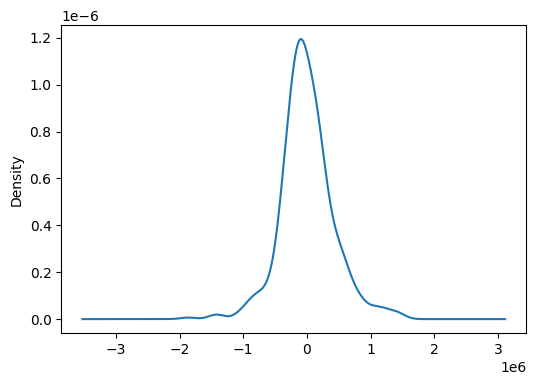


Region 4
Kurtosis: 2.2979928543589456


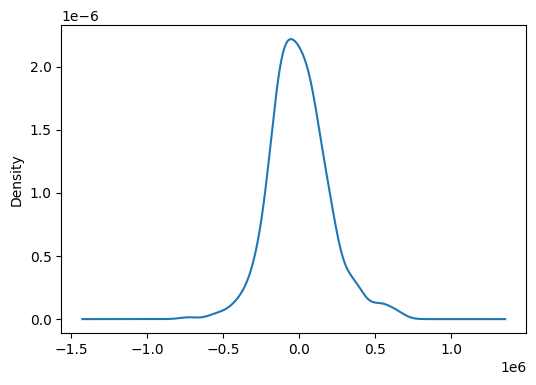

In [102]:
for name, data in ts_data.items():
  print(name)
  print("Kurtosis:",decompose.resid.kurt())

  decompose = sm.tsa.seasonal_decompose(data['Sales'])

  plt.figure(figsize=(6, 4))

  decompose.resid.plot(kind="kde")

  plt.show()
  print()

#### **Observations:**

* The seasonal decomposition plot shows weekly seasonality
* There's a sideway trend which changes with no visible upwards or downwards direction. The series most likely stationary.
* Residues show a normal distribution.

###**Checking Stationarity: Dickey-Fuller Test**

In [103]:
for name, data in ts_data.items():
   pvalue = sm.tsa.stattools.adfuller(data['Sales'])[1]
   if pvalue <= 0.05:
      print(f'pvalue = {round(pvalue,4)}. Sequence for {name} is stationary')
   else:
      print(f'pvalue = {round(pvalue,4)}. Sequence {name} is not stationary')

pvalue = 0.0172. Sequence for Company is stationary
pvalue = 0.0192. Sequence for Region 1 is stationary
pvalue = 0.0178. Sequence for Region 2 is stationary
pvalue = 0.0208. Sequence for Region 3 is stationary
pvalue = 0.0114. Sequence for Region 4 is stationary


#### **Observations:**
According to the Dickey Fuller Test, all 5 time series are stationary. i.e. the mean, variance is constant in the series.

###**ACF, PACF Analysis**

In [104]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

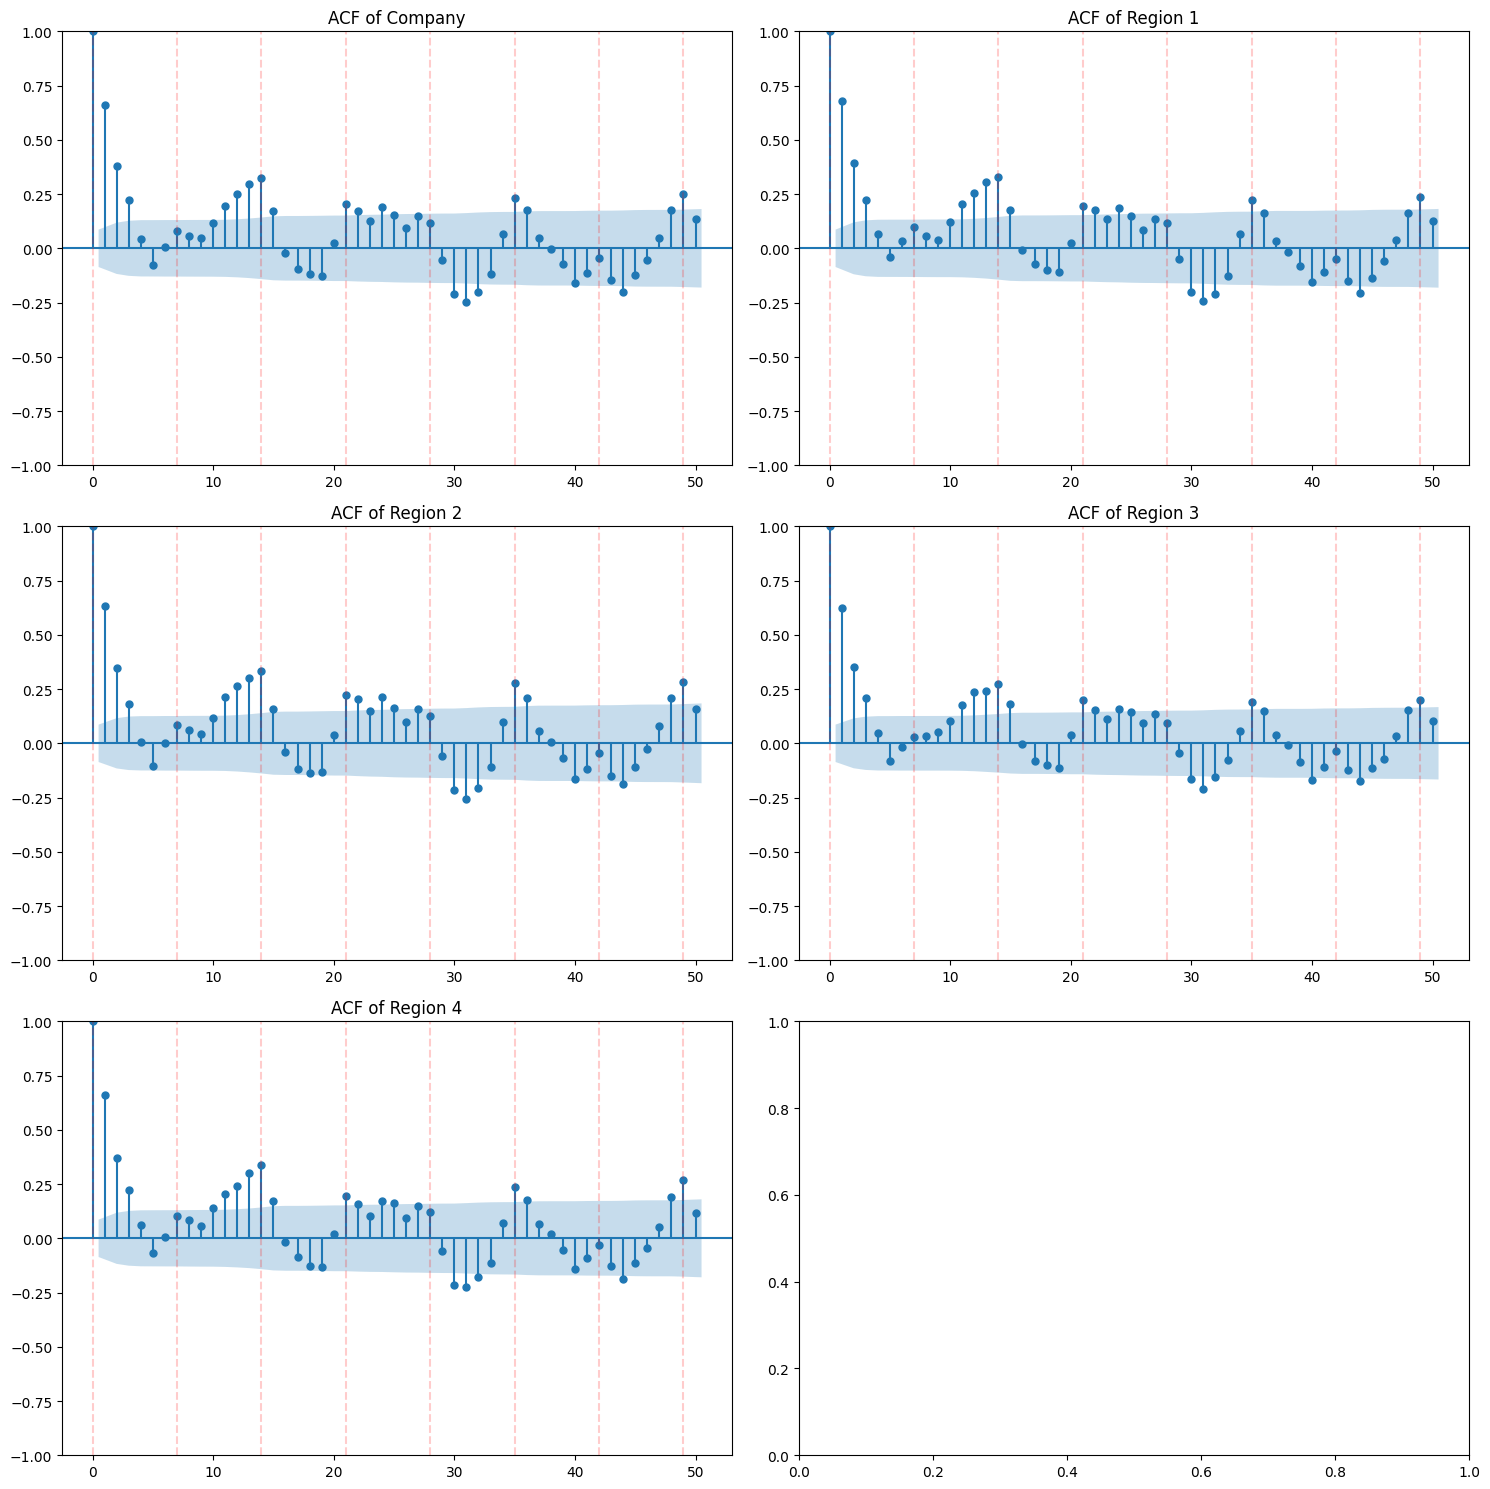

In [105]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i, (name, data) in enumerate(ts_data.items()):
  plot_acf(data['Sales'], ax=axes[i], lags=50)
  axes[i].set_title(f'ACF of {name}')
  for x_val in range(0,50,7):
        axes[i].axvline(x=x_val, color='red', linestyle='--', alpha=0.2)

plt.tight_layout()
plt.show()

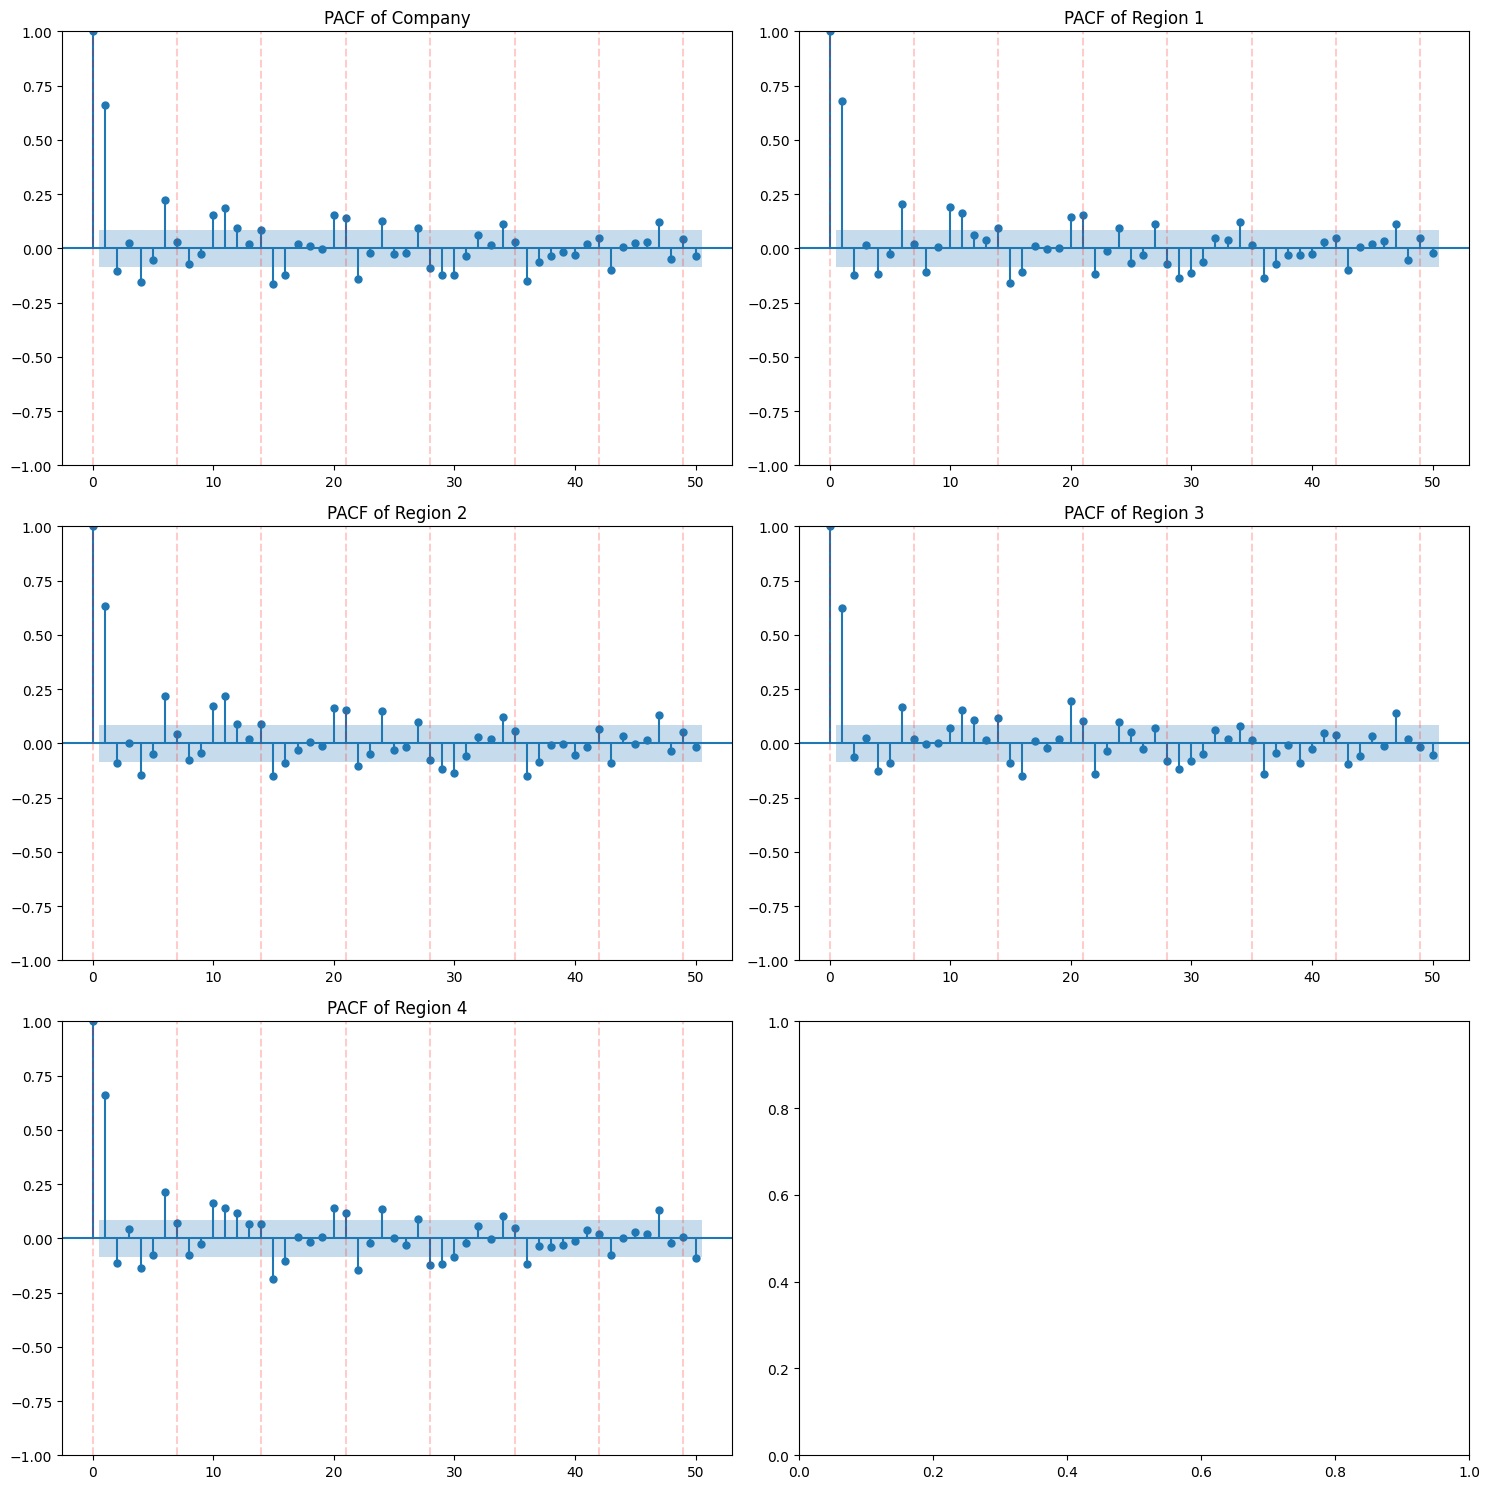

In [106]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
for i, (name, data) in enumerate(ts_data.items()):
    plot_pacf(data['Sales'], ax=axes[i], lags=50)
    axes[i].set_title(f'PACF of {name}')
    for x_val in range(0,50,7):
        axes[i].axvline(x=x_val, color='red', linestyle='--', alpha=0.2)
plt.tight_layout()
plt.show()

#Observation:
* The PACF plots show the corelation is significant at lag 1 after which it drops sharply to below significance level or in some cases just above. We can take Auto Regression (p) = 1 or 2
* The ACF plots shows the corelation drop sharply below significant levels after the first 3 lags. We can take the Moving Average (q) = 3.

In [107]:
ts_co.head()

Holiday  Discounted Stores  Orders         Sales
Date                                                        
2018-01-01        1               1.00   19666 15,345,484.50
2018-01-02        0               1.00   25326 19,592,415.00
2018-01-03        0               1.00   24047 18,652,527.00
2018-01-04        0               1.00   25584 19,956,267.00
2018-01-05        0               1.00   28436 22,902,651.00

## **ARIMA Forecasting**

In [108]:
# The arima_forecast function will
# Split the data into train & test
# Use grid search to find the best p,d,q combination that will result in best MAPE
# Use ARIMA modeling with best p,d,q params to forecast(predict) the values of the test data
# Plot the comparison between actual test data and forecasted values
# Use ARIMA modeling on the entire series to forecast m steps in the future
# Plot the series and prediction

from itertools import product


def arima_forecast(ts_data, test_size, m_steps):
    warnings.filterwarnings("ignore")

    ts_data.index.freq = 'D'

    # Step 1: Train-test split
    train_data = ts_data[:-test_size]
    test_data = ts_data[-test_size:]

    # Step 2: Grid Search for ARIMA
    arima_order_grid = list(product(range(4), range(2), range(4)))
    arima_best_mape = np.inf
    arima_best_order = None
    arima_forecast = None

    for p, d, q in arima_order_grid:
        try:
            #print(f"Trying ARIMA({p}, {d}, {q})") # for debugging
            test_model = ARIMA(train_data, order=(p, d, q))
            model_fit = test_model.fit()
            forecast = model_fit.forecast(steps=m_steps)

            mape_score = mape(test_data[:m_steps], forecast)

            if mape_score < arima_best_mape:
                arima_best_mape = mape_score
                arima_best_order = (p, d, q)
                arima_forecast = forecast
                test_forecast = forecast  #for test vs pred plot

        except Exception:
            continue

    if arima_forecast is None:
        print("ARIMA returned None.")
        return

    print(f"\n Best ARIMA parameters: {arima_best_order}")
    print(f"Best MAPE on test split: {arima_best_mape:.4f}\n")

    # Step 3: Train on full dataset
    model = ARIMA(ts_data, order=arima_best_order)
    pred_model = model.fit()
    final_forecast = pred_model.forecast(steps=m_steps)

    # Step 4: Plot Test Prediction vs Actual
    plt.figure(figsize=(10, 4))
    plt.plot(test_data.index[:m_steps], test_data[:m_steps], label='Actual Test Data')
    plt.plot(test_data.index[:m_steps], test_forecast, label='Test Prediction)', linestyle='--')
    plt.title('ARIMA Forecast vs Actual on Test Set')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 5: Plot Full Forecast from Entire Dataset
    plt.figure(figsize=(10, 4))
    plt.plot(ts_data.index[-100:], ts_data[-100:], label='Last 100 Data Points')
    future_index = pd.date_range(ts_data.index[-1], periods=m_steps + 1, freq='D')[1:]
    plt.plot(future_index, final_forecast, label='Forecast from Full Data', linestyle='--')
    plt.title('ARIMA Forecast for the Next m Steps')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return final_forecast


## **Sales Forecasts Using ARIMA**


 Best ARIMA parameters: (3, 0, 2)
Best MAPE on test split: 0.1436



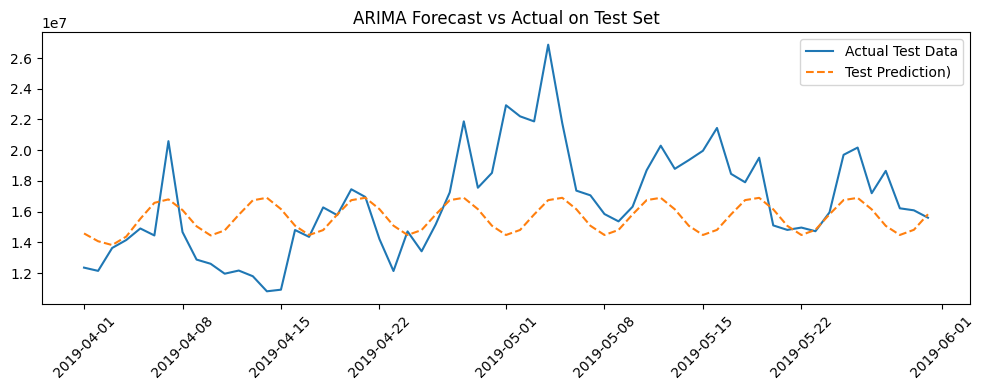

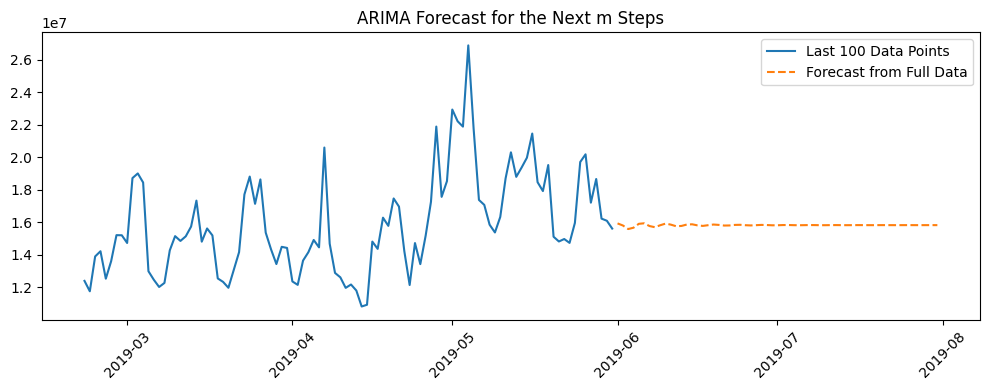

2019-06-01   15,919,692.65
2019-06-02   15,792,432.53
2019-06-03   15,572,259.83
2019-06-04   15,655,455.10
2019-06-05   15,894,352.89
                  ...     
2019-07-27   15,812,590.22
2019-07-28   15,812,512.80
2019-07-29   15,813,261.80
2019-07-30   15,813,567.09
2019-07-31   15,813,058.83
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [109]:
arima_forecast(ts_co['Sales'], 61, 61)


 Best ARIMA parameters: (3, 1, 3)
Best MAPE on test split: 0.1590



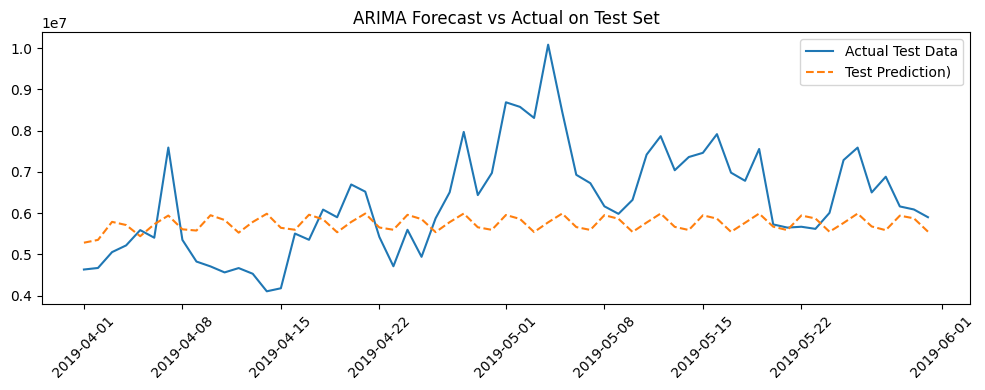

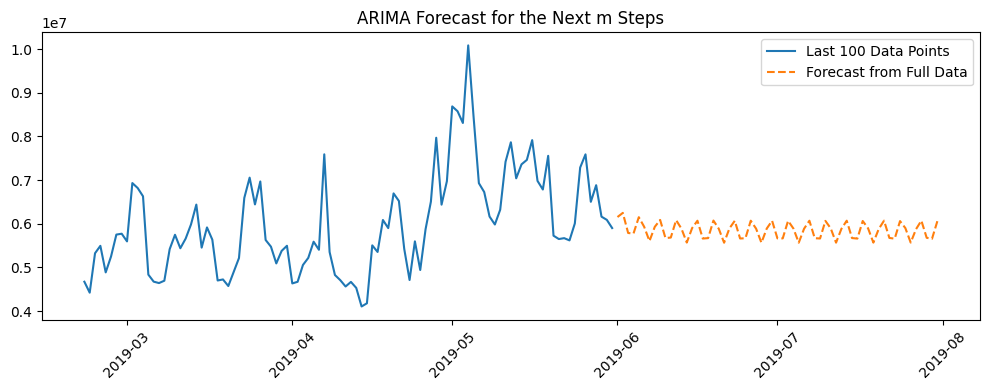

2019-06-01   6,153,422.88
2019-06-02   6,248,103.31
2019-06-03   5,788,013.46
2019-06-04   5,773,980.20
2019-06-05   6,149,603.13
                 ...     
2019-07-27   5,874,805.09
2019-07-28   6,070,934.06
2019-07-29   5,677,851.52
2019-07-30   5,655,281.55
2019-07-31   6,058,011.54
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [110]:
arima_forecast(ts_r1['Sales'], 61, 61)


 Best ARIMA parameters: (3, 1, 3)
Best MAPE on test split: 0.1426



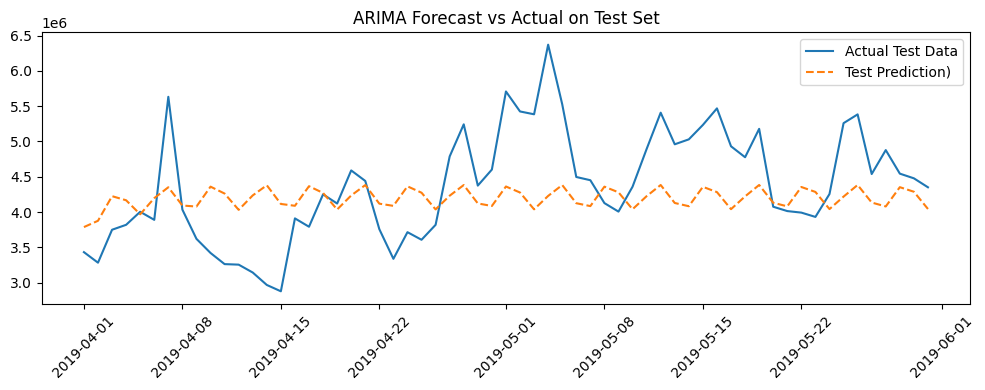

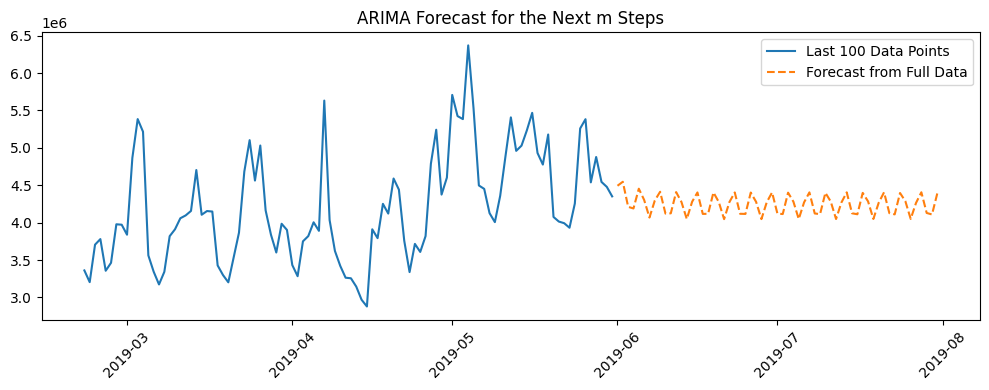

2019-06-01   4,493,318.99
2019-06-02   4,546,478.16
2019-06-03   4,211,615.58
2019-06-04   4,189,736.28
2019-06-05   4,453,844.71
                 ...     
2019-07-27   4,263,908.82
2019-07-28   4,406,230.36
2019-07-29   4,129,509.42
2019-07-30   4,109,431.52
2019-07-31   4,394,806.18
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [111]:
arima_forecast(ts_r2['Sales'], 61, 61)


 Best ARIMA parameters: (3, 0, 2)
Best MAPE on test split: 0.1578



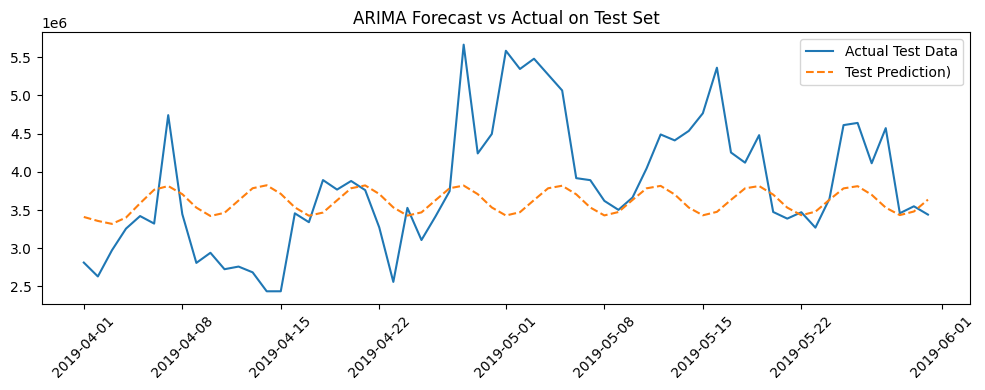

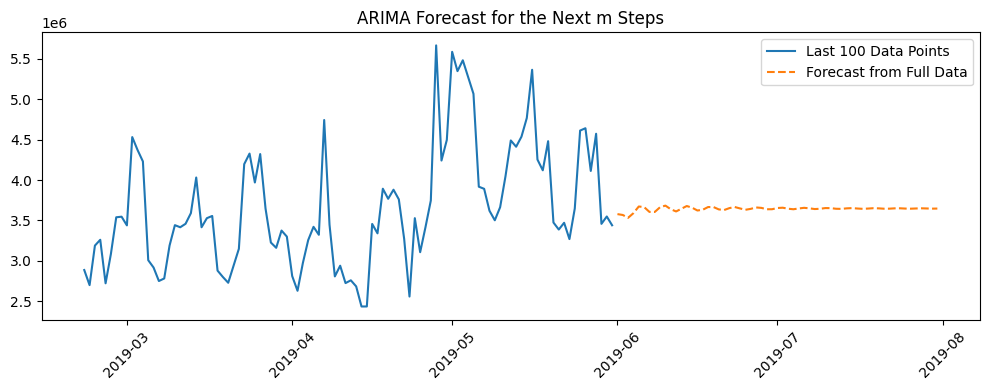

2019-06-01   3,578,617.35
2019-06-02   3,567,895.47
2019-06-03   3,532,776.23
2019-06-04   3,590,250.93
2019-06-05   3,672,523.06
                 ...     
2019-07-27   3,648,321.99
2019-07-28   3,650,277.91
2019-07-29   3,648,432.40
2019-07-30   3,646,219.25
2019-07-31   3,647,278.27
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [112]:
arima_forecast(ts_r3['Sales'], 61, 61)


 Best ARIMA parameters: (1, 1, 1)
Best MAPE on test split: 0.1585



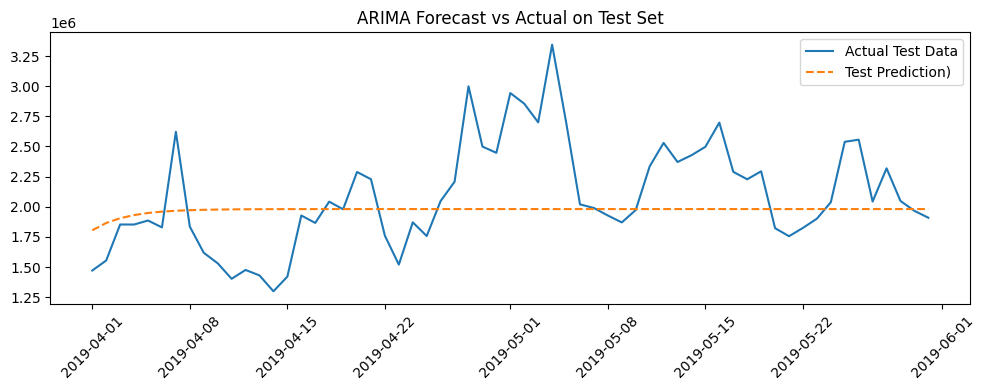

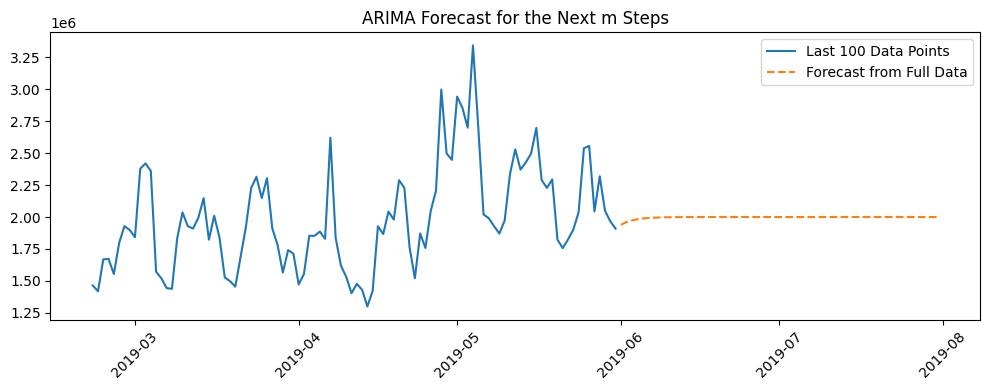

2019-06-01   1,939,226.94
2019-06-02   1,959,284.13
2019-06-03   1,972,735.12
2019-06-04   1,981,755.78
2019-06-05   1,987,805.32
                 ...     
2019-07-27   2,000,122.88
2019-07-28   2,000,122.88
2019-07-29   2,000,122.88
2019-07-30   2,000,122.88
2019-07-31   2,000,122.88
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [113]:
arima_forecast(ts_r4['Sales'], 61, 61)

###**ARIMA Prediction Results**

 * The ARIMA model was used to predict 61 datapoints from the test set to identify the best AR(p), Diffencing (d) and MA(q) values using which the model forecasted 61 datapoints to match the duration of the inference period defined in the test dataset given i.e. from 2019-06-01 to 2019-07-31.

 * The model identified different best p,d,q order for the Company dataset (ts_co) and Regional datasets (ts_r1, ts_r2, ts_r3, ts_r4) for regions R1, R2, R3, R4.

 * The ARIMA forecasts achieved good MAPE for the various datasets in the range of 14.26% (For Regions R2) to 15.90% (For Region R1).

 * Company:
  * Best order: (3, 0, 2)
  * Best Test MAPE: 14.36%

*  Region 1 (R1):
  * Best order: (3, 1, 3)
  * Best Test MAPE: 15.90%

*  Region 2 (R2):
  * Best order: (3, 1, 3)
  * Best Test MAPE: 14.26%

*  Region 3 (R3):
  * Best order: (3, 0, 2)
  * Best Test MAPE: 15.78%

*  Region 4 (R4):
  * Best order: (1, 1, 1)
  * Best Test MAPE: 15.85%

# **SARIMAX Forecasting**

In [114]:
# The sarimax_forecast function will..
  # Split the data into train & test
  # Use grid search to find the best p,d,q and P,D,Q combination that will result in best MAPE
  # Use SARIMAX modeling with best p,d,q and P,D,Q params to forecast(predict) the values of the test data
  # Plot the comparison between actual test data and forecasted values
  # Use SARIMAX modeling on the entire series to forecast m steps in the future
  # Plot the series and forecast
# Arguments:
  # ts_dat : Dataset for Training and Test
  # test_size : Size of test data
  # m_steps : No. of future dates/ datapoints to forecast
  # exog : exog variables for Training & Test dataset
  # exog_pred : exog variables for prediction period
# Max prediction period limit: 61 days


from itertools import product


def sarimax_forecast(ts_data, test_size, m_steps, exog, exog_pred):
    warnings.filterwarnings("ignore")

    ts_data.index.freq = 'D'
    exog.index.freq = 'D'
    exog_pred.index.freq = 'D'

    # Step 1: Train-test split
    train_data = ts_data[:-test_size]
    test_data = ts_data[-test_size:]
    exog_train = exog[:-test_size]
    exog_test = exog[-test_size:]

    exog_pred = exog_pred[:m_steps]

    # Step 2: Grid Search for SARIMAX
    sarimax_order = list(product(range(3), range(2), range(3)))
    sarimax_seasonal_order = list(product(range(3), range(2), range(3)))
    sarimax_best_mape = np.inf
    sarimax_best_pdq = None
    sarimax_best_PDQ = None
    sarimax_test_forecast = None
    seasons = [7]

    for p,d,q in sarimax_order:
      for P,D, Q in sarimax_seasonal_order:
        for s in seasons:
          try:
            model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, s), exog=exog_train)
            model_fit = model.fit(disp=False, maxiter=200)
            test_forecast = model_fit.forecast(steps=m_steps, exog=exog_test)

            mape_score = mape(test_data[:m_steps], test_forecast)

            if mape_score < sarimax_best_mape:
              sarimax_best_mape = mape_score
              sarimax_best_pdq = (p, d, q)
              sarimax_best_PDQ = (P, D, Q)
              sarimax_test_forecast = test_forecast
              print(f"Best MAPE on test split updated to: {sarimax_best_mape:.4f}\n")


          except Exception as e:
            print(f"SARIMAX model failed with parameters: order=({p}, {d}, {q}), seasonal_order=({P}, {D}, {Q}, {s})")
            print(f"Error: {e}")
          continue

    if sarimax_test_forecast is None:
        print("SARIMAX returned None.")
        return

    print(f"\nBest p,d,q parameters: {sarimax_best_pdq}")
    print(f"Best P,D,Q parameters: {sarimax_best_PDQ}")
    print(f"Best MAPE on test split: {sarimax_best_mape:.4f}\n")

    # Step 3: Train on full dataset
    model = SARIMAX(ts_data, order=sarimax_best_pdq, seasonal_order=(*sarimax_best_PDQ, s), exog=exog)
    pred_model = model.fit()
    sarimax_forecast = pred_model.forecast(steps=m_steps, exog=exog_pred)

    # Step 4: Plot Test Prediction vs Actual
    plt.figure(figsize=(10, 4))
    plt.plot(test_data.index[:m_steps], test_data[:m_steps], label='Actual Test Data')
    plt.plot(test_data.index[:m_steps], sarimax_test_forecast, label='Test Prediction)', linestyle='--')
    plt.title('SARIMAX Forecast vs Actual on Test Set')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Step 5: Plot Full Forecast from Entire Dataset
    plt.figure(figsize=(10, 4))
    plt.plot(ts_data.index[-100:], ts_data[-100:], label='Last 100 Data Points')
    future_index = pd.date_range(ts_data.index[-1], periods=m_steps + 1, freq='D')[1:]
    plt.plot(future_index, sarimax_forecast, label='Forecast from Full Data', linestyle='--')
    plt.title('SARIMAX Forecast for the Next m Steps')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return sarimax_forecast

In [115]:
# Function inference_exog_processor will be used to tranform and process the inference dataset...
#...and return datframes with exog variable for Company and Regions : R1, R2, R3, R4, for the inference period

def inference_exog_processor(data):

    # Step 1: Convert 'Date' to datetime and add 'Discounted_Flag'
    data['Date'] = pd.to_datetime(data['Date'])
    data['Discounted_Flag'] = data['Discount'].apply(lambda x: 1 if x == 'Yes' else 0)

    # Step 2: function to process each group
    def process_group(group_df):
        group_df = group_df.groupby('Date').agg({
            'Holiday': 'last',
            'Discounted_Flag': lambda x: x.sum() / x.count()
        }).rename(columns={'Discounted_Flag': 'Discounted Stores'})

        return group_df

    # Step 3: Creating datasets
    exog_all = process_group(data)
    exog_r1 = process_group(data[data['Region_Code'] == 'R1'])
    exog_r2 = process_group(data[data['Region_Code'] == 'R2'])
    exog_r3 = process_group(data[data['Region_Code'] == 'R3'])
    exog_r4 = process_group(data[data['Region_Code'] == 'R4'])

    return exog_all, exog_r1, exog_r2, exog_r3, exog_r4



In [116]:
# Extracting exogenous datasets from inference dataset
exog_all, exog_r1, exog_r2, exog_r3, exog_r4 = inference_exog_processor(df_test)

Best MAPE on test split updated to: 0.5273

Best MAPE on test split updated to: 0.4921

Best MAPE on test split updated to: 0.1409

Best MAPE on test split updated to: 0.1393

Best MAPE on test split updated to: 0.1384

Best MAPE on test split updated to: 0.1361

Best MAPE on test split updated to: 0.1356

Best MAPE on test split updated to: 0.1348

Best MAPE on test split updated to: 0.1169

Best MAPE on test split updated to: 0.1156

Best MAPE on test split updated to: 0.1147


Best p,d,q parameters: (2, 1, 1)
Best P,D,Q parameters: (2, 1, 0)
Best MAPE on test split: 0.1147



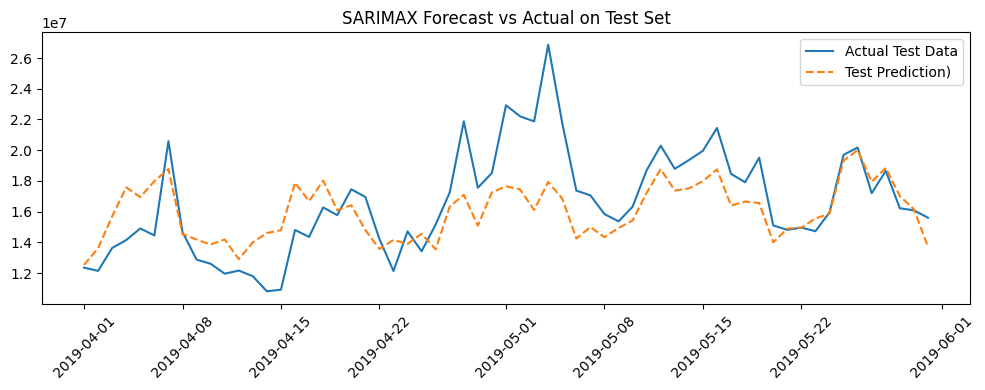

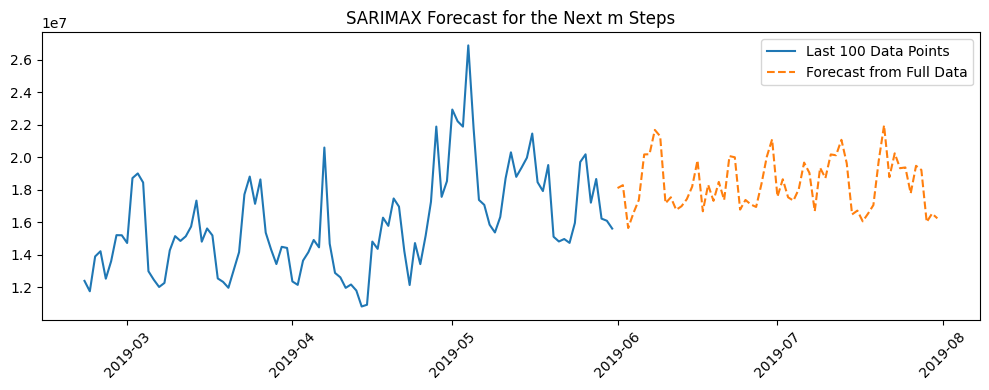

2019-06-01   18,093,252.75
2019-06-02   18,270,592.60
2019-06-03   15,635,518.12
2019-06-04   16,567,962.64
2019-06-05   17,367,053.12
                  ...     
2019-07-27   19,461,775.01
2019-07-28   19,209,468.72
2019-07-29   16,004,475.36
2019-07-30   16,521,795.52
2019-07-31   16,232,325.20
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [ ]:
sarimax_forecast(ts_co['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_all[['Holiday', 'Discounted Stores']])

Best MAPE on test split updated to: 0.5323

Best MAPE on test split updated to: 0.4962

Best MAPE on test split updated to: 0.1468

Best MAPE on test split updated to: 0.1458

Best MAPE on test split updated to: 0.1449

Best MAPE on test split updated to: 0.1433

Best MAPE on test split updated to: 0.1425

Best MAPE on test split updated to: 0.1420

Best MAPE on test split updated to: 0.1385

Best MAPE on test split updated to: 0.1226

Best MAPE on test split updated to: 0.1197


Best p,d,q parameters: (2, 1, 1)
Best P,D,Q parameters: (2, 1, 0)
Best MAPE on test split: 0.1197



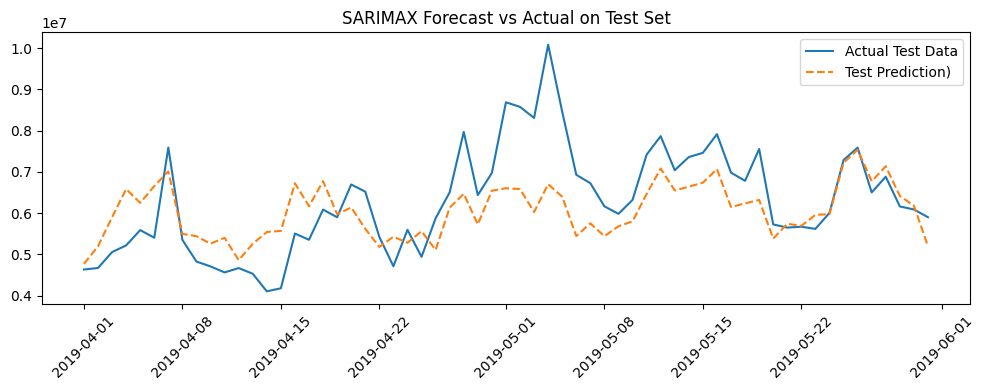

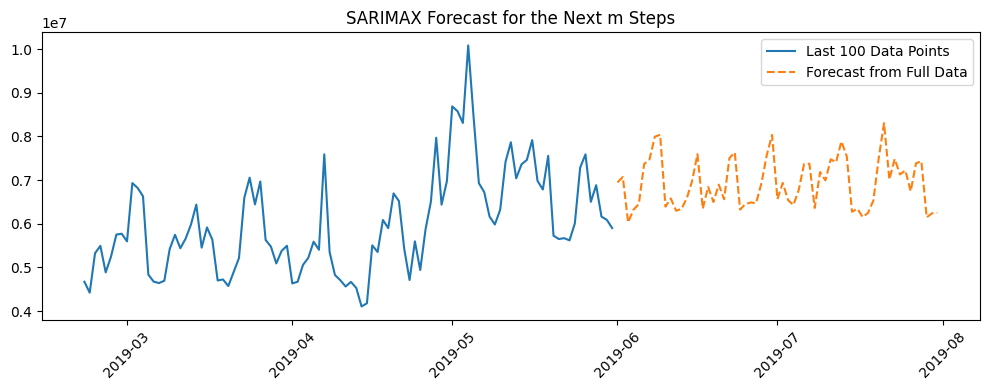

2019-06-01   6,946,683.31
2019-06-02   7,070,248.35
2019-06-03   6,030,233.72
2019-06-04   6,321,229.03
2019-06-05   6,449,083.34
                 ...     
2019-07-27   7,384,220.38
2019-07-28   7,432,108.92
2019-07-29   6,146,324.05
2019-07-30   6,239,095.44
2019-07-31   6,252,180.70
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [ ]:
sarimax_forecast(ts_r1['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r1[['Holiday', 'Discounted Stores']])

Best MAPE on test split updated to: 0.5218

Best MAPE on test split updated to: 0.4872

Best MAPE on test split updated to: 0.1269

Best MAPE on test split updated to: 0.1248

Best MAPE on test split updated to: 0.1245

Best MAPE on test split updated to: 0.1190

Best MAPE on test split updated to: 0.1163

Best MAPE on test split updated to: 0.1163

Best MAPE on test split updated to: 0.1162

Best MAPE on test split updated to: 0.1154

Best MAPE on test split updated to: 0.1153

Best MAPE on test split updated to: 0.1147

Best MAPE on test split updated to: 0.1036

Best MAPE on test split updated to: 0.0988


Best p,d,q parameters: (0, 1, 2)
Best P,D,Q parameters: (2, 1, 0)
Best MAPE on test split: 0.0988



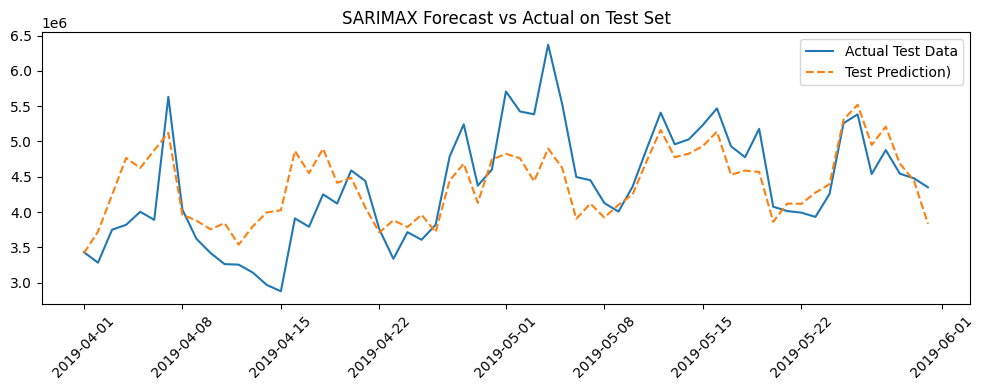

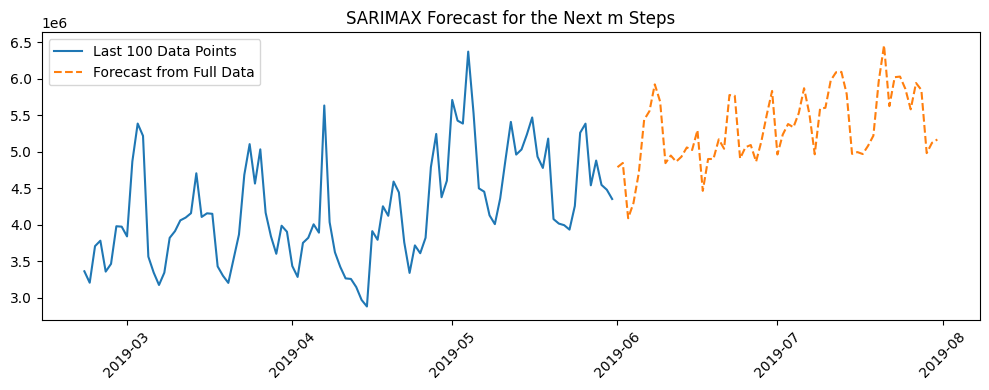

2019-06-01   4,787,346.01
2019-06-02   4,845,028.96
2019-06-03   4,087,761.67
2019-06-04   4,296,346.21
2019-06-05   4,710,589.97
                 ...     
2019-07-27   5,940,020.75
2019-07-28   5,845,808.11
2019-07-29   4,979,602.36
2019-07-30   5,121,882.44
2019-07-31   5,166,479.63
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [ ]:
sarimax_forecast(ts_r2['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r2[['Holiday', 'Discounted Stores']])

Best MAPE on test split updated to: 0.5246

Best MAPE on test split updated to: 0.4898

Best MAPE on test split updated to: 0.1448

Best MAPE on test split updated to: 0.1433

Best MAPE on test split updated to: 0.1409

Best MAPE on test split updated to: 0.1392

Best MAPE on test split updated to: 0.1389

Best MAPE on test split updated to: 0.1389

Best MAPE on test split updated to: 0.1388

Best MAPE on test split updated to: 0.1383

Best MAPE on test split updated to: 0.1382

Best MAPE on test split updated to: 0.1382

Best MAPE on test split updated to: 0.1348

Best MAPE on test split updated to: 0.1338

Best MAPE on test split updated to: 0.1279

Best MAPE on test split updated to: 0.1190


Best p,d,q parameters: (0, 1, 1)
Best P,D,Q parameters: (2, 1, 0)
Best MAPE on test split: 0.1190



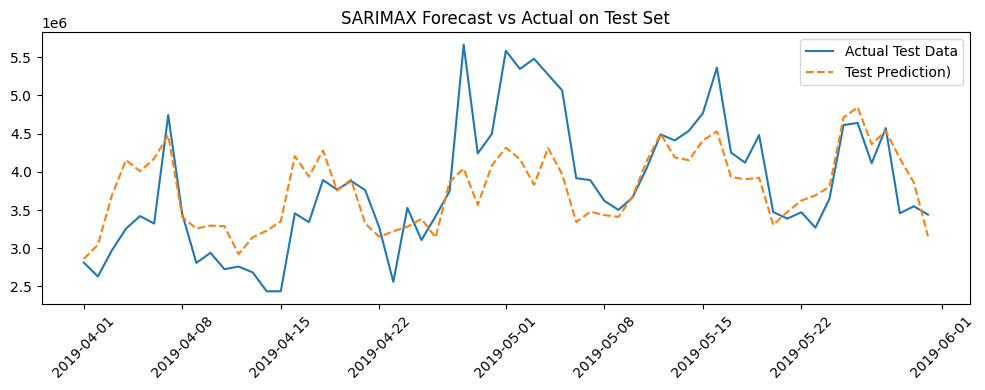

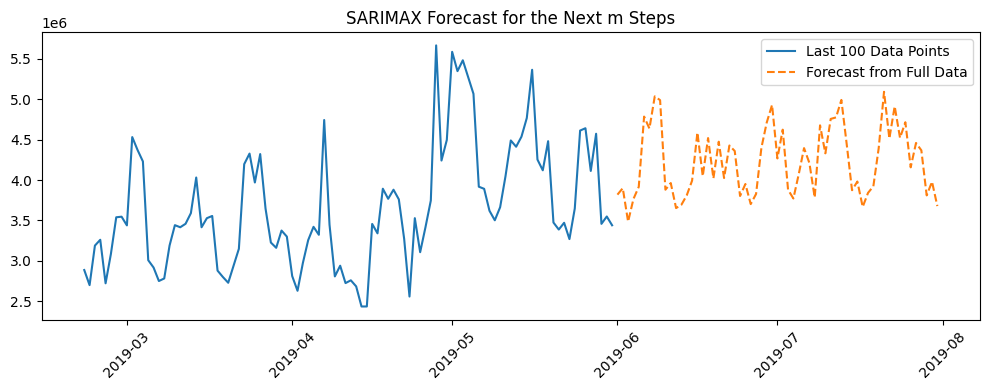

2019-06-01   3,819,240.92
2019-06-02   3,899,342.59
2019-06-03   3,485,151.82
2019-06-04   3,765,200.04
2019-06-05   3,916,036.95
                 ...     
2019-07-27   4,458,784.18
2019-07-28   4,367,319.03
2019-07-29   3,809,993.46
2019-07-30   3,979,117.96
2019-07-31   3,677,868.36
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [ ]:
sarimax_forecast(ts_r3['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r3[['Holiday', 'Discounted Stores']])

Best MAPE on test split updated to: 0.5251

Best MAPE on test split updated to: 0.4933

Best MAPE on test split updated to: 0.1516

Best MAPE on test split updated to: 0.1466

Best MAPE on test split updated to: 0.1445

Best MAPE on test split updated to: 0.1348

Best MAPE on test split updated to: 0.1346

Best MAPE on test split updated to: 0.1346

Best MAPE on test split updated to: 0.1331

Best MAPE on test split updated to: 0.1326

Best MAPE on test split updated to: 0.1324

Best MAPE on test split updated to: 0.1321

Best MAPE on test split updated to: 0.1318

Best MAPE on test split updated to: 0.1317

Best MAPE on test split updated to: 0.1298

Best MAPE on test split updated to: 0.1296

Best MAPE on test split updated to: 0.1294

Best MAPE on test split updated to: 0.1291

Best MAPE on test split updated to: 0.1278


Best p,d,q parameters: (2, 1, 2)
Best P,D,Q parameters: (1, 0, 2)
Best MAPE on test split: 0.1278



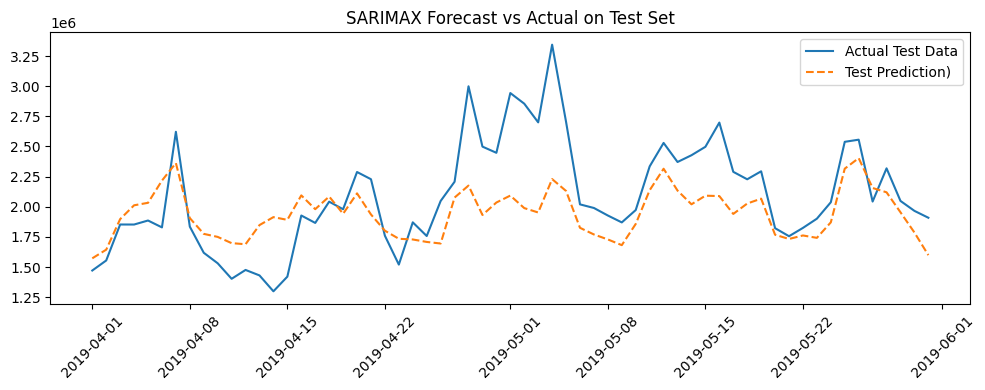

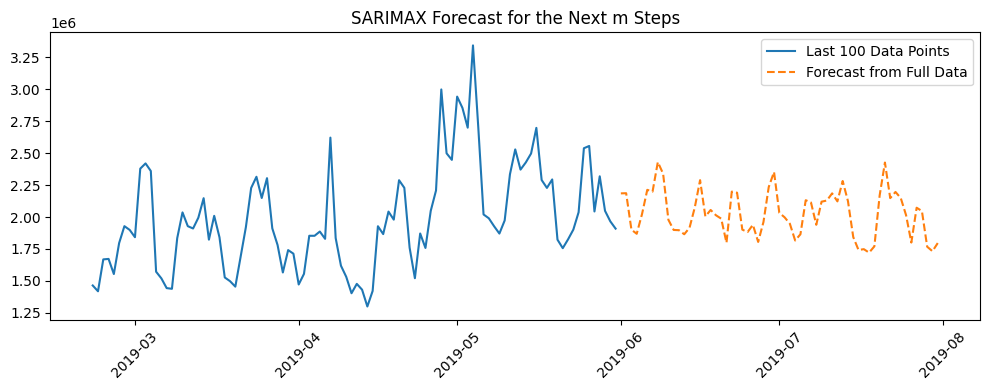

2019-06-01   2,185,256.21
2019-06-02   2,186,583.79
2019-06-03   1,901,084.83
2019-06-04   1,868,881.18
2019-06-05   2,022,038.32
                 ...     
2019-07-27   2,072,839.37
2019-07-28   2,047,400.36
2019-07-29   1,767,521.88
2019-07-30   1,732,396.84
2019-07-31   1,796,315.00
Freq: D, Name: predicted_mean, Length: 61, dtype: float64

In [ ]:
sarimax_forecast(ts_r4['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r4[['Holiday', 'Discounted Stores']])

###**SARIMAX Prediction Report**

 * The SARIMAX model was used to predict 61 datapoints from the test set to identify the best AR(p), diffencing (d) and MA(q) and Seasonal AR(P), Seasonal differencing (D) and Seasonal MA(Q) values using which the model forecasted 61 datapoints to match the duration of the inference period defined in the test dataset given i.e. from 2019-06-01 to 2019-07-31. The Seasonality was set to 7.

 * The model used the exogenous variables 'Holiday' and 'Discounted Stores'.

 *  * The model identified different best p,d,q, P,D, Q order for the Company dataset (ts_co) and Regional datasets (ts_r1, ts_r2, ts_r3, ts_r4) for regions R1, R2, R3, R4.

 * SARIMAX achieved good test MAPE for the various datasets in the range of 9.88% (For Regions R2) to 12.78% (For Region R4).

 * Company:
  * Best Test MAPE: 11.47%

*  Region 1 (R1):
  * Best Test MAPE: 11.97%

*  Region 2 (R2):
  * Best Test MAPE: 9.88%

*  Region 3 (R3):
  * Best Test MAPE: 11.90%

*  Region 4 (R4):
  * Best Test MAPE: 12.78%

#**Forecasting with Facebook Prophet**

In [109]:
!pip install prophet
from prophet import Prophet

In [152]:

import logging
logging.getLogger('prophet').setLevel(logging.WARNING)
logging.getLogger('cmdstanpy').disabled = True

def prophet_forecast(ts_data, test_size, m_steps, exog, exog_pred):
    warnings.filterwarnings("ignore")

    # Creating dataframe for Prophet
    df = ts_data.reset_index()
    df.columns = ['ds', 'y']
    df = pd.concat([df, exog.reset_index(drop=True)], axis=1)

    # Train test split
    train_df = df[:-test_size]
    test_df = df[-test_size:]

    # Fitting Prophet Model
    model = Prophet(yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=1.25, seasonality_mode='additive')
    model.add_regressor('Holiday')
    model.add_regressor('Discounted Stores')
    model.add_seasonality(name='monthly', period=30.5, fourier_order=10)
    #model.add_seasonality(name='14day', period=14, fourier_order=5)
    model.fit(train_df)

    # Create dataframe for test
    future_test = test_df[['ds', 'Holiday', 'Discounted Stores']]
    forecast_test = model.predict(future_test)

    # Compute MAPE
    test_mape = mape(test_df['y'], forecast_test['yhat'])
    print(f"\nProphet MAPE on test split: {test_mape:.4f}")

    # Plot Test Prediction vs Actual
    plt.figure(figsize=(10, 4))
    plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data')
    plt.plot(test_df['ds'], forecast_test['yhat'], label='Test Prediction', linestyle='--')
    plt.title('Prophet Forecast vs Actual on Test Set')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Forecast Future m Steps using full data
    full_df = df.copy()
    model_full = Prophet(yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=1.25, seasonality_mode='additive')
    model_full.add_regressor('Holiday')
    model_full.add_regressor('Discounted Stores')
    model_full.add_seasonality(name='monthly', period=30.5, fourier_order=5)
    #model_full.add_seasonality(name='14day', period=14, fourier_order=5)
    model_full.fit(full_df)

    # Prepare future df (including exog_pred)
    future_forecast = pd.concat([
        full_df[['ds', 'Holiday', 'Discounted Stores']],
        exog_pred.reset_index(drop=True)
    ], axis=0).tail(m_steps)

    future_dates = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=m_steps, freq='D')
    future_forecast['ds'] = future_dates
    forecast_future = model_full.predict(future_forecast)

    # Step 6: Plot Full Forecast
    plt.figure(figsize=(10, 4))
    plt.plot(ts_data.index[-100:], ts_data[-100:], label='Last 100 Data Points')
    plt.plot(future_dates, forecast_future['yhat'], label='Forecast from Full Data', linestyle='--')
    plt.title('Prophet Forecast for the Next m Steps')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return forecast_future[['ds', 'yhat']], round(test_mape,4)



Prophet MAPE on test split: 0.1021


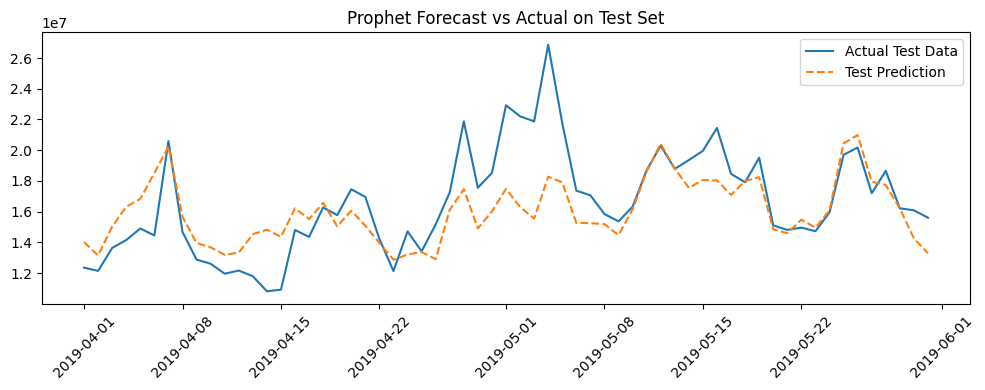

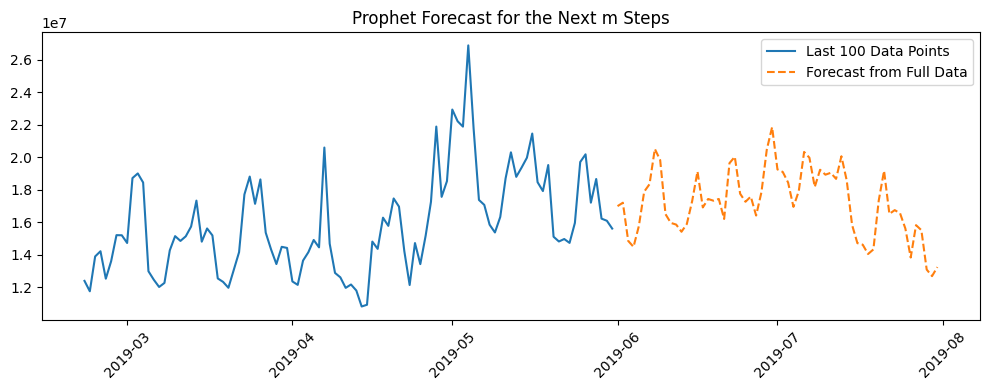

(           ds          yhat
 0  2019-06-01 16,981,724.68
 1  2019-06-02 17,191,335.91
 2  2019-06-03 14,843,945.56
 3  2019-06-04 14,476,384.87
 4  2019-06-05 15,755,166.28
 ..        ...           ...
 56 2019-07-27 15,811,447.64
 57 2019-07-28 15,503,908.15
 58 2019-07-29 13,080,136.59
 59 2019-07-30 12,676,706.13
 60 2019-07-31 13,232,470.60
 
 [61 rows x 2 columns],
 0.1021)

In [194]:
prophet_forecast(ts_co['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_all[['Holiday', 'Discounted Stores']])


Prophet MAPE on test split: 0.1116


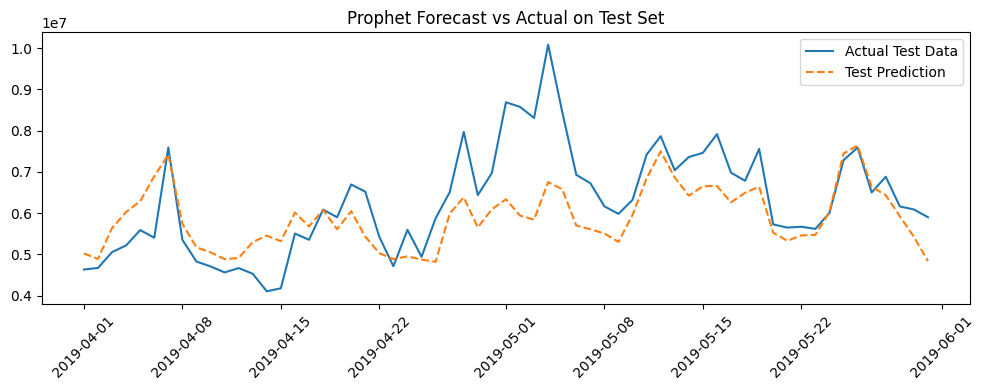

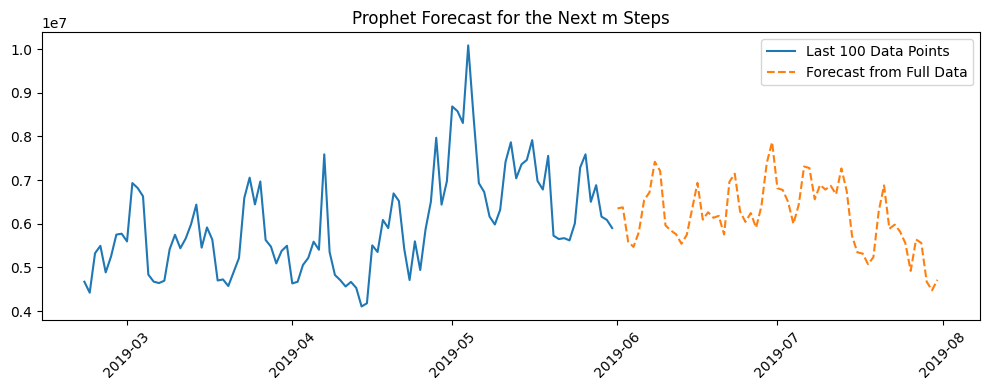

ds         yhat
0  2019-06-01 6,349,423.43
1  2019-06-02 6,375,920.25
2  2019-06-03 5,590,229.47
3  2019-06-04 5,468,938.41
4  2019-06-05 5,806,034.67
..        ...          ...
56 2019-07-27 5,638,692.55
57 2019-07-28 5,557,502.98
58 2019-07-29 4,671,268.79
59 2019-07-30 4,473,948.65
60 2019-07-31 4,715,147.02

[61 rows x 2 columns]

In [ ]:
prophet_forecast(ts_r1['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r1[['Holiday', 'Discounted Stores']])


Prophet MAPE on test split: 0.0883


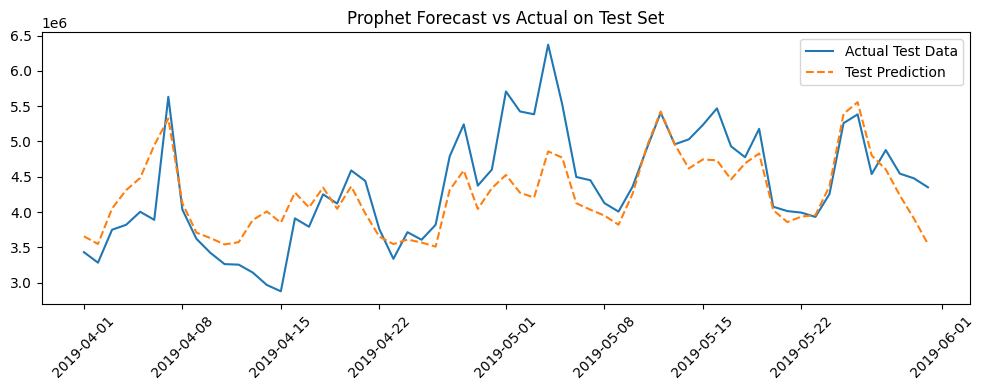

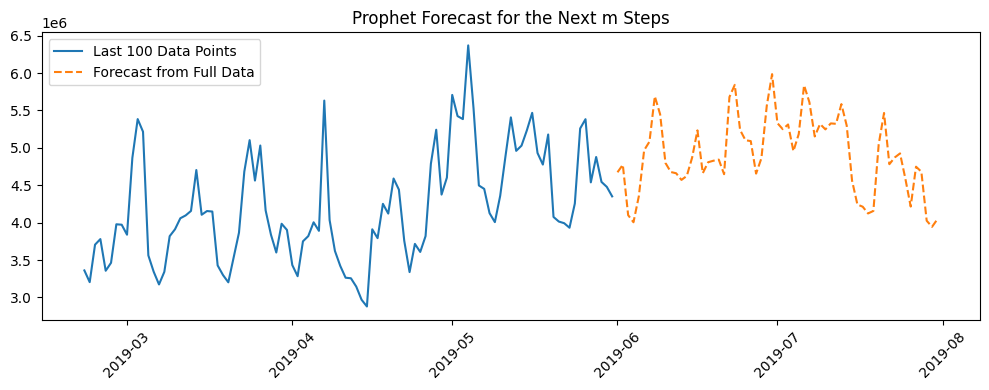

ds         yhat
0  2019-06-01 4,673,447.42
1  2019-06-02 4,774,247.66
2  2019-06-03 4,100,796.74
3  2019-06-04 4,005,299.01
4  2019-06-05 4,351,812.11
..        ...          ...
56 2019-07-27 4,748,185.29
57 2019-07-28 4,681,221.57
58 2019-07-29 4,026,124.28
59 2019-07-30 3,943,818.29
60 2019-07-31 4,045,295.96

[61 rows x 2 columns]

In [ ]:
prophet_forecast(ts_r2['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r2[['Holiday', 'Discounted Stores']])


Prophet MAPE on test split: 0.1187


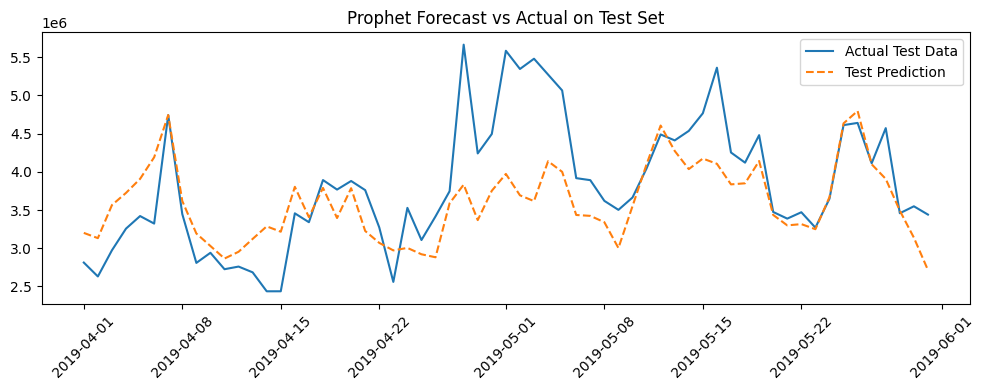

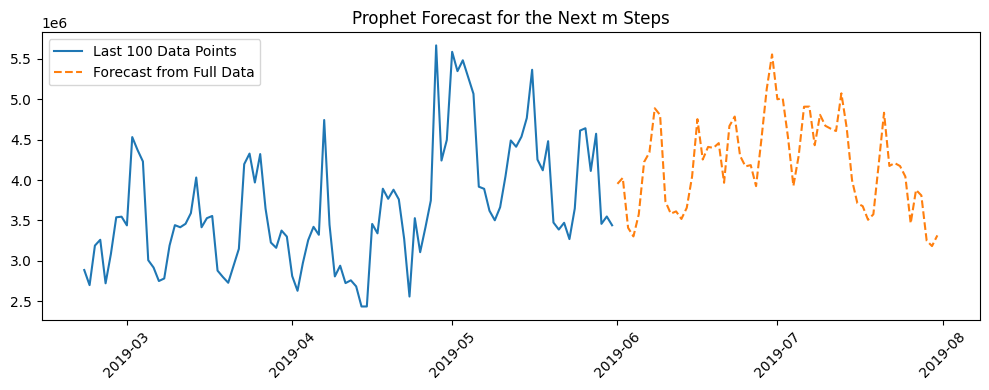

ds         yhat
0  2019-06-01 3,953,018.48
1  2019-06-02 4,026,825.97
2  2019-06-03 3,409,368.92
3  2019-06-04 3,302,848.15
4  2019-06-05 3,575,265.48
..        ...          ...
56 2019-07-27 3,877,643.94
57 2019-07-28 3,809,775.57
58 2019-07-29 3,249,369.16
59 2019-07-30 3,183,406.79
60 2019-07-31 3,315,300.61

[61 rows x 2 columns]

In [ ]:
prophet_forecast(ts_r3['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r3[['Holiday', 'Discounted Stores']])


Prophet MAPE on test split: 0.1286


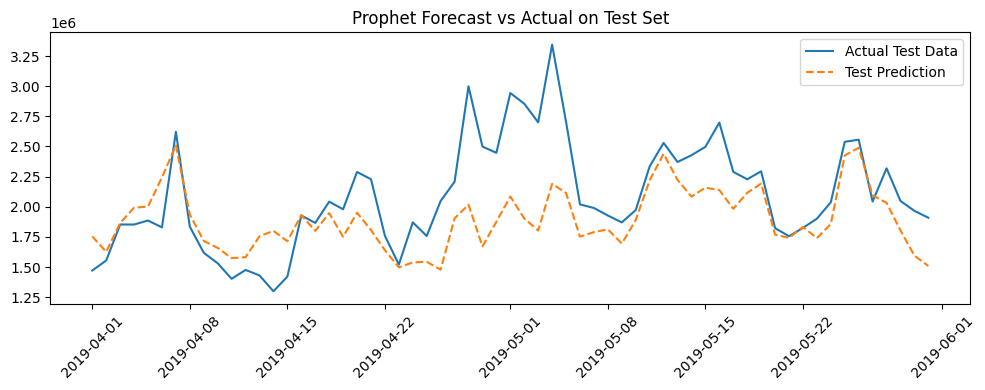

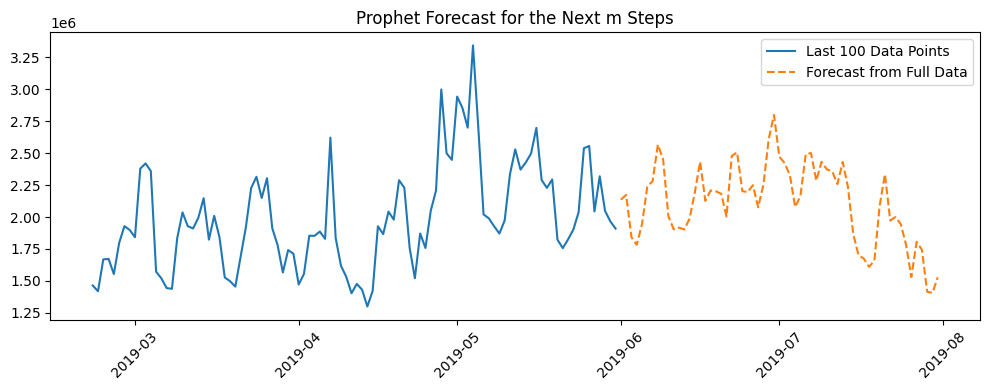

(           ds         yhat
 0  2019-06-01 2,136,055.60
 1  2019-06-02 2,172,782.53
 2  2019-06-03 1,843,050.95
 3  2019-06-04 1,782,668.26
 4  2019-06-05 1,943,618.35
 ..        ...          ...
 56 2019-07-27 1,806,120.46
 57 2019-07-28 1,743,896.41
 58 2019-07-29 1,414,716.59
 59 2019-07-30 1,406,357.05
 60 2019-07-31 1,527,803.59
 
 [61 rows x 2 columns],
 0.1286)

In [183]:
prophet_forecast(ts_r4['Sales'], 61, 61,ts_co[['Holiday', 'Discounted Stores']], exog_r4[['Holiday', 'Discounted Stores']])

In [154]:
ts_data.keys()

dict_keys(['Company', 'Region 1', 'Region 2', 'Region 3', 'Region 4'])

In [155]:
exog_data = {'Company': exog_all, 'Region 1': exog_r1, 'Region 2': exog_r2, 'Region 3': exog_r3, 'Region 4': exog_r4}

In [156]:
data_list = ['Company', 'Region 1', 'Region 2', 'Region 3', 'Region 4']


Prophet MAPE on test split: 0.1021


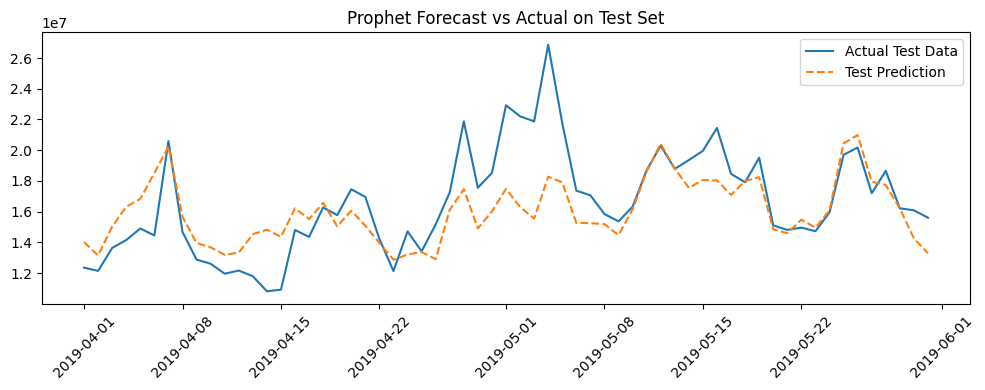

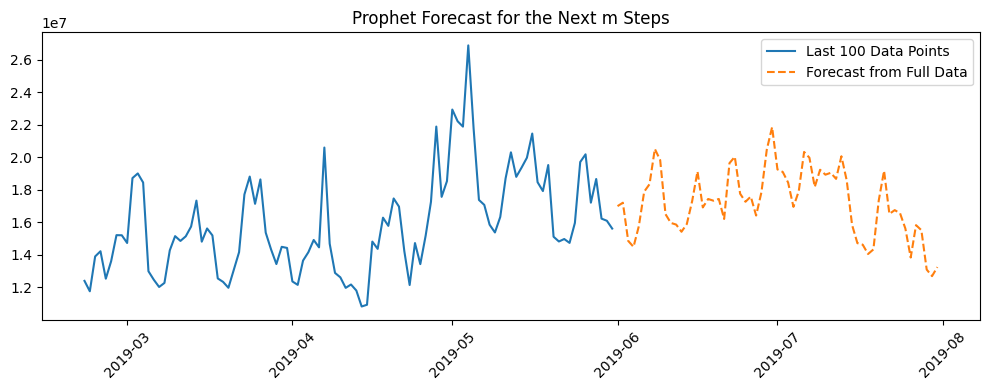


Prophet MAPE on test split: 0.1627


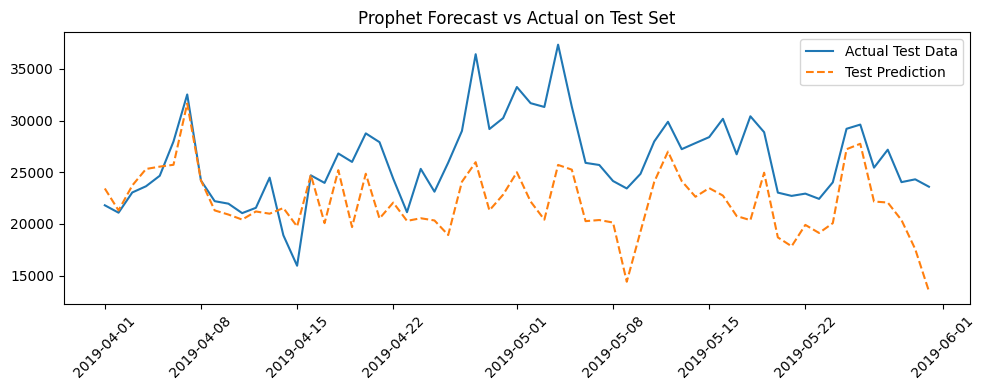

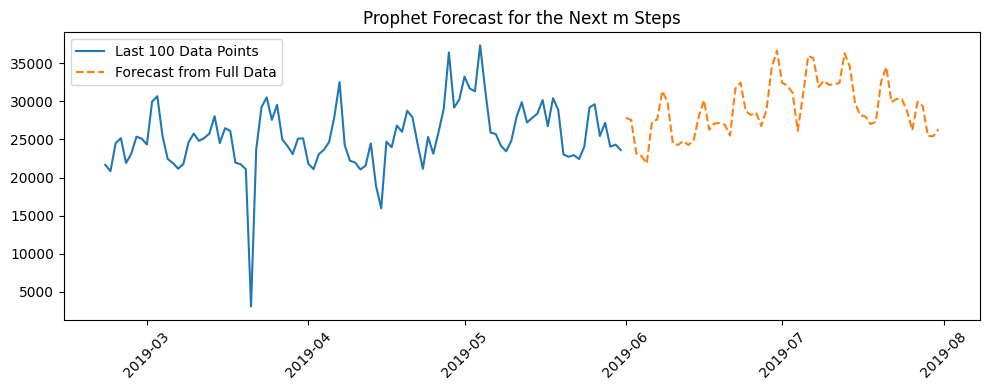


Prophet MAPE on test split: 0.1083


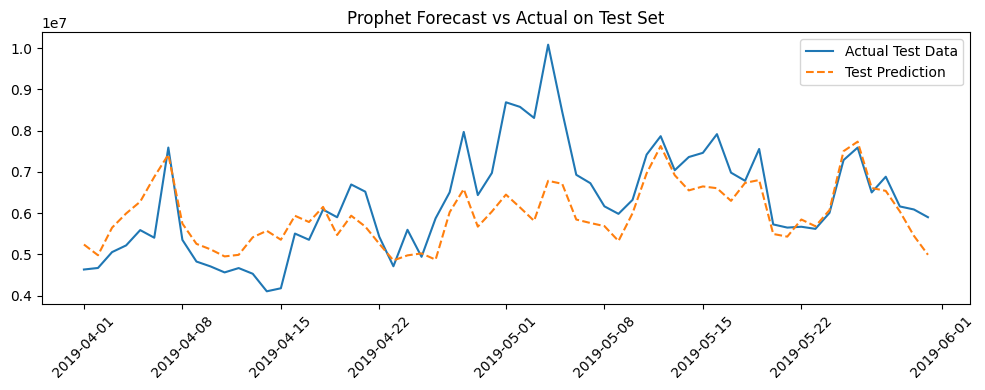

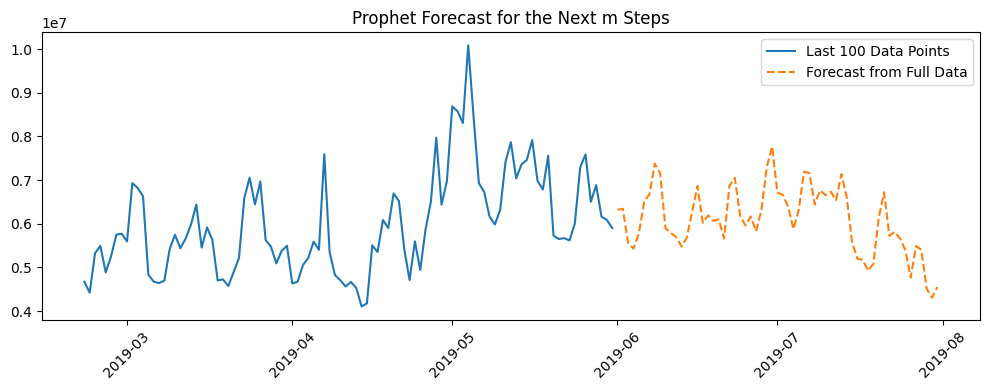


Prophet MAPE on test split: 0.1750


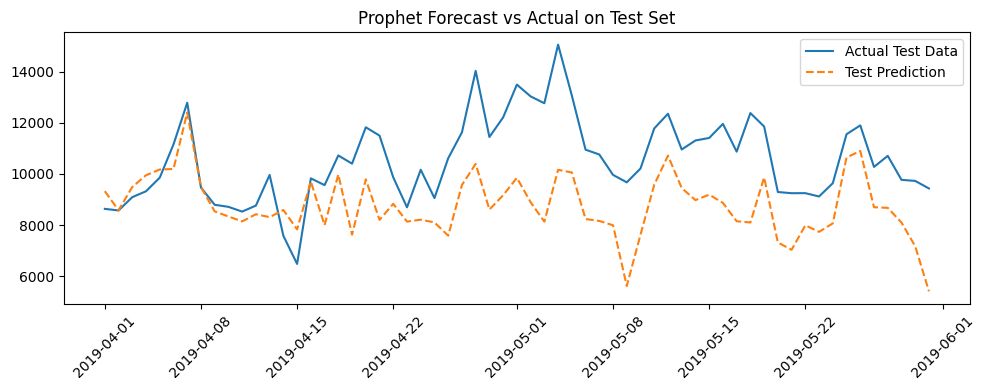

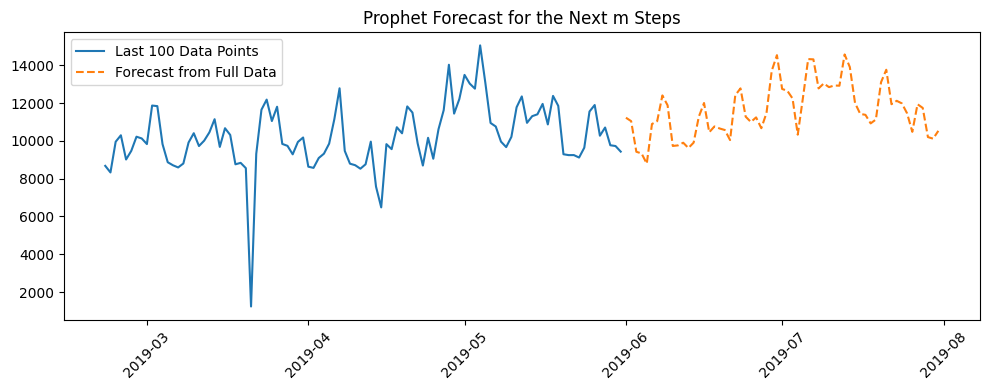


Prophet MAPE on test split: 0.0872


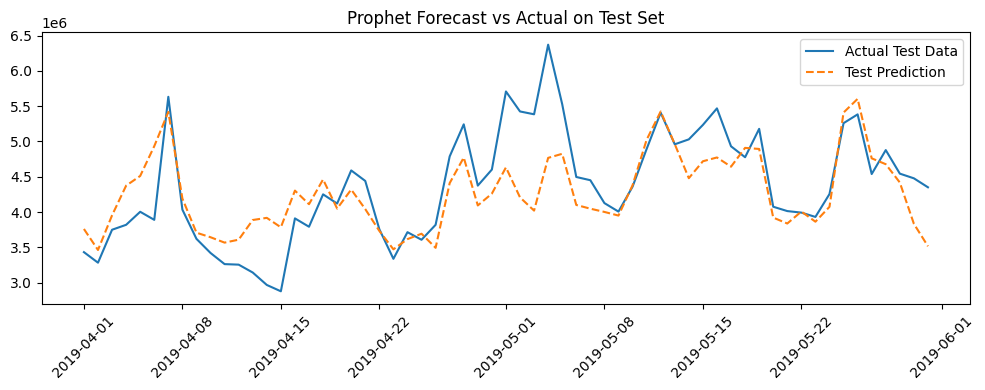

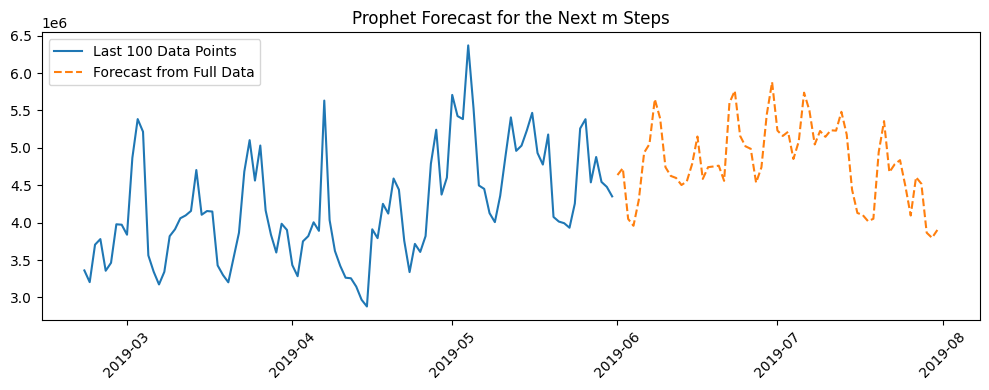


Prophet MAPE on test split: 0.1361


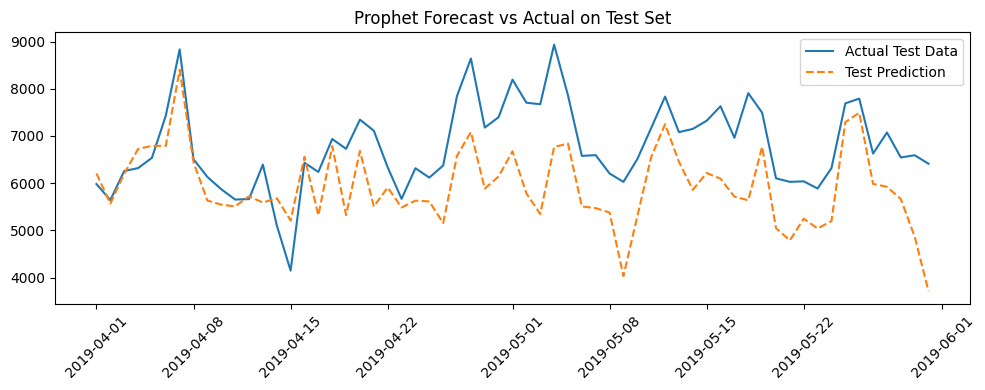

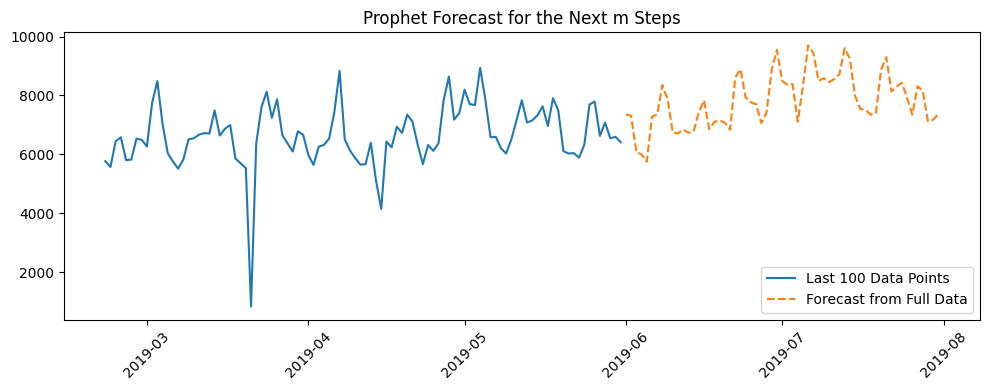


Prophet MAPE on test split: 0.1185


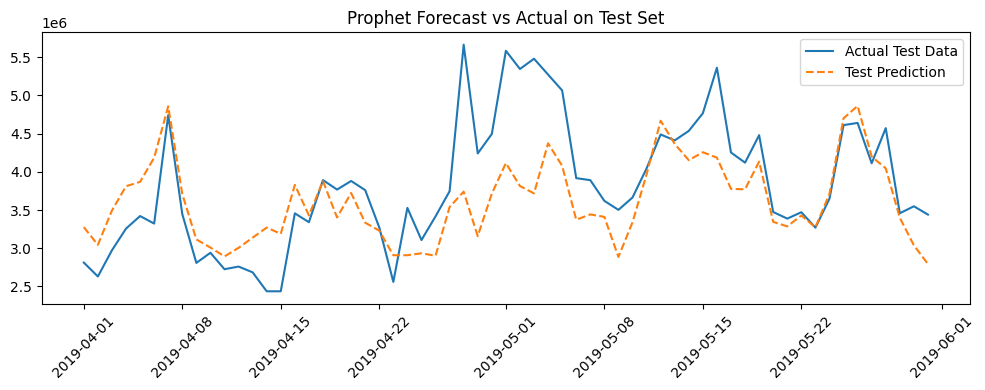

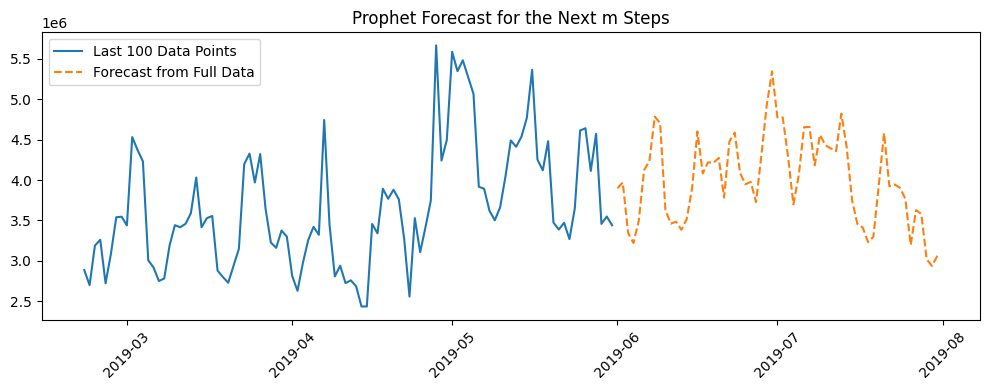


Prophet MAPE on test split: 0.1578


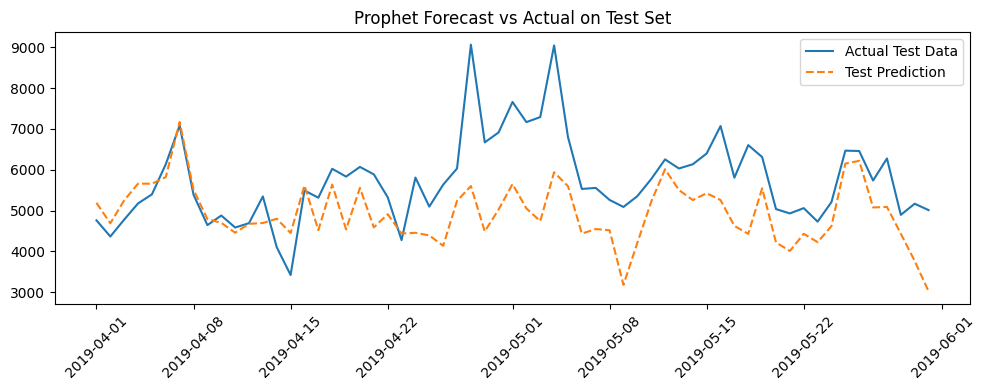

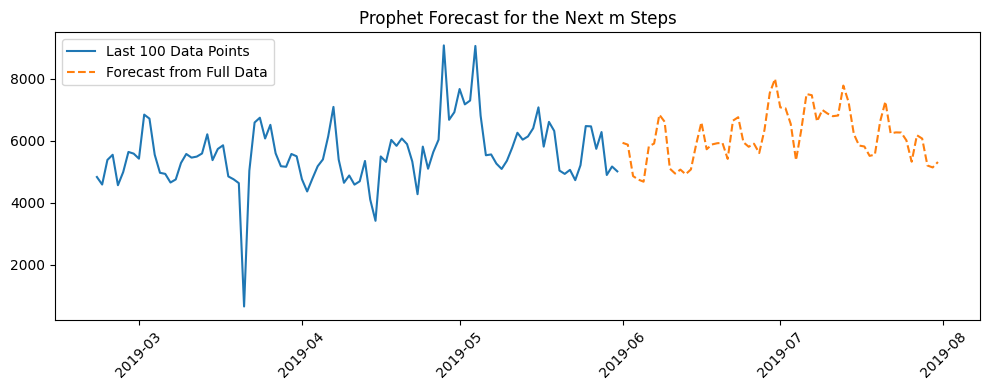


Prophet MAPE on test split: 0.1302


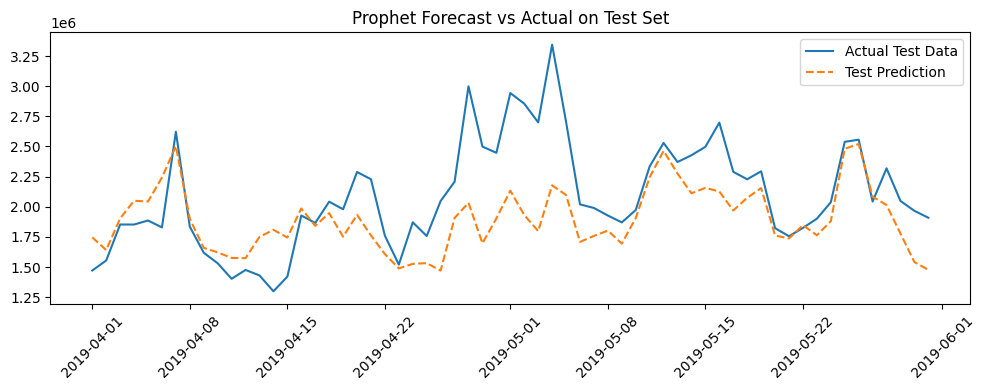

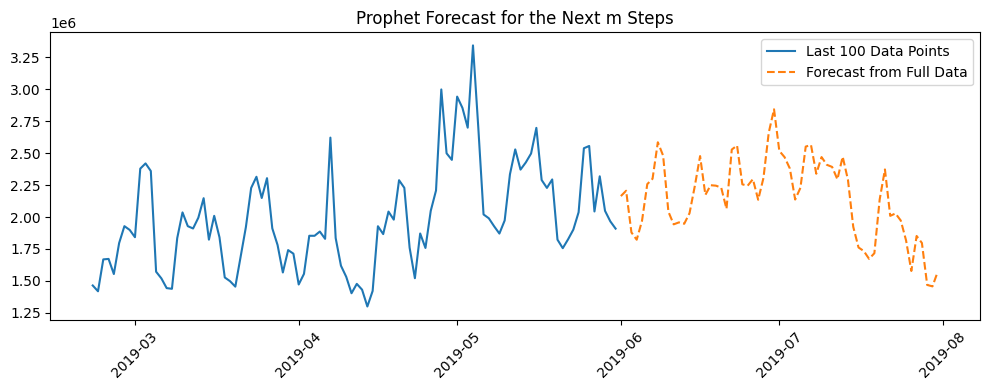


Prophet MAPE on test split: 0.1876


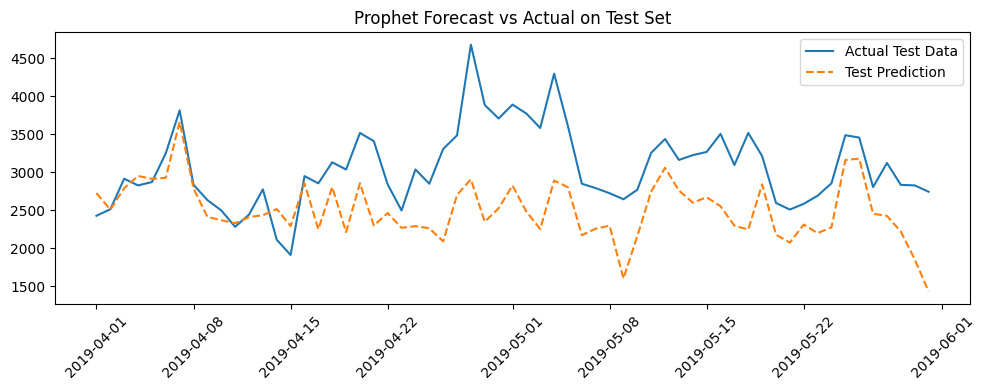

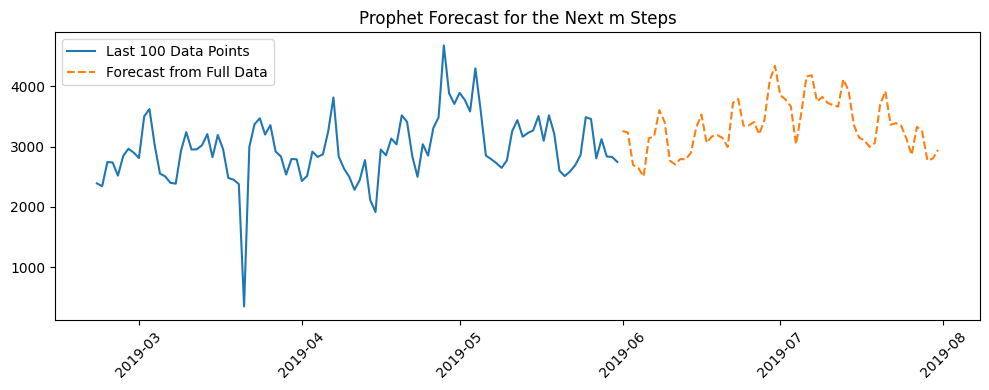

In [195]:
# Storing Prophet Predictions and MAPEs

prophet_forecasts_sales = pd.DataFrame({'Date': exog_all.index})
prophet_forecasts_orders = pd.DataFrame({'Date': exog_all.index})

prophet_mapes = {}

for data_name in data_list:
    prophet_mapes[data_name] = {}

    # Forecast Sales
    forecast_sales, mape_sales = prophet_forecast(
        ts_data[data_name]['Sales'], 61, 61,
        ts_data[data_name][['Holiday', 'Discounted Stores']],
        exog_data[data_name][['Holiday', 'Discounted Stores']]
    )
    prophet_forecasts_sales[f'{data_name}_Sales'] = forecast_sales['yhat'].values
    prophet_mapes[data_name]['sales_mape'] = mape_sales

    # Forecast Orders
    forecast_orders, mape_orders = prophet_forecast(
        ts_data[data_name]['Orders'], 61, 61,
        ts_data[data_name][['Holiday', 'Discounted Stores']],
        exog_data[data_name][['Holiday', 'Discounted Stores']]
    )
    prophet_forecasts_orders[f'{data_name}_Orders'] = forecast_orders['yhat'].values
    prophet_mapes[data_name]['orders_mape'] = mape_orders



In [196]:
prophet_forecasts_sales

Date  Company_Sales  Region 1_Sales  Region 2_Sales  Region 3_Sales  \
0  2019-06-01  16,981,724.68    6,321,539.84    4,636,834.42    3,897,578.82   
1  2019-06-02  17,191,335.91    6,341,855.46    4,728,658.59    3,970,597.39   
2  2019-06-03  14,843,945.56    5,554,119.59    4,050,128.15    3,344,610.33   
3  2019-06-04  14,476,384.87    5,430,055.44    3,958,253.44    3,221,139.93   
4  2019-06-05  15,755,166.28    5,769,022.78    4,304,182.55    3,496,382.30   
..        ...            ...             ...             ...             ...   
56 2019-07-27  15,811,447.64    5,488,518.57    4,607,964.92    3,627,678.12   
57 2019-07-28  15,503,908.15    5,400,368.85    4,520,585.18    3,578,833.95   
58 2019-07-29  13,080,136.59    4,508,894.51    3,865,237.17    3,018,099.61   
59 2019-07-30  12,676,706.13    4,305,847.01    3,796,996.63    2,937,267.88   
60 2019-07-31  13,232,470.60    4,547,277.06    3,901,877.14    3,064,486.08   

    Region 4_Sales  
0     2,164,068.68  
1     2,205,943.39  
2     1,879,649.12  
3     1,822,442.55  
4     1,969,538.76  
..             ...  
56    1,851,740.49  
57    1,796,999.50  
58    1,468,313.23  
59    1,457,105.73  
60    1,571,890.38  

[61 rows x 6 columns]

In [197]:
prophet_forecasts_orders

Date  Company_Orders  Region 1_Orders  Region 2_Orders  \
0  2019-06-01       27,837.47        11,228.47         7,352.76   
1  2019-06-02       27,544.89        11,046.73         7,308.91   
2  2019-06-03       23,127.58         9,426.03         6,078.69   
3  2019-06-04       22,809.24         9,336.90         5,998.27   
4  2019-06-05       21,851.04         8,797.24         5,749.87   
..        ...             ...              ...              ...   
56 2019-07-27       29,927.49        11,941.38         8,309.17   
57 2019-07-28       29,383.98        11,747.25         8,161.09   
58 2019-07-29       25,459.94        10,203.76         7,128.94   
59 2019-07-30       25,407.52        10,118.51         7,171.75   
60 2019-07-31       26,325.16        10,532.77         7,371.42   

    Region 3_Orders  Region 4_Orders  
0          5,930.63         3,259.27  
1          5,871.06         3,234.33  
2          4,859.07         2,694.84  
3          4,747.53         2,644.80  
4          4,679.01         2,505.41  
..              ...              ...  
56         6,174.24         3,328.14  
57         6,066.60         3,249.17  
58         5,200.35         2,771.24  
59         5,138.03         2,800.53  
60         5,312.92         2,944.99  

[61 rows x 6 columns]

In [177]:
prophet_mapes

{'Company': {'sales_mape': 0.1021, 'orders_mape': 0.1627},
 'Region 1': {'sales_mape': 0.1083, 'orders_mape': 0.175},
 'Region 2': {'sales_mape': 0.0872, 'orders_mape': 0.1361},
 'Region 3': {'sales_mape': 0.1185, 'orders_mape': 0.1578},
 'Region 4': {'sales_mape': 0.1302, 'orders_mape': 0.1876}}

In [199]:
prophet_forecasts_sales.to_csv('prophet_forecasts_sales.csv', index=False)
prophet_forecasts_orders.to_csv('prophet_forecasts_orders.csv', index=False)

###**Prophet Prediction Report**

 * Facebook Prophet was used to predict 61 datapoints from the test set to record the MAPE after which the model forecasted 61 future datapoints to match the duration of the inference period defined in the test dataset given i.e. from 2019-06-01 to 2019-07-31.

 * The model used the exogenous variables 'Holiday' and 'Discounted Stores' and with parameter set as: yearly_seasonality=True, weekly_seasonality=True, changepoint_prior_scale=1.25, seasonality_mode='additive'

 * The Prophet model achieved good test MAPE for the various datasets in the range of 8.83% (For Regions R2) to 12.78% (For Region R1).

 * Company:
  * Best Test MAPE: 10.12%

*  Region 1 (R1):
  * Best Test MAPE: 11.16%

*  Region 2 (R2):
  * Best Test MAPE: 8.83%

*  Region 3 (R3):
  * Best Test MAPE: 11.87%

*  Region 4 (R4):
  * Best Test MAPE: 12.78%

*  The model achieved its best accuracy (MAPE ≈ 10.12%) on test data specifically at 61 steps. Forecasting with fewer or more steps results in noticeably drop in performance. For a more reliable forecast we will provide a precomputed 61-day Prophet forecast instead of generating dynamic predictions based on the user-selected horizon.